**SUNSHINE HOTELS**

COLUMN |COLUMN TYPE	|DESCRIPTION
--- | ---- | -----
hotel_name |	Text	| This column features the hotel names
City |	Text |	This column shows the city that the hotel is based in
hotel_type |	Text |	Has 2 distinct values – Business and Leisure. Business hotels are tagged as “Business” and leisure hotels are tagged as “Leisure
hotel_category	| Text	| This is an encoded column with Economy= 1, Midscale= 2, Upscale= 3 and Upper Upscale= 4
Zone	| Numeric |	This is an encoded column with North = 1, East= 2, South= 3 and West= 4
room_nights	| Numeric	| This column shows the number of room nights
room_revenue	| Numeric	| This column shows the revenue booked from the room nights
business_source	| Text	| This column refers to the source of business divided among:
|| ●	Corporate: These are bulk customers. Normally companies are identified as corporate customer who negotiate in bulk for their employees travelling across the country. These are referred to as CVGR as clarified before.
|| ●	Travel agent: These entities book for their customers with the hotels and work on commission basis. They may be processing group as well as small requirements. They help hotels to reach out to customers who are difficult to reach out to.
|| ●	Travel Management company: These are new age organizations that have seen a tremendous evolution specially post the pandemic period. They assist large corporate houses to manage their travel booking requirements. They take care of these requirement on behalf of the corporates and in lieu charge a small service fee to them. They often work without any commissions.
|| ●	Social: These are direct customers who chose to process offline reservations directly with the hotel company.
account_name	| Text	|	This column refers to the name of the account (Company/ Travel Agent/ Travel Management Company) for which the booking has been processed.
|| ●	It is worth noting here that account_name to Travel Management Companies (TMC) are updated as TMC Name/ corporate which signifies which TMC is booking for which corporate. For example, “FcM/ Landmark Group” denotes that FcM Travel solutions has processed that particular transaction on behalf of Landmark Group. In cases where we don’t have the name f corporate disclosed by the TMC, only TMC name features in account_name.
sales_portfolio |	Text	|	Entire team at this Sales Office comprises 4 proactive sales team members each handling a portfolio. Portfolios are denoted as Sales Portfolio 1, 2, 3 and 4. 
||●	Each portfolio is handled by an individual salesperson. Furthermore, we have 3 members in support staff who act as reactive sales team members. They don’t maintain relationships on an active level but assist the proactive sales team with day-to-day tasks such as maintaining booking communication, handling incoming calls and mails etc. In some of the cases, when a booking is received from a source that is not being handled by the proactive sales team, it is assigned to the support staff and hence its portfolio is developed organically.
Month	| Text	| This column denotes the month in which the booking is materialized. 
year	| Numeric	| This column denotes the month in which the booking is materialized.


# Upgrade Matplolib for Google Colab

In [ ]:
# run this code and restart the kernel everytime you open this notebook in google colab otherwise no need to run this code
!pip install matplotlib --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# DATA PRE-PROCESSING

**# Import required libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [ ]:
#load the dataframe
df = pd.read_csv('/content/sunshine_hotels_data.csv')

**# TOP 5 ROWS**

In [ ]:
df.head()

hotel_name       city hotel_type hotel_category   zone  \
0  South Star Comfort Inn  Bengaluru   Business       Midscale  South   
1       Kalyan Essentials    Chennai   Business        Economy  South   
2  Grand Hotel Bengaluru   Bengaluru   Business  Upper Upscale  South   
3  Grand Hotel Bengaluru   Bengaluru   Business  Upper Upscale  South   
4  Westside Comfort Hotel  Ghaziabad   Business       Midscale  North   

   room_nights room_revenue            business_source  \
0            1        4,000  Travel Management Company   
1            1        3,500  Travel Management Company   
2            1        4,500  Travel Management Company   
3            1        7,000  Travel Management Company   
4            1        7,500  Travel Management Company   

                                 account_name    sales_portfolio    month  \
0                       Ather Energy pvt ltd   Sales Portfolio 2    March   
1                                   Cognizant  Sales Portfolio 1  January   
2                   Flipkart Internet Pvt Ltd  Sales Portfolio 1  January   
3         Marlabs Innovations Private Limited  Sales Portfolio 1  January   
4  Mindlance /ML OUTSOURCING SERVICES PVT LTD  Sales Portfolio 1  October   

   year  
0  2022  
1  2020  
2  2019  
3  2019  
4  2018

**# OVERVIEWING THE DATA**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39861 entries, 0 to 39860
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   hotel_name       39861 non-null  object
 1   city             39861 non-null  object
 2   hotel_type       39861 non-null  object
 3   hotel_category   39861 non-null  object
 4   zone             39861 non-null  object
 5   room_nights      39861 non-null  int64 
 6   room_revenue     39861 non-null  object
 7   business_source  39861 non-null  object
 8   account_name     39861 non-null  object
 9   sales_portfolio  39861 non-null  object
 10  month            39861 non-null  object
 11  year             39861 non-null  int64 
dtypes: int64(2), object(10)
memory usage: 3.6+ MB


***There are zero null values present in the dataset.***

**"room_revenue column is in object datatype -- change to int"**

In [ ]:
def num(text):
  nums = re.findall('\d+',text)
  return "".join(nums)

In [ ]:
df['room_revenue'] = df['room_revenue'].apply(lambda x: num(x))

In [ ]:
df[~df['room_revenue'].str.isnumeric()]

hotel_name        city hotel_type hotel_category   zone  \
5122   Raille's Inn Essentials     Chennai   Business        Economy  South   
5294          Frontier Comfort  Gandhidham   Business       Midscale   West   
5653           Annessi Comfort   New Delhi   Business       Midscale  North   
8644          Frontier Comfort  Gandhidham   Business       Midscale   West   
10819         Premium Shahdara   New Delhi   Business        Upscale  North   
11149          Comfort Gurgaon     Gurgaon   Business        Economy  North   
11802         Sander's Comfort   Hyderabad   Business       Midscale  South   
11827         Grand Hitec City   Hyderabad   Business  Upper Upscale  South   
12249   South Star Comfort Inn   Bengaluru   Business       Midscale  South   
14010         Grand Hitec City   Hyderabad   Business  Upper Upscale  South   
24535            Royal Comfort    Dehradun    Leisure       Midscale  North   
37124        Kalyan Essentials     Chennai   Business        Economy  South   

       room_nights room_revenue            business_source  \
5122             1               Travel Management Company   
5294             1               Travel Management Company   
5653             1               Travel Management Company   
8644             1               Travel Management Company   
10819            1               Travel Management Company   
11149            1               Travel Management Company   
11802            1               Travel Management Company   
11827            1               Travel Management Company   
12249            1               Travel Management Company   
14010            2                              Corporate    
24535            2                              Corporate    
37124            2                              Corporate    

                                 account_name    sales_portfolio     month  \
5122   Future Electronics Inc (Dist.) PTE LTD  Sales Portfolio 4     April   
5294           Go Digit General Insurance Ltd  Sales Portfolio 2     April   
5653                Himalaya Wellness Company  Sales Portfolio 3     March   
8644             Humming Bird Digital Pvt Ltd  Sales Portfolio 3  December   
10819   METRO Cash & Carry India Private Ltd.  Sales Portfolio 3     April   
11149                         MPHASIS LIMITED  Sales Portfolio 1   January   
11802                            QUEST GLOBAL  Sales Portfolio 1    August   
11827                            QUEST GLOBAL  Sales Portfolio 1      July   
12249    T A Pai Management Institute Manipal  Sales Portfolio 2    August   
14010            Analog Devices India Pvt Ltd  Sales Portfolio 1    August   
24535          Go Digit General Insurance Ltd  Sales Portfolio 2  February   
37124                     Trianz Technologies  Sales Portfolio 2     April   

       year  
5122   2020  
5294   2018  
5653   2018  
8644   2018  
10819  2018  
11149  2019  
11802  2019  
11827  2019  
12249  2021  
14010  2019  
24535  2019  
37124  2019

There are 12 rows where room_revenue does not have any values, so we will be dropping those rows.

In [ ]:
# dropping these rows where we don't have any data on room_revenue
df.drop(df[~df['room_revenue'].str.isnumeric()].index,inplace=True)

In [ ]:
df['room_revenue'] = df['room_revenue'].astype(int)

In [ ]:
# we can use this also to extract all digits and then change datatype and then drop nan values
# df['c'] = df['room_revenue'].str.extractall('(\d+)').unstack().fillna('').sum(axis=1).astype('int')
# df.dropna()

In [ ]:
df.describe()

room_nights  room_revenue          year
count  39849.000000  3.984900e+04  39849.000000
mean       5.365128  2.063235e+04   2019.744511
std       21.712913  8.276424e+04      1.492888
min        1.000000  5.900000e+02   2018.000000
25%        1.000000  4.000000e+03   2018.000000
50%        2.000000  7.600000e+03   2019.000000
75%        4.000000  1.600000e+04   2021.000000
max      961.000000  4.800000e+06   2022.000000

** There is only 25% data consisting room nights greater than 4.*

**# LET'S CHECK INTEGRITY OF COLUMNS**

In [ ]:
#check for number of unique values in each column
for column in df.columns:
  print(column,':', df[column].nunique())

hotel_name : 81
city : 53
hotel_type : 2
hotel_category : 4
zone : 4
room_nights : 233
room_revenue : 3092
business_source : 7
account_name : 1034
sales_portfolio : 7
month : 12
year : 5


*--> It shows there are 7 unique values present in business_source column but according out data there should be only 4.*

In [ ]:
df['business_source'].unique()

array(['Travel Management Company', 'Corporate', 'Travel Agent',
       ' Corporate ', ' Travel Agent ', ' Travel Management Company ',
       ' Social '], dtype=object)

In [ ]:
#remove leading and trailing spaces
df['business_source'] = df['business_source'].str.strip()
df['business_source'].unique()

array(['Travel Management Company', 'Corporate', 'Travel Agent', 'Social'],
      dtype=object)

*--> let's see if any other column has this kind of discrepancies.*

In [ ]:
df['hotel_name'].unique()

array(['South Star Comfort Inn', 'Kalyan Essentials',
       'Grand Hotel Bengaluru ', 'Westside Comfort Hotel',
       'Deccan Comfort', 'Pure Comfort Hotel', 'Frontier Comfort',
       'Bristol Premium', 'Leisure Comfort', "Tanny's Comfort Hotel",
       'Airport Comfort', 'The Southern Comfort', 'Comfort Gurgaon',
       'Riverside Comfort Hotel', 'Royal Comfort', 'Saira Fort  Comfort',
       "Raille's Inn Essentials", 'Grand of The East',
       'Classic Cradle Comfort', 'Hotel Business Comfort',
       'Premium Suites', 'LeMoi Premium', 'Jim Comfort',
       "Sander's Essentials", "Sander's Comfort", 'Chariot Comfort',
       'Grand Essentials', 'Essentials Chandigarh', 'Maine Premium',
       'Nirwana Essentials', 'Natural Essentials',
       'Rajputana Comfort Jaipur', 'Premium Zirakpur',
       'Grand Goregaon Mumbai', 'Grand Hitec City', 'Hill High Comfort',
       ' Premium Jaipur', 'The Royal Plaza', 'Louise Comfort Hotel',
       'Krishna Comfort Hotel', 'City Heart Comfor

**I can see there are few hotel names with leading and trailing spaces, but 'Comfort Gurgaon' has dupliacted entry because of this. Lets correct this mistake.**

In [ ]:
df['hotel_name'] = df['hotel_name'].str.strip()

print(df['hotel_name'].nunique())
print(df['hotel_name'].unique())

80
['South Star Comfort Inn' 'Kalyan Essentials' 'Grand Hotel Bengaluru'
 'Westside Comfort Hotel' 'Deccan Comfort' 'Pure Comfort Hotel'
 'Frontier Comfort' 'Bristol Premium' 'Leisure Comfort'
 "Tanny's Comfort Hotel" 'Airport Comfort' 'The Southern Comfort'
 'Comfort Gurgaon' 'Riverside Comfort Hotel' 'Royal Comfort'
 'Saira Fort  Comfort' "Raille's Inn Essentials" 'Grand of The East'
 'Classic Cradle Comfort' 'Hotel Business Comfort' 'Premium Suites'
 'LeMoi Premium' 'Jim Comfort' "Sander's Essentials" "Sander's Comfort"
 'Chariot Comfort' 'Grand Essentials' 'Essentials Chandigarh'
 'Maine Premium' 'Nirwana Essentials' 'Natural Essentials'
 'Rajputana Comfort Jaipur' 'Premium Zirakpur' 'Grand Goregaon Mumbai'
 'Grand Hitec City' 'Hill High Comfort' 'Premium Jaipur' 'The Royal Plaza'
 'Louise Comfort Hotel' 'Krishna Comfort Hotel' 'City Heart Comfort'
 'Premium Ludhiana' 'Comfort Jalandhar' 'Hotel Om Premium'
 'Annessi Comfort' 'Diamond Premium' 'Comfort Residence and Towers'
 'Capita

In [ ]:
df['city'].unique()

array(['Bengaluru', 'Chennai', 'Ghaziabad', 'Dibrugarh', 'Gandhidham',
       'Solapur', 'Lucknow', 'Kakinada', 'New Delhi', 'Kochi', 'Gurgaon',
       'Ahmedabad', 'Dehradun', 'Jaisalmer', 'Pondicherry', 'Trivandrum',
       'Ranchi', 'Hyderabad', 'Amritsar', 'Mumbai', 'Chandigarh',
       'Tirupati', 'Jaipur', 'Pune', 'Zirakpur', 'Srinagar', 'Gangtok',
       'Mathura', 'Ludhiana', 'Jalandhar', 'Rajahmundry', 'Agra',
       'Jodhpur', 'Kolkata', 'Gorakhpur', 'Somnath', 'Jhansi', 'Nashik',
       'Raipur', 'Faridabad', 'Junagadh', 'Roorkee', 'Panipat', 'Goa',
       'Noida', 'Poovar', 'Thekkady', 'Shimla', 'Palampur', 'Durgapur',
       'Jammu', 'Mussoorie', 'Bhimtal'], dtype=object)

In [ ]:
categorical_columns = ['hotel_type','hotel_category','zone','business_source','sales_portfolio','month','year']

In [ ]:
for column in categorical_columns:
  print(column,':', df[column].unique())

hotel_type : ['Business' 'Leisure']
hotel_category : ['Midscale' 'Economy' 'Upper Upscale' 'Upscale']
zone : ['South' 'North' 'East' 'West']
business_source : ['Travel Management Company' 'Corporate' 'Travel Agent' 'Social']
sales_portfolio : ['Sales Portfolio 2' 'Sales Portfolio 1' 'Sales Portfolio 3'
 'Sales Portfolio 4' 'Support Portfolio 1' 'Support Portfolio 2'
 'Support Portfolio 3']
month : ['March' 'January' 'October' 'February' 'July' 'May' 'April' 'December'
 'June' 'September' 'August' 'November']
year : [2022 2020 2019 2018 2021]


**** Create two new columns room_nights per day (RPD) and room_revenue per day (REVPD) as target columns for evaluation.****

In [ ]:
df['RPD'] = np.where(df['year']==2022,round(df['room_nights']/212,3),round(df['room_nights']/365,3))
df['REVPD'] = np.where(df['year']==2022,round(df['room_revenue']/212,3),round(df['room_revenue']/365,3))

In [ ]:
df.head()

hotel_name       city hotel_type hotel_category   zone  \
0  South Star Comfort Inn  Bengaluru   Business       Midscale  South   
1       Kalyan Essentials    Chennai   Business        Economy  South   
2   Grand Hotel Bengaluru  Bengaluru   Business  Upper Upscale  South   
3   Grand Hotel Bengaluru  Bengaluru   Business  Upper Upscale  South   
4  Westside Comfort Hotel  Ghaziabad   Business       Midscale  North   

   room_nights  room_revenue            business_source  \
0            1          4000  Travel Management Company   
1            1          3500  Travel Management Company   
2            1          4500  Travel Management Company   
3            1          7000  Travel Management Company   
4            1          7500  Travel Management Company   

                                 account_name    sales_portfolio    month  \
0                       Ather Energy pvt ltd   Sales Portfolio 2    March   
1                                   Cognizant  Sales Portfolio 1  January   
2                   Flipkart Internet Pvt Ltd  Sales Portfolio 1  January   
3         Marlabs Innovations Private Limited  Sales Portfolio 1  January   
4  Mindlance /ML OUTSOURCING SERVICES PVT LTD  Sales Portfolio 1  October   

   year    RPD   REVPD  
0  2022  0.005  18.868  
1  2020  0.003   9.589  
2  2019  0.003  12.329  
3  2019  0.003  19.178  
4  2018  0.003  20.548

# **UNIVARIATE ANALYSIS**

** Hotel_type distribution based on number of transactions **

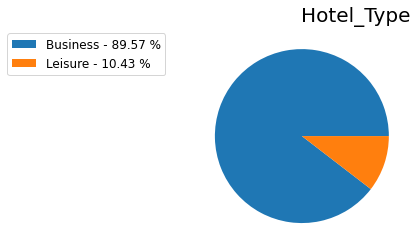

In [ ]:
plt.figure(figsize=(12,4))
df1 = pd.DataFrame(df['hotel_type'].value_counts().reset_index())
percent = 100*df1['hotel_type']/df1['hotel_type'].sum()
labels = ['{0} - {1:0.2f} %'.format(i,j) for i,j in zip(df1['index'], percent)]

plt.pie(data=df1,x='hotel_type',radius=1)

plt.legend(labels, loc='best', bbox_to_anchor=(-0.1, 1.),fontsize=12)
plt.title('Hotel_Type',loc='right',fontsize=20)
plt.show()

Business type holds major portion of bookings.

** Hotel_category distribution based on number of transactions **

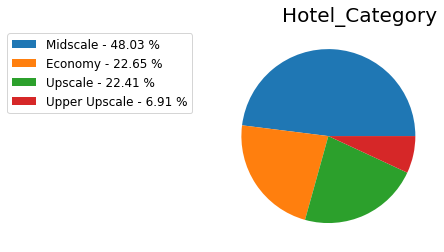

In [ ]:
plt.figure(figsize=(12,4))
df1 = pd.DataFrame(df['hotel_category'].value_counts().reset_index())
percent = 100*df1['hotel_category']/df1['hotel_category'].sum()
labels = ['{0} - {1:0.2f} %'.format(i,j) for i,j in zip(df1['index'], percent)]

plt.pie(data=df1,x='hotel_category',radius=1)

plt.legend(labels, loc='best', bbox_to_anchor=(-0.1, 1.),fontsize=12)
plt.title('Hotel_Category',loc='right',fontsize=20)
plt.show()

Major chunk of transactions were done under Midscale hotel category.

** Zone distribution based on number of transactions **

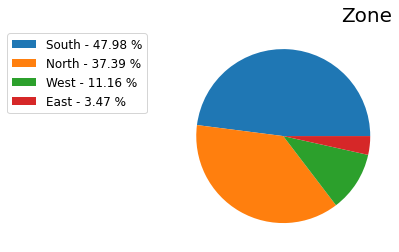

In [ ]:
plt.figure(figsize=(12,4))
df1 = pd.DataFrame(df['zone'].value_counts().reset_index())
percent = 100*df1['zone']/df1['zone'].sum()
labels = ['{0} - {1:0.2f} %'.format(i,j) for i,j in zip(df1['index'], percent)]

plt.pie(data=df1,x='zone',radius=1)

plt.legend(labels, loc='best', bbox_to_anchor=(-0.1, 1.),fontsize=12)
plt.title('Zone',loc='right',fontsize=20)
plt.show()

South and North zones are the two most contributing in this industry.

** Business_source distribution based on number of transactions **

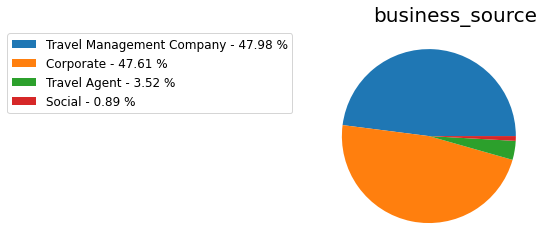

In [ ]:
plt.figure(figsize=(12,4))
df1 = pd.DataFrame(df['business_source'].value_counts().reset_index())
percent = 100*df1['business_source']/df1['business_source'].sum()
labels = ['{0} - {1:0.2f} %'.format(i,j) for i,j in zip(df1['index'], percent)]

plt.pie(data=df1,x='business_source',radius=1)

plt.legend(labels, loc='best', bbox_to_anchor=(-0.1, 1.),fontsize=12)
plt.title('business_source',loc='right',fontsize=20)
plt.show()

Travel Management Company and Corporate are the sources which provides maximum business.

** Sales_portfolio distribution based on number of transactions **

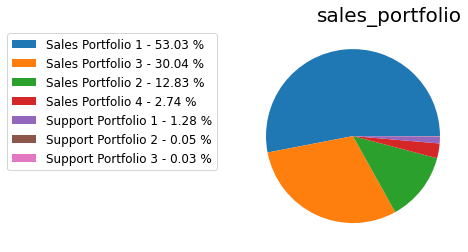

In [ ]:
plt.figure(figsize=(12,4))
df1 = pd.DataFrame(df['sales_portfolio'].value_counts().reset_index())
percent = 100*df1['sales_portfolio']/df1['sales_portfolio'].sum()
labels = ['{0} - {1:0.2f} %'.format(i,j) for i,j in zip(df1['index'], percent)]

plt.pie(data=df1,x='sales_portfolio',radius=1)

plt.legend(labels, loc='best', bbox_to_anchor=(-0.1, 1.),fontsize=12)
plt.title('sales_portfolio',loc='right',fontsize=20)
plt.show()

Sales Portfolio 1 handles maximum sales followed by Sales Portfolio 3.

** Hotel_type variation based on RPD and REVPD **

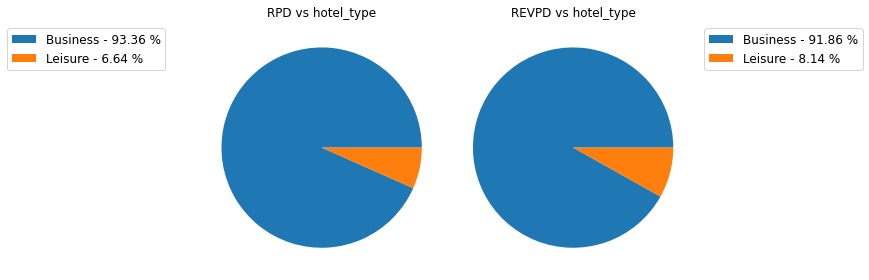

In [ ]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(12,4))
df1 = df.groupby('hotel_type')[['RPD','REVPD']].sum().reset_index()
rpd_perc = 100*df1['RPD']/df1['RPD'].sum()
rpd_label = ['{0} - {1:0.2f} %'.format(i,j) for i,j in zip(df1['hotel_type'], rpd_perc)]

ax1.pie(data=df1,x='RPD',radius=1)

ax1.legend(rpd_label,loc='best',bbox_to_anchor=(-0.1, 1.),fontsize=12)
ax1.title.set_text('RPD vs hotel_type')

revpd_perc = 100*df1['REVPD']/df1['REVPD'].sum()
revpd_label = ['{0} - {1:0.2f} %'.format(i,j) for i,j in zip(df1['hotel_type'], revpd_perc)]

ax2.pie(data=df1,x='REVPD',radius=1)

ax2.legend(revpd_label,loc='best',bbox_to_anchor=(1., 1.),fontsize=12)
ax2.title.set_text('REVPD vs hotel_type')
plt.tight_layout()
plt.show()

Business type hotels contributes to above 90% RPD and REVPD which is obvious because of maximum transactions.

** Hotel_category variation based on RPD and REVPD **

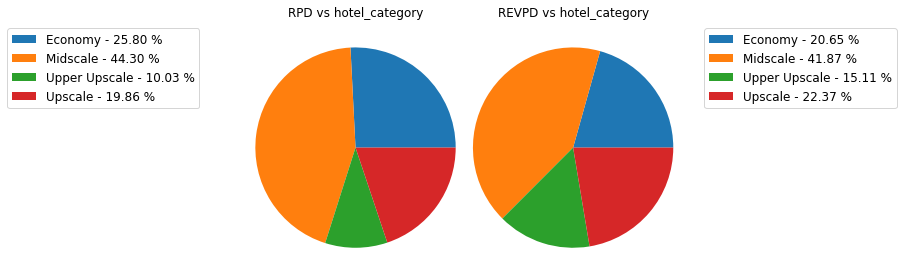

In [ ]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(12,4))
df1 = df.groupby('hotel_category')[['RPD','REVPD']].sum().reset_index()
rpd_perc = 100*df1['RPD']/df1['RPD'].sum()
rpd_label = ['{0} - {1:0.2f} %'.format(i,j) for i,j in zip(df1['hotel_category'], rpd_perc)]

ax1.pie(data=df1,x='RPD',radius=1)

ax1.legend(rpd_label,loc='best',bbox_to_anchor=(-0.1, 1.),fontsize=12)
ax1.title.set_text('RPD vs hotel_category')

revpd_perc = 100*df1['REVPD']/df1['REVPD'].sum()
revpd_label = ['{0} - {1:0.2f} %'.format(i,j) for i,j in zip(df1['hotel_category'], revpd_perc)]

ax2.pie(data=df1,x='REVPD',radius=1)

ax2.legend(revpd_label,loc='best',bbox_to_anchor=(1., 1.),fontsize=12)
ax2.title.set_text('REVPD vs hotel_category')
plt.tight_layout()
plt.show()

** Zone variation based on RPD and REVPD **

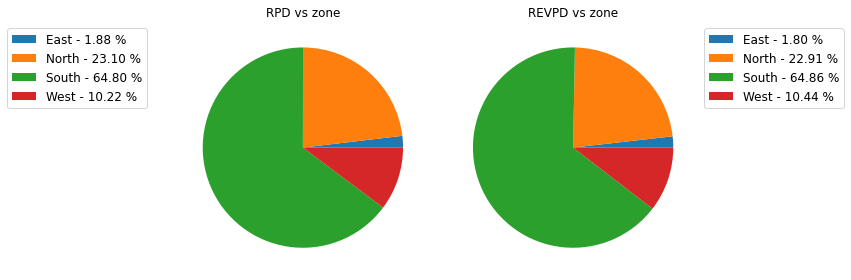

In [ ]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(12,4))
df1 = df.groupby('zone')[['RPD','REVPD']].sum().reset_index()
rpd_perc = 100*df1['RPD']/df1['RPD'].sum()
rpd_label = ['{0} - {1:0.2f} %'.format(i,j) for i,j in zip(df1['zone'], rpd_perc)]

ax1.pie(data=df1,x='RPD',radius=1)

ax1.legend(rpd_label,loc='best',bbox_to_anchor=(-0.1, 1.),fontsize=12)
ax1.title.set_text('RPD vs zone')

revpd_perc = 100*df1['REVPD']/df1['REVPD'].sum()
revpd_label = ['{0} - {1:0.2f} %'.format(i,j) for i,j in zip(df1['zone'], revpd_perc)]

ax2.pie(data=df1,x='REVPD',radius=1)

ax2.legend(revpd_label,loc='best',bbox_to_anchor=(1., 1.),fontsize=12)
ax2.title.set_text('REVPD vs zone')
plt.tight_layout()
plt.show()

Least contributing zone is East and most contributing zone is South.

** Business_source variation based on RPD and REVPD **

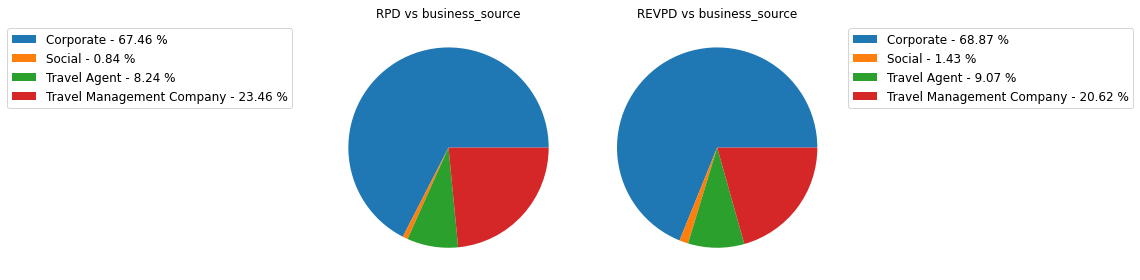

In [ ]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(16,4))
df1 = df.groupby('business_source')[['RPD','REVPD']].sum().reset_index()
rpd_perc = 100*df1['RPD']/df1['RPD'].sum()
rpd_label = ['{0} - {1:0.2f} %'.format(i,j) for i,j in zip(df1['business_source'], rpd_perc)]

ax1.pie(data=df1,x='RPD',radius=1)

ax1.legend(rpd_label,loc='best',bbox_to_anchor=(-0.1, 1.),fontsize=12)
ax1.title.set_text('RPD vs business_source')

revpd_perc = 100*df1['REVPD']/df1['REVPD'].sum()
revpd_label = ['{0} - {1:0.2f} %'.format(i,j) for i,j in zip(df1['business_source'], revpd_perc)]

ax2.pie(data=df1,x='REVPD',radius=1)

ax2.legend(revpd_label,loc='best',bbox_to_anchor=(1., 1.),fontsize=12)
ax2.title.set_text('REVPD vs business_source')
plt.tight_layout()
plt.show()

" As we have seen earlier that the difference between no. of transactions by Travel Management Company and Corporate source was very little but here its a huge gap in terms of RPD and REVPD. We can conclude that Corporate source does booking in bulk, that's why they are contributing more in REVPD. "

** Sales_portfolio variation based on RPD and REVPD **

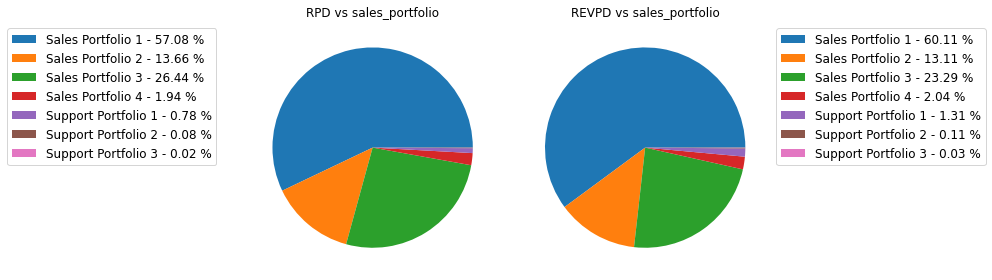

In [ ]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(14,4))
df1 = df.groupby('sales_portfolio')[['RPD','REVPD']].sum().reset_index()
rpd_perc = 100*df1['RPD']/df1['RPD'].sum()
rpd_label = ['{0} - {1:0.2f} %'.format(i,j) for i,j in zip(df1['sales_portfolio'], rpd_perc)]

ax1.pie(data=df1,x='RPD',radius=1)

ax1.legend(rpd_label,loc='best',bbox_to_anchor=(-0.1, 1.),fontsize=12)
ax1.title.set_text('RPD vs sales_portfolio')

revpd_perc = 100*df1['REVPD']/df1['REVPD'].sum()
revpd_label = ['{0} - {1:0.2f} %'.format(i,j) for i,j in zip(df1['sales_portfolio'], revpd_perc)]

ax2.pie(data=df1,x='REVPD',radius=1)

ax2.legend(revpd_label,loc='best',bbox_to_anchor=(1., 1.),fontsize=12)
ax2.title.set_text('REVPD vs sales_portfolio')
plt.tight_layout()
plt.show()

Sales portfolio 1 and 3 generates maximum sales for the firm.

**Let's check for continuous variables :**

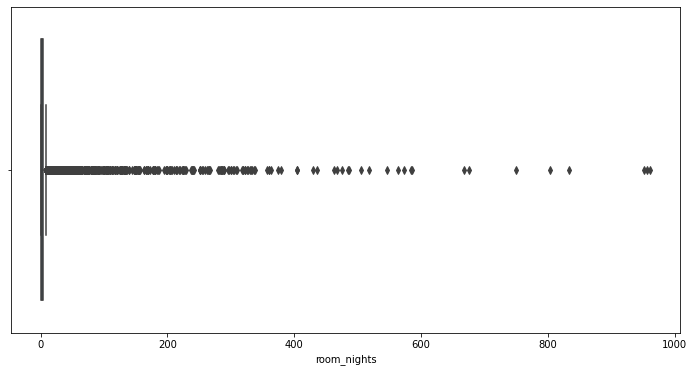

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df,x='room_nights')
plt.show()

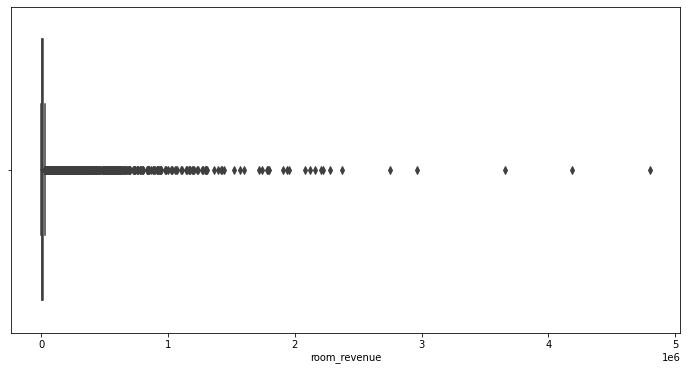

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(x=df['room_revenue'],data=df)
plt.show()

There seems to be quite a lot of outliers in both the columns. Lets have a look at their quartile values.

In [ ]:
df.describe()

room_nights  room_revenue          year           RPD         REVPD
count  39849.000000  3.984900e+04  39849.000000  39849.000000  39849.000000
mean       5.365128  2.063235e+04   2019.744511      0.017028     65.961468
std       21.712913  8.276424e+04      1.492888      0.072349    278.090024
min        1.000000  5.900000e+02   2018.000000      0.003000      1.616000
25%        1.000000  4.000000e+03   2018.000000      0.003000     12.603000
50%        2.000000  7.600000e+03   2019.000000      0.005000     23.014000
75%        4.000000  1.600000e+04   2021.000000      0.014000     49.528000
max      961.000000  4.800000e+06   2022.000000      3.788000  17237.986000

See there's the problem, for room_nights the top 25% values lies between 961 and 5. That seems to be a huge range. 

In [ ]:
df[df['room_nights']>100].head()

hotel_name       city hotel_type hotel_category   zone  \
13550           Premium Suites  Bengaluru   Business        Upscale  South   
16939           Premium Suites  Bengaluru   Business        Upscale  South   
36810           Premium Suites  Bengaluru   Business        Upscale  South   
37576  Raille's Inn Essentials    Chennai   Business        Economy  South   
37587  Raille's Inn Essentials    Chennai   Business        Economy  South   

       room_nights  room_revenue            business_source  \
13550          332          6000                  Corporate   
16939          177         21000                  Corporate   
36810          112        134400  Travel Management Company   
37576          118        177000                  Corporate   
37587          152        182400                  Corporate   

                                      account_name    sales_portfolio  \
13550                    Flipkart Internet Pvt Ltd  Sales Portfolio 1   
16939                    Flipkart Internet Pvt Ltd  Sales Portfolio 1   
36810  Corporate Solutions Redefined India Pvt Ltd  Sales Portfolio 1   
37576                                Wipro Limited  Sales Portfolio 3   
37587                                Wipro Limited  Sales Portfolio 3   

          month  year    RPD    REVPD  
13550   January  2020  0.910   16.438  
16939     April  2022  0.835   99.057  
36810       May  2020  0.307  368.219  
37576   January  2019  0.323  484.932  
37587  December  2018  0.416  499.726

And for 'room_revenue' the case could be that the prices must have changed during the course of time. Well we will not dig deeper into that as we are just analysing and not predicting or trying to run a machine learning model.

# **BIVARIATE ANALYSIS**

In [ ]:
months = ['January','February','March','April','May','June','July','August','September','October','November','December']
df['month'] = pd.Categorical(df['month'],categories=months,ordered=True)

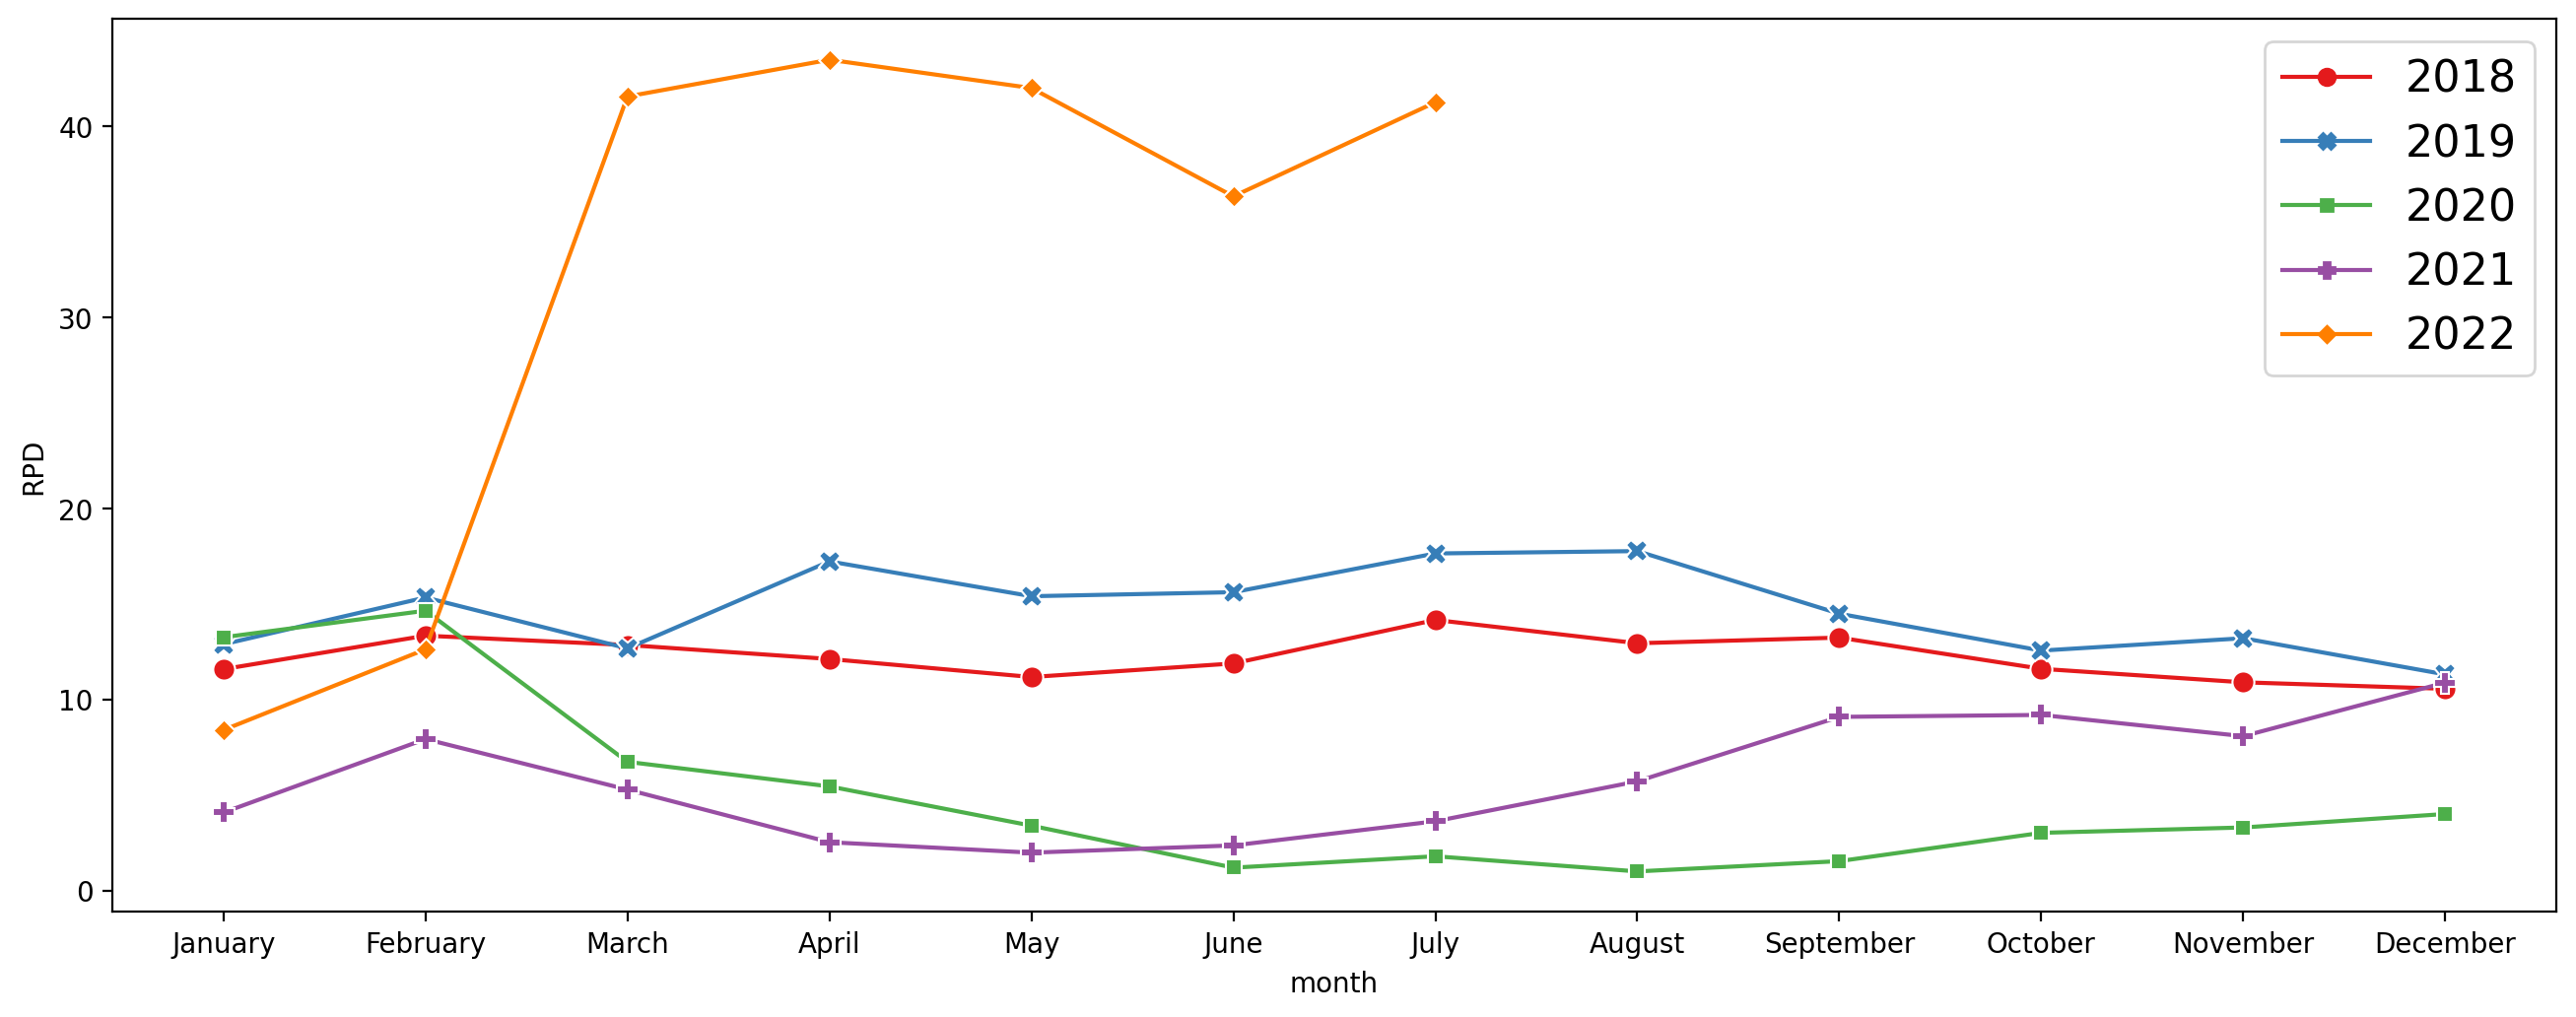

In [ ]:
plt.figure(figsize=(16,6),dpi=(200))
sns.lineplot(data=df,y='RPD',x='month',hue='year',estimator=np.sum,ci=None,palette='Set1',style='year',markers=True,markersize=8,dashes=False)
plt.legend(loc='best',bbox_to_anchor=(1., 1.),fontsize=16)
plt.title('')
plt.show()

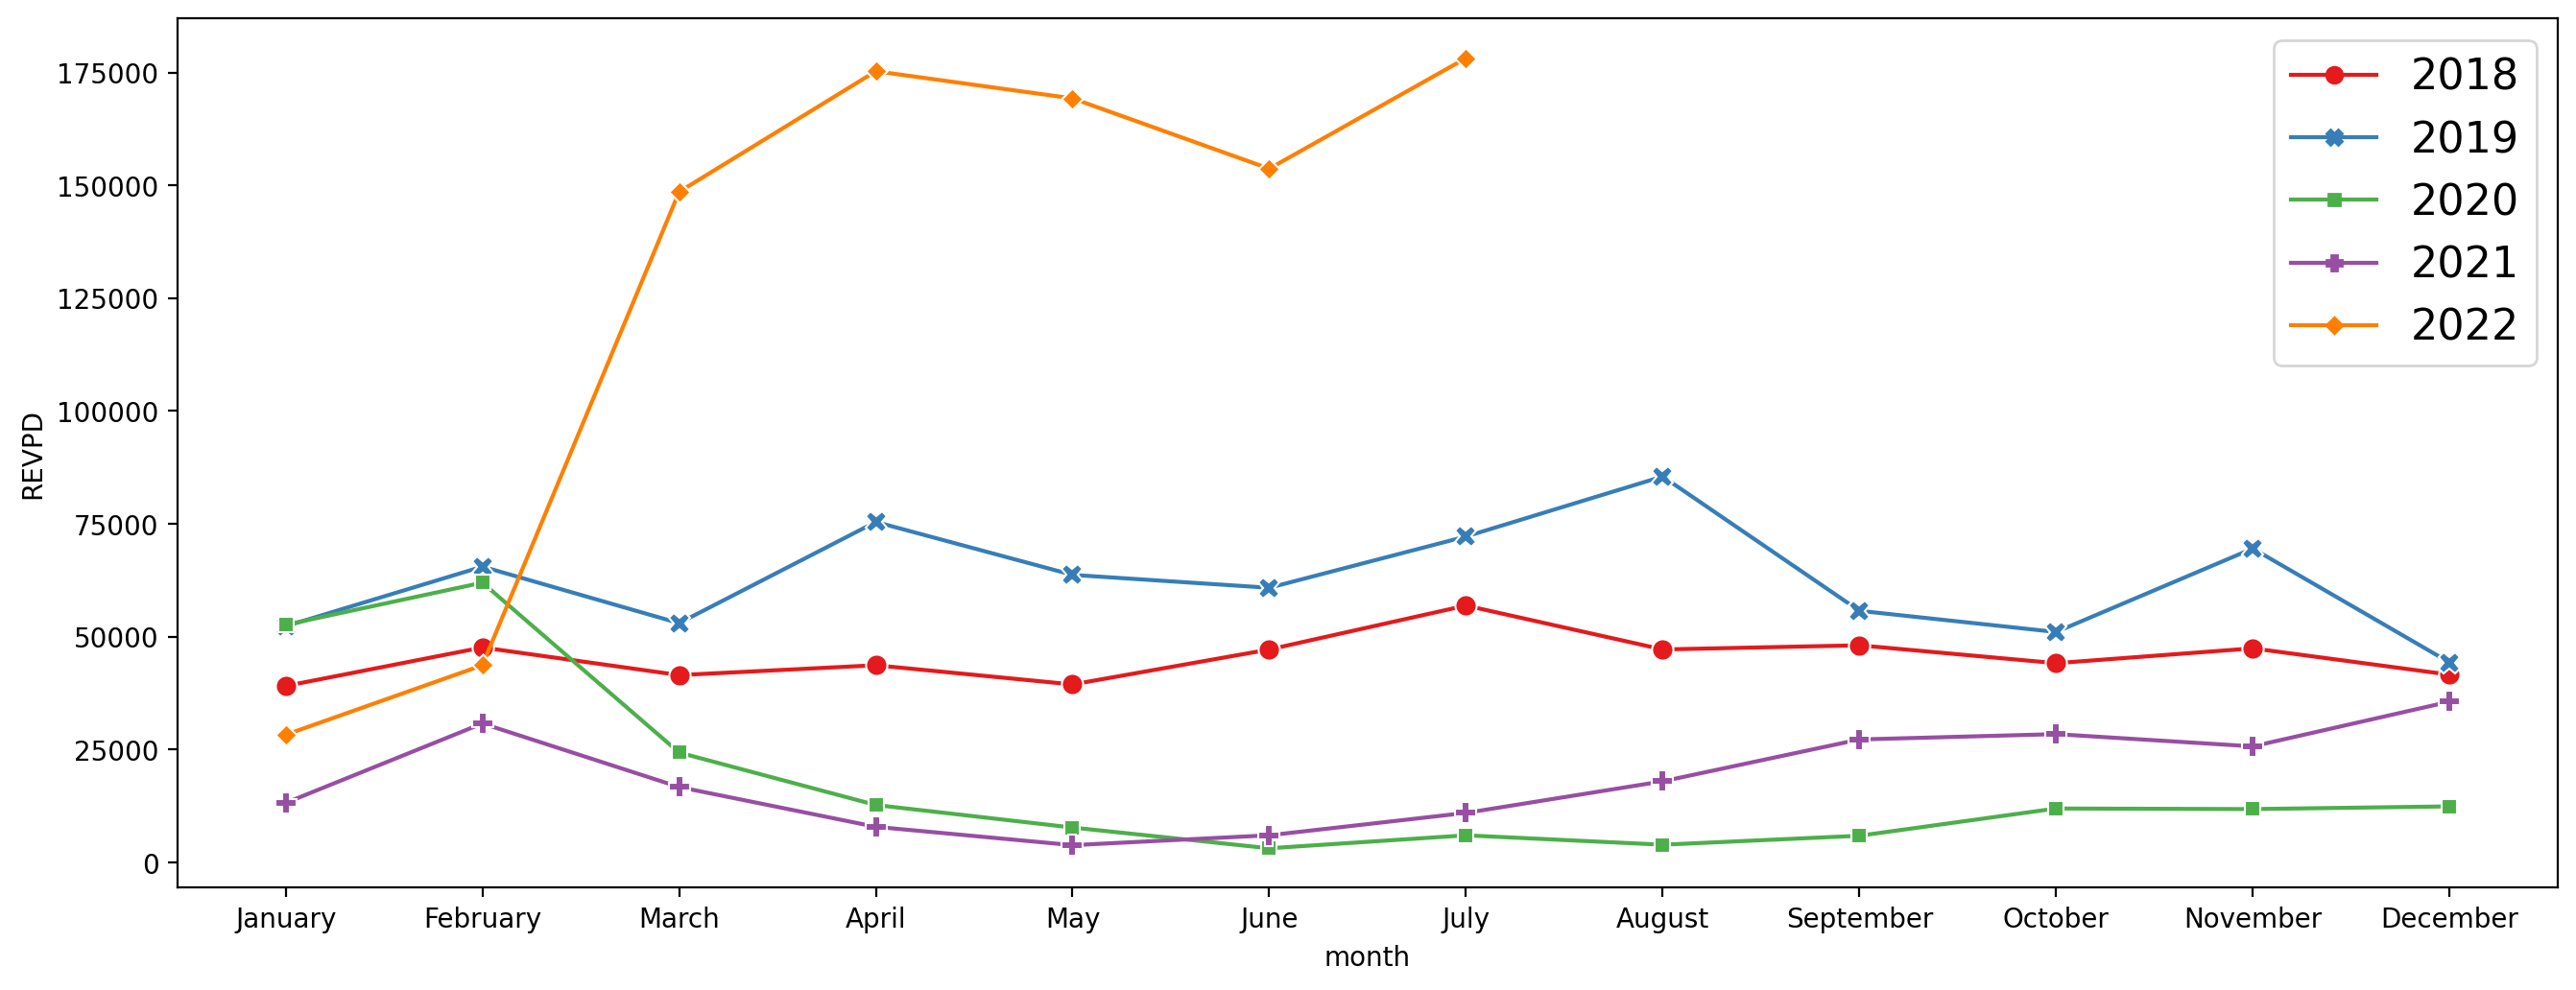

In [ ]:
plt.figure(figsize=(16,6),dpi=(200))
sns.lineplot(data=df,y='REVPD',x='month',hue='year',estimator=np.sum,ci=None,palette='Set1',style='year',markers=True,markersize=8,dashes=False)
plt.legend(loc='best',bbox_to_anchor=(1., 1.),fontsize=16)
plt.show()

**Clearly 2019 was the best year before 2022. And the downfall from February 2020 is clearly visible which continued till January 2022 and that's obviously because of COVID .**

**# Lets have a look at yearly variation of categorical variables in terms of RPD and REVPD-->**

**Hotel_type**

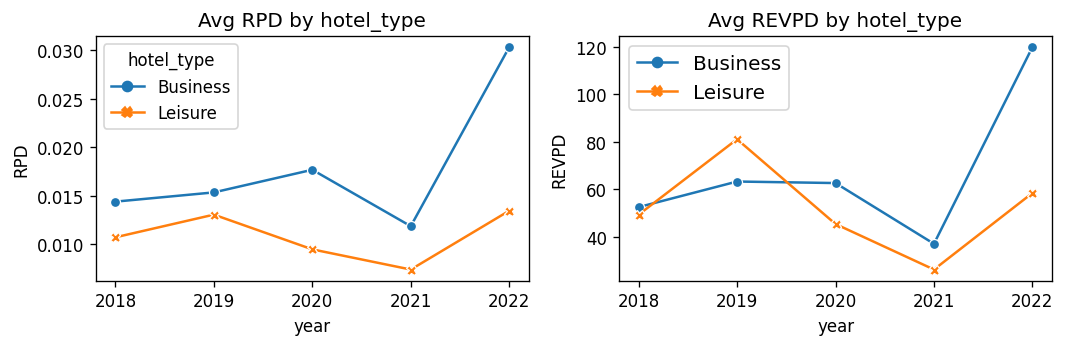

In [ ]:
figure,(ax1,ax2) = plt.subplots(1,2,figsize=(9,3),dpi=120)

sns.lineplot(ax=ax1,x=df['year'],y=df['RPD'],hue=df['hotel_type'],ci=None,style=df['hotel_type'],markers=True,markersize=6,dashes=False)
ax1.set_title('Avg RPD by hotel_type')

sns.lineplot(ax=ax2,x=df['year'],y=df['REVPD'],hue=df['hotel_type'],ci=None,style=df['hotel_type'],markers=True,markersize=6,dashes=False)
ax2.set_title('Avg REVPD by hotel_type')

plt.legend(loc='best',fontsize=12)
plt.tight_layout()
plt.show()

**Hotel_Category**

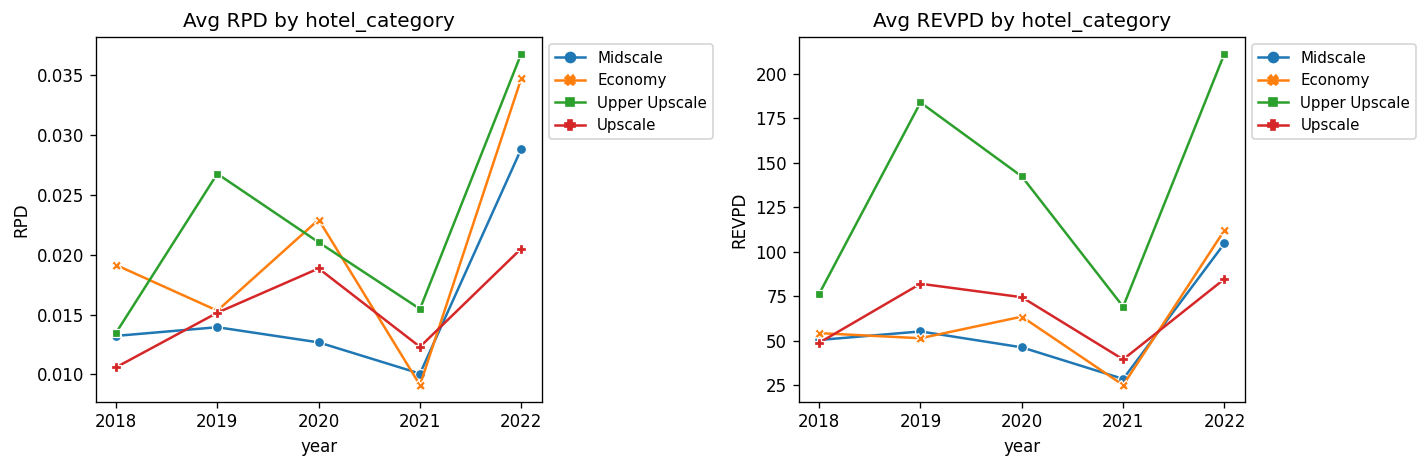

In [ ]:
figure,(ax1,ax2) = plt.subplots(1,2,figsize=(12,4),dpi=120)

sns.lineplot(ax=ax1,x=df['year'],y=df['RPD'],hue=df['hotel_category'],ci=None,style=df['hotel_category'],markers=True,markersize=6,dashes=False)
ax1.set_title('Avg RPD by hotel_category')
ax1.legend(loc='best',bbox_to_anchor=(1., 1.),fontsize=9)

sns.lineplot(ax=ax2,x=df['year'],y=df['REVPD'],hue=df['hotel_category'],ci=None,style=df['hotel_category'],markers=True,markersize=6,dashes=False)
ax2.set_title('Avg REVPD by hotel_category')
ax2.legend(loc='best',bbox_to_anchor=(1., 1.),fontsize=9)

plt.tight_layout()
plt.show()

**ZONE**

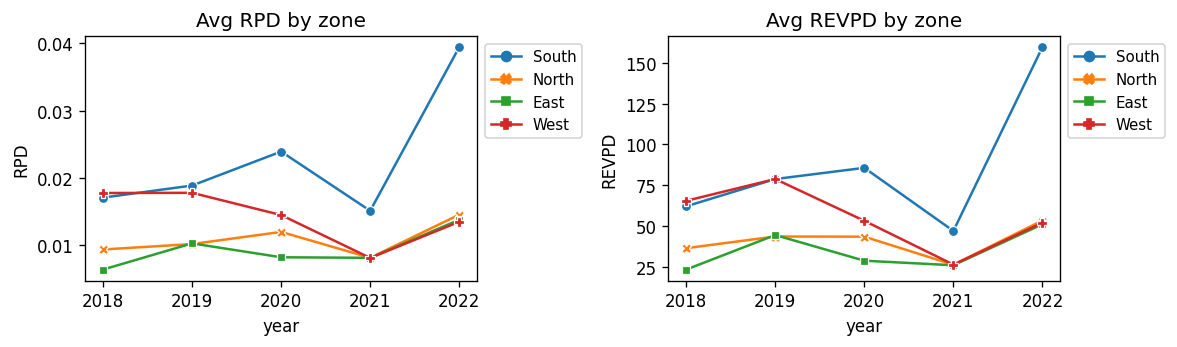

In [ ]:
figure,(ax1,ax2) = plt.subplots(1,2,figsize=(10,3),dpi=120)

sns.lineplot(ax=ax1,x=df['year'],y=df['RPD'],hue=df['zone'],ci=None,style=df['zone'],markers=True,markersize=6,dashes=False)
ax1.set_title('Avg RPD by zone')
ax1.legend(loc='best',bbox_to_anchor=(1., 1.),fontsize=9)

sns.lineplot(ax=ax2,x=df['year'],y=df['REVPD'],hue=df['zone'],ci=None,style=df['zone'],markers=True,markersize=6,dashes=False)
ax2.set_title('Avg REVPD by zone')
ax2.legend(loc='best',bbox_to_anchor=(1., 1.),fontsize=9)

plt.tight_layout()
plt.show()

**BUSINESS_SOURCE**

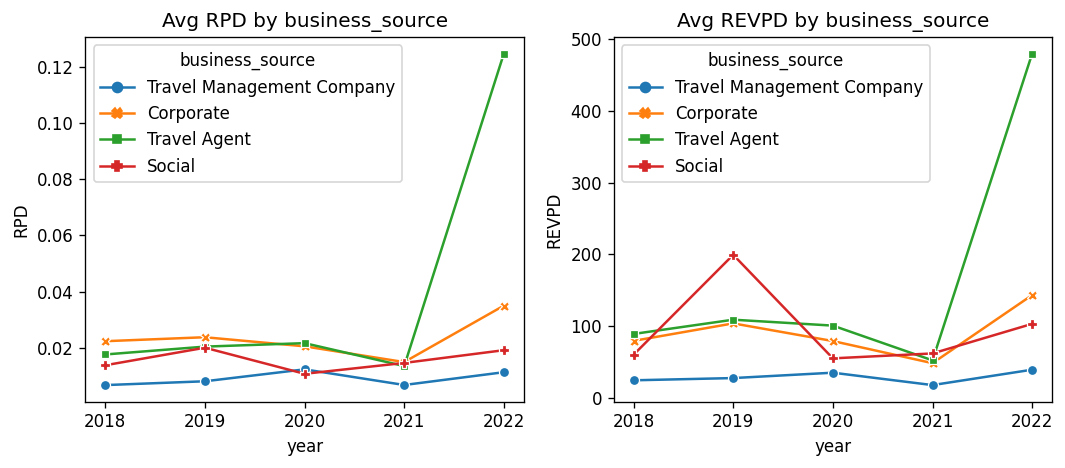

In [ ]:
figure,(ax1,ax2) = plt.subplots(1,2,figsize=(9,4),dpi=120)

sns.lineplot(ax=ax1,x=df['year'],y=df['RPD'],hue=df['business_source'],ci=None,style=df['business_source'],markers=True,markersize=6,dashes=False)
ax1.set_title('Avg RPD by business_source')

sns.lineplot(ax=ax2,x=df['year'],y=df['REVPD'],hue=df['business_source'],ci=None,style=df['business_source'],markers=True,markersize=6,dashes=False)
ax2.set_title('Avg REVPD by business_source')

plt.tight_layout()
plt.show()

**Nothing really shocking variation in these variables except for Travel agent. Though the this year has not ended yet but average RPD from Travel agent seems to be much higher.**

In [ ]:
df['business_source'].value_counts()

Travel Management Company    19121
Corporate                    18972
Travel Agent                  1403
Social                         353
Name: business_source, dtype: int64

In [ ]:
100*df[df['business_source']=='Travel Agent']['year'].value_counts()/1403

2018    31.361368
2019    27.441197
2022    20.313614
2021    13.613685
2020     7.270135
Name: year, dtype: float64

In [ ]:
df[df['business_source']=='Travel Agent'].groupby('year')[['RPD','REVPD']].mean()

RPD       REVPD
year                      
2018  0.017573   89.449386
2019  0.020369  109.258764
2020  0.021608  101.035824
2021  0.013440   52.714387
2022  0.124867  479.278070

**So this clears the case as there are only 1403 entries for Travel Agent and out of those 20% have came in 2022, that's why average RPD and REVPD is so high in comparision to previous years.**

**SALES_PORTFOLIO**

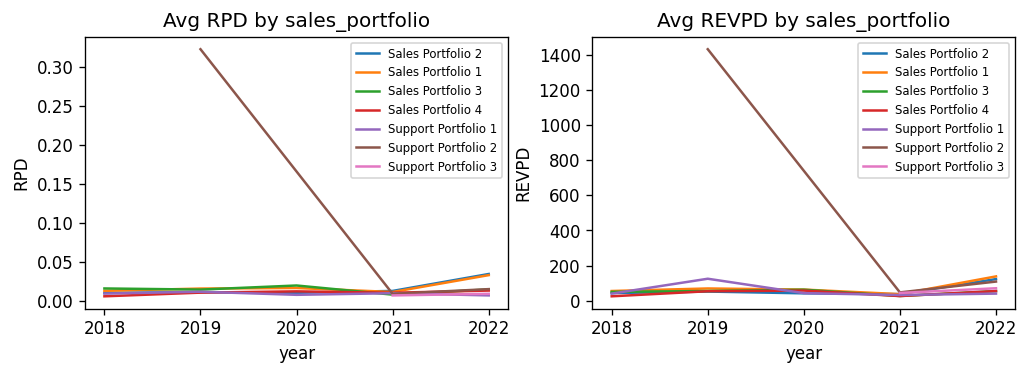

In [ ]:
figure,(ax1,ax2) = plt.subplots(1,2,figsize=(10,3),dpi=120)

sns.lineplot(ax=ax1,x=df['year'],y=df['RPD'],hue=df['sales_portfolio'],ci=None)
ax1.set_title('Avg RPD by sales_portfolio')
ax1.legend(bbox_to_anchor=(1., 1.),fontsize=7)

sns.lineplot(ax=ax2,x=df['year'],y=df['REVPD'],hue=df['sales_portfolio'],ci=None)
ax2.set_title('Avg REVPD by sales_portfolio')
ax2.legend(bbox_to_anchor=(1., 1.),fontsize=7)

plt.show()

In [ ]:
df.groupby('sales_portfolio')[['RPD','REVPD']].mean()

RPD       REVPD
sales_portfolio                          
Sales Portfolio 1    0.018329   74.773012
Sales Portfolio 2    0.018124   67.415197
Sales Portfolio 3    0.014990   51.132602
Sales Portfolio 4    0.012067   49.044748
Support Portfolio 1  0.010364   67.524785
Support Portfolio 2  0.030222  159.091722
Support Portfolio 3  0.008385   57.241077

In [ ]:
df['sales_portfolio'].value_counts()

Sales Portfolio 1      21131
Sales Portfolio 3      11970
Sales Portfolio 2       5113
Sales Portfolio 4       1093
Support Portfolio 1      511
Support Portfolio 2       18
Support Portfolio 3       13
Name: sales_portfolio, dtype: int64

In [ ]:
df[df['sales_portfolio']=='Support Portfolio 2']['year'].value_counts()

2022    10
2021     7
2019     1
Name: year, dtype: int64

There is only one entry for Support Portfolio 2 in 2019 which is shown by the jump in above graph.

**TOP 10 Hotels based on RPD and REVPD**

In [ ]:
hotels = df.groupby('hotel_name')[['RPD','REVPD']].mean().reset_index()

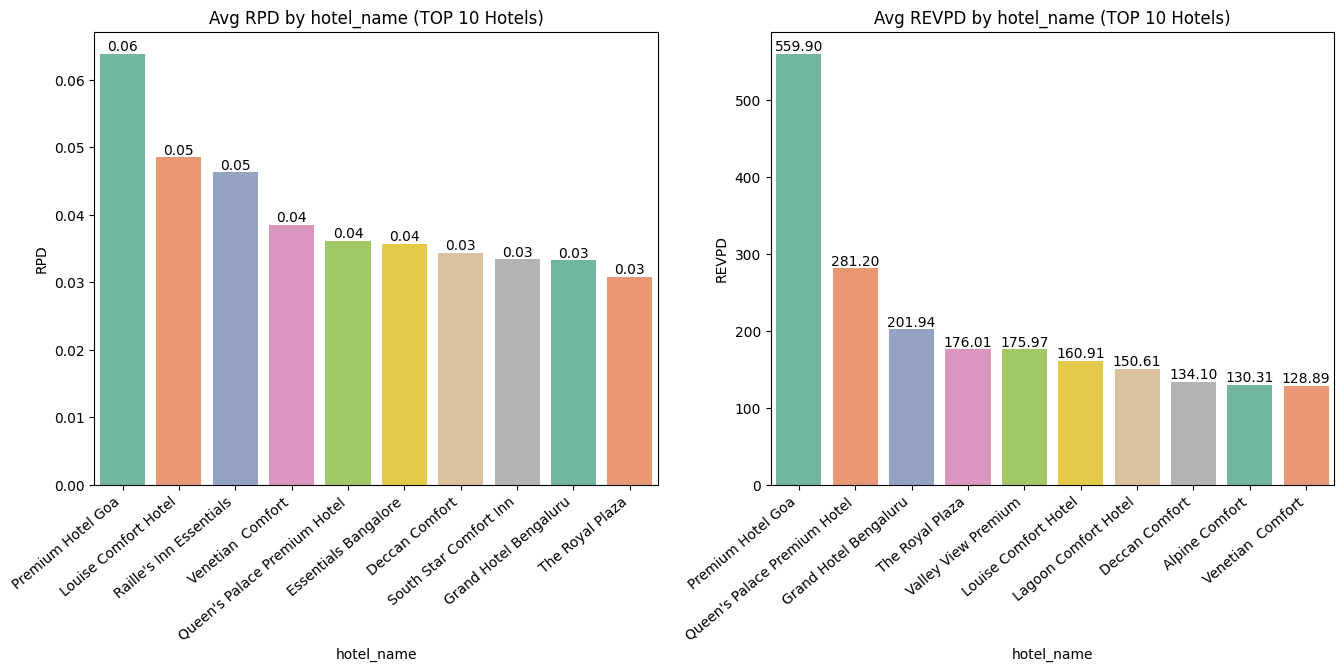

In [ ]:
figure,(ax1,ax2) = plt.subplots(1,2,figsize=(16,6),dpi=100)
df2 = hotels.nlargest(10,'RPD')

sns.barplot(ax=ax1,x=df2['hotel_name'],y=df2['RPD'],palette='Set2',ci=None)
ax1.bar_label(ax1.containers[0],fmt='%.2f',fontsize=10)
ax1.set_title('Avg RPD by hotel_name (TOP 10 Hotels)')
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=40,ha='right')

df2 = hotels.nlargest(10,'REVPD')

sns.barplot(ax=ax2,x=df2['hotel_name'],y=df2['REVPD'],palette='Set2',ci=None)
ax2.set_title('Avg REVPD by hotel_name (TOP 10 Hotels)')
ax2.bar_label(ax2.containers[0],fmt='%.2f',fontsize=10)
ax2.set_xticklabels(ax2.get_xticklabels(),rotation=40,ha='right')

plt.show()

**TOP 10 Cities by RPD and REVPD**

In [ ]:
cities = df.groupby('city')[['RPD','REVPD']].mean().reset_index()

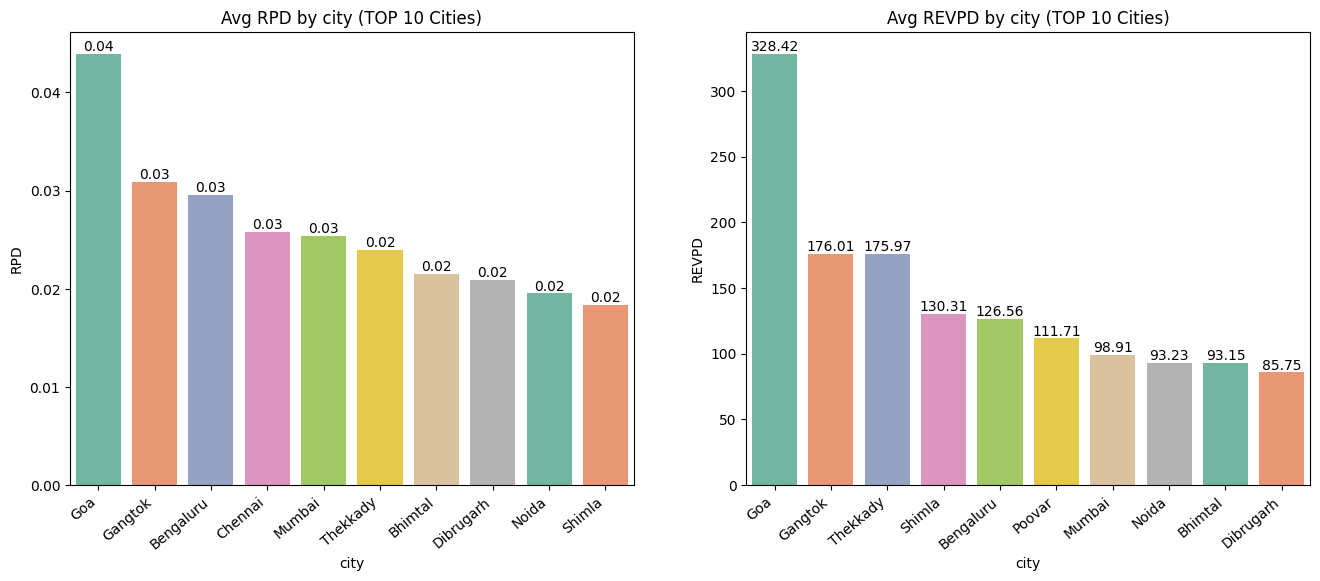

In [ ]:
figure,(ax1,ax2) = plt.subplots(1,2,figsize=(16,6),dpi=100)
df2 = cities.nlargest(10,'RPD')

sns.barplot(ax=ax1,x=df2['city'],y=df2['RPD'],palette='Set2',ci=None)
ax1.bar_label(ax1.containers[0],fmt='%.2f',fontsize=10)
ax1.set_title('Avg RPD by city (TOP 10 Cities)')
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=40,ha='right')

df2 = cities.nlargest(10,'REVPD')

sns.barplot(ax=ax2,x=df2['city'],y=df2['REVPD'],palette='Set2',ci=None)
ax2.bar_label(ax2.containers[0],fmt='%.2f',fontsize=10)
ax2.set_title('Avg REVPD by city (TOP 10 Cities)')
ax2.set_xticklabels(ax2.get_xticklabels(),rotation=40,ha='right')

plt.show()

**Transactions Count for each categorical column:**

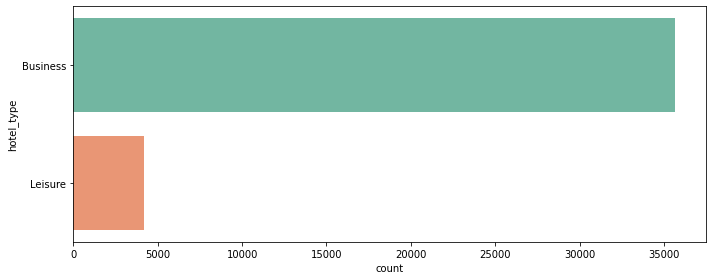

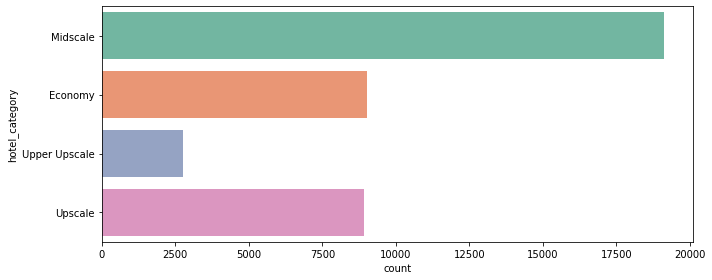

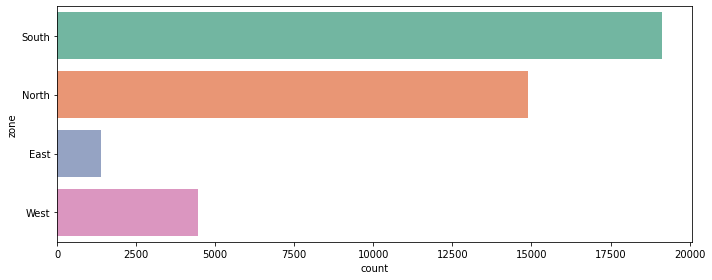

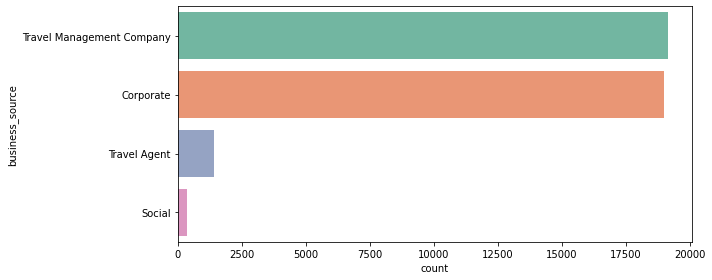

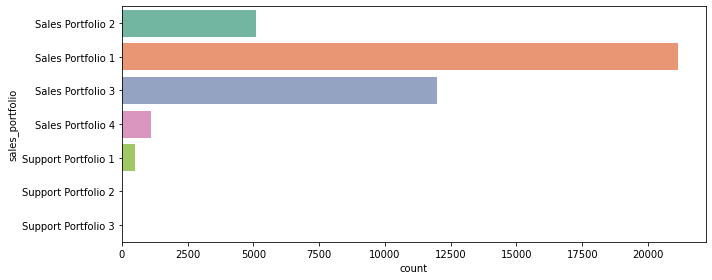

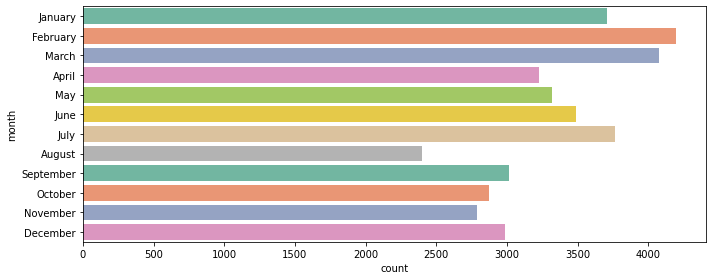

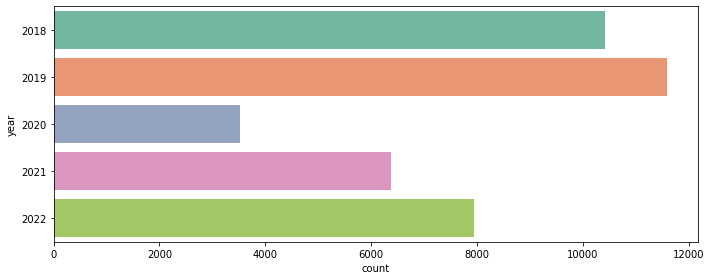

In [ ]:
for i in categorical_columns:
    plt.figure(figsize=(10,4))
    sns.countplot(data=df,y=i,palette='Set2')
    plt.tight_layout()
    plt.show()

In [ ]:
accounts = df.groupby(['year','account_name'])[['RPD','REVPD']].sum().reset_index()

**TOP 10 "account_name" yearwise based on total RPD:**

In [ ]:
top_10_rpd = accounts.groupby('year').apply(lambda x: x.nlargest(10,'RPD'))[['account_name','RPD']].reset_index()

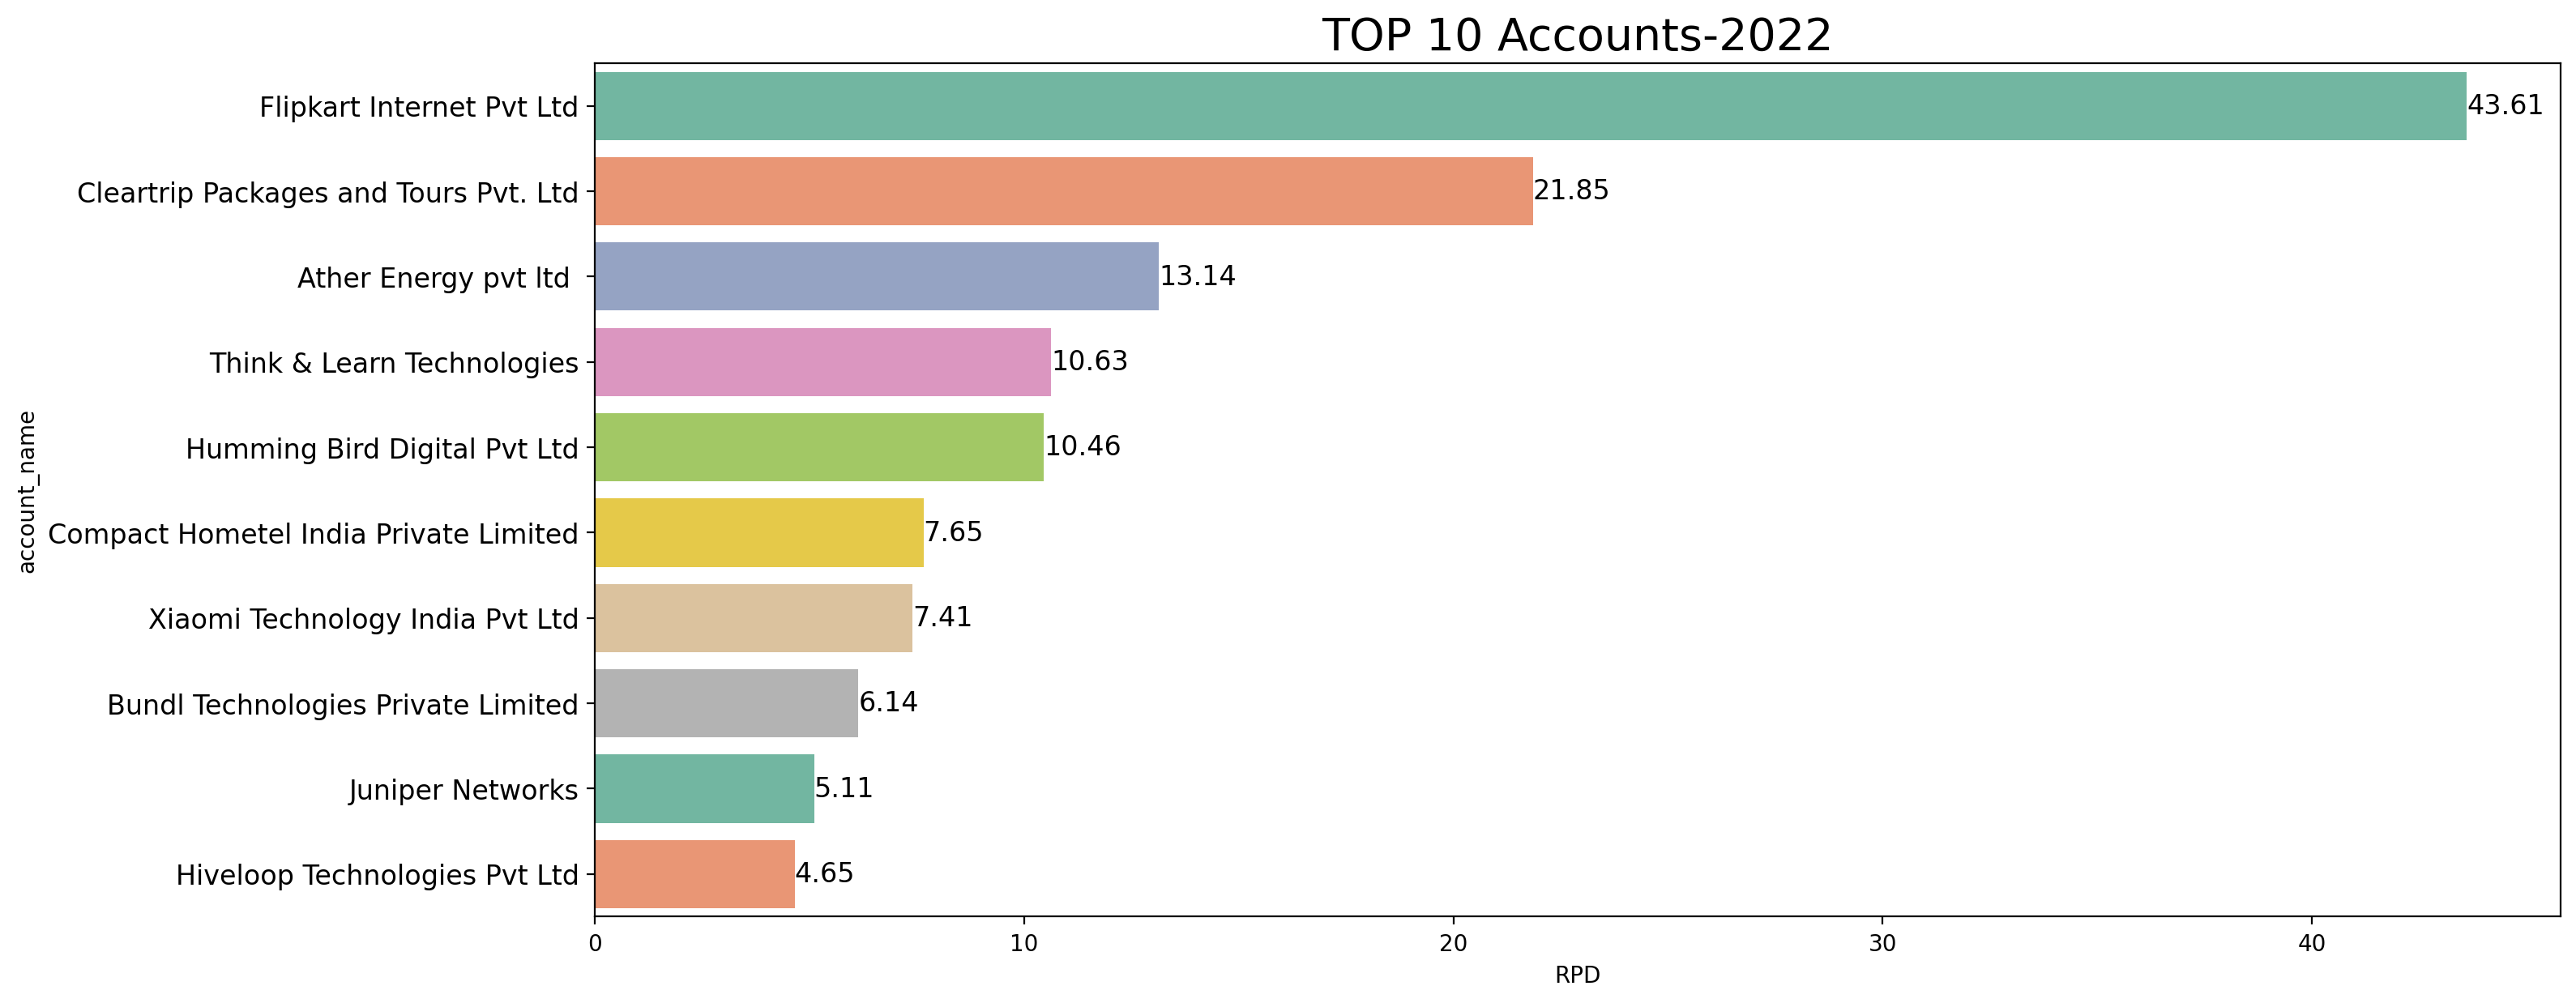

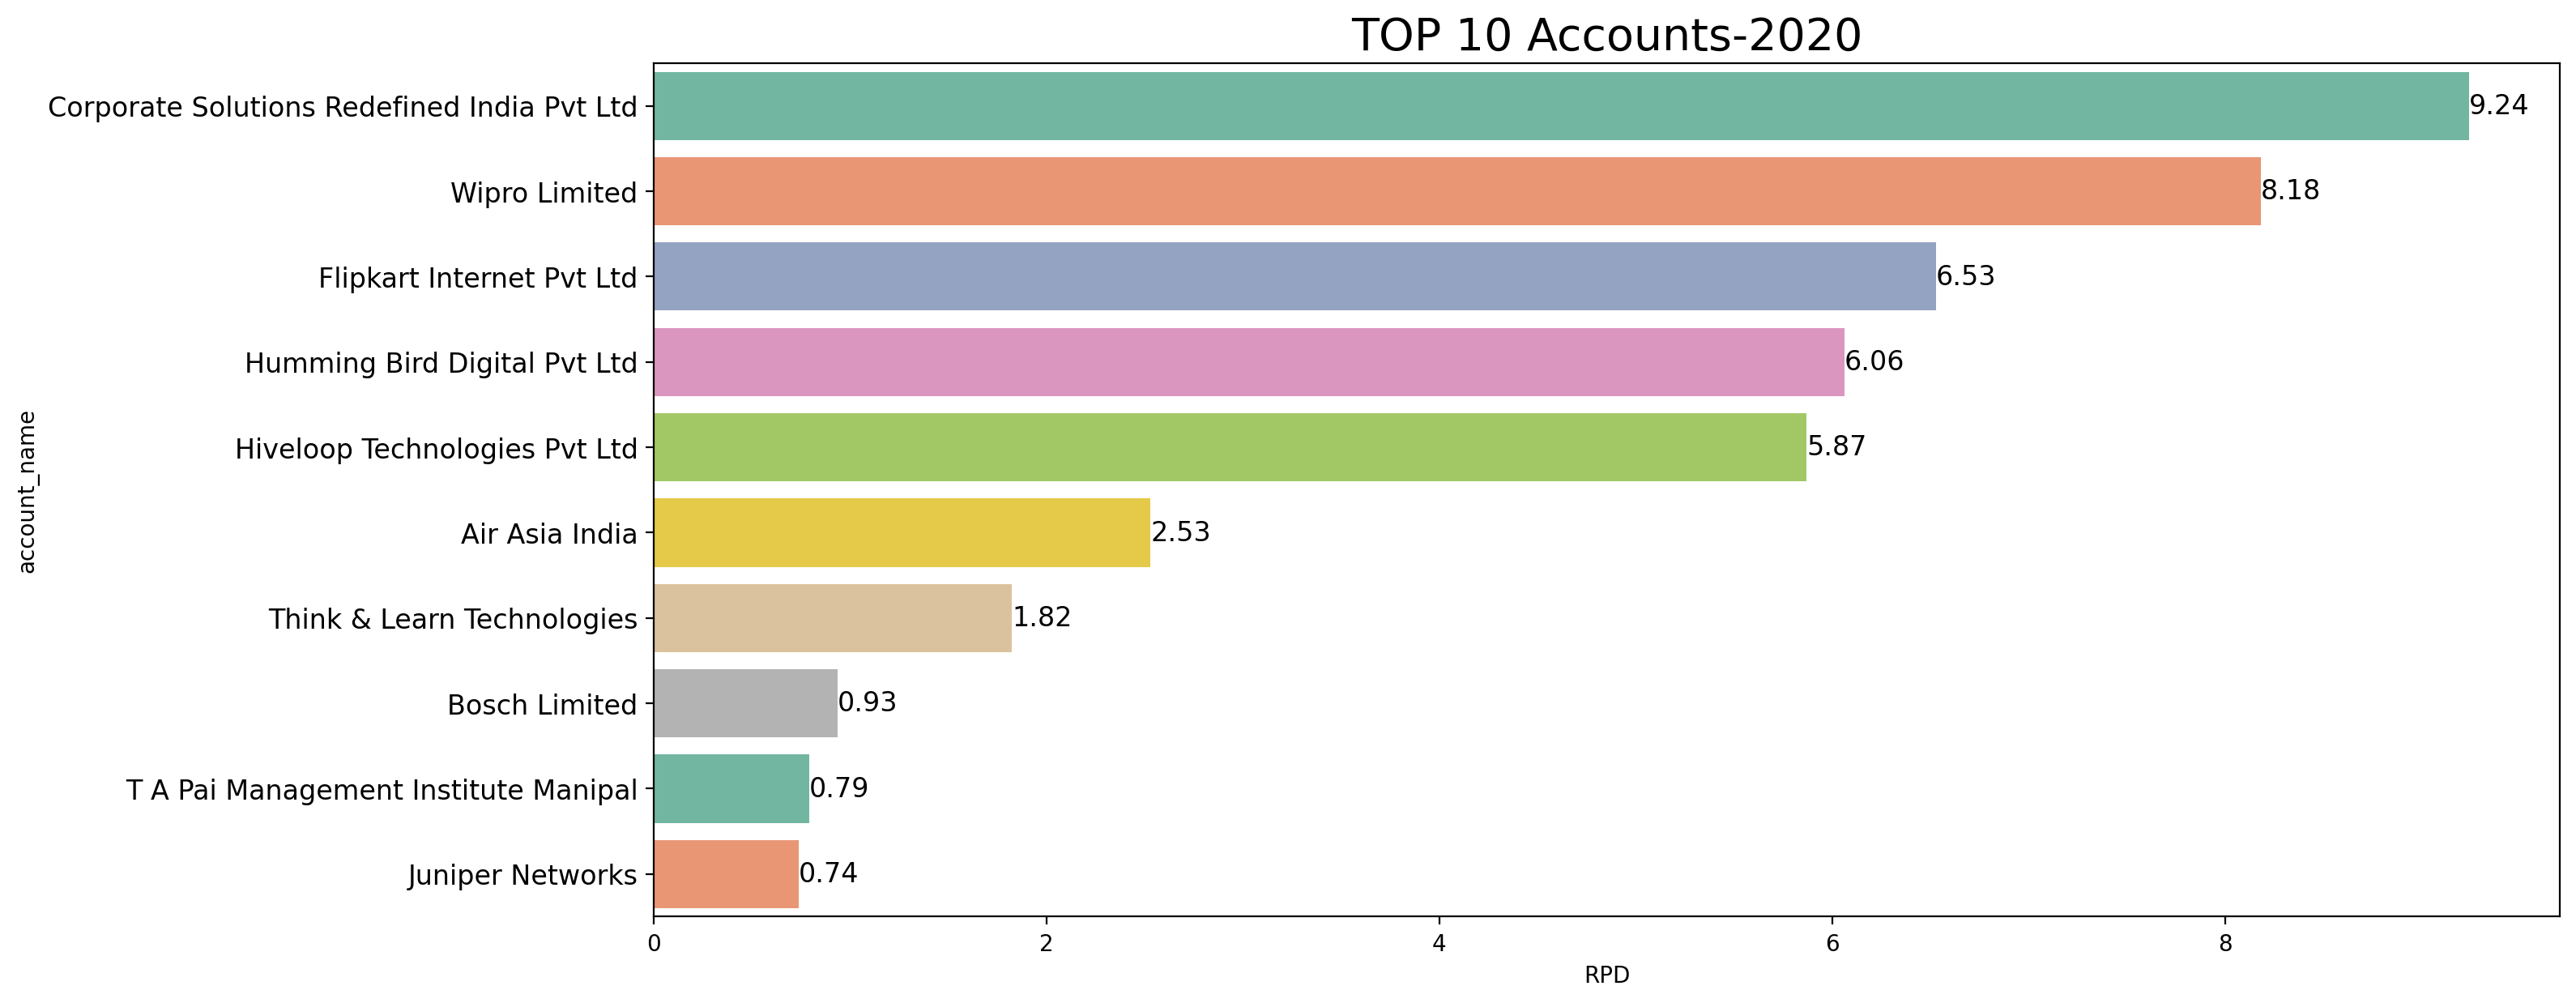

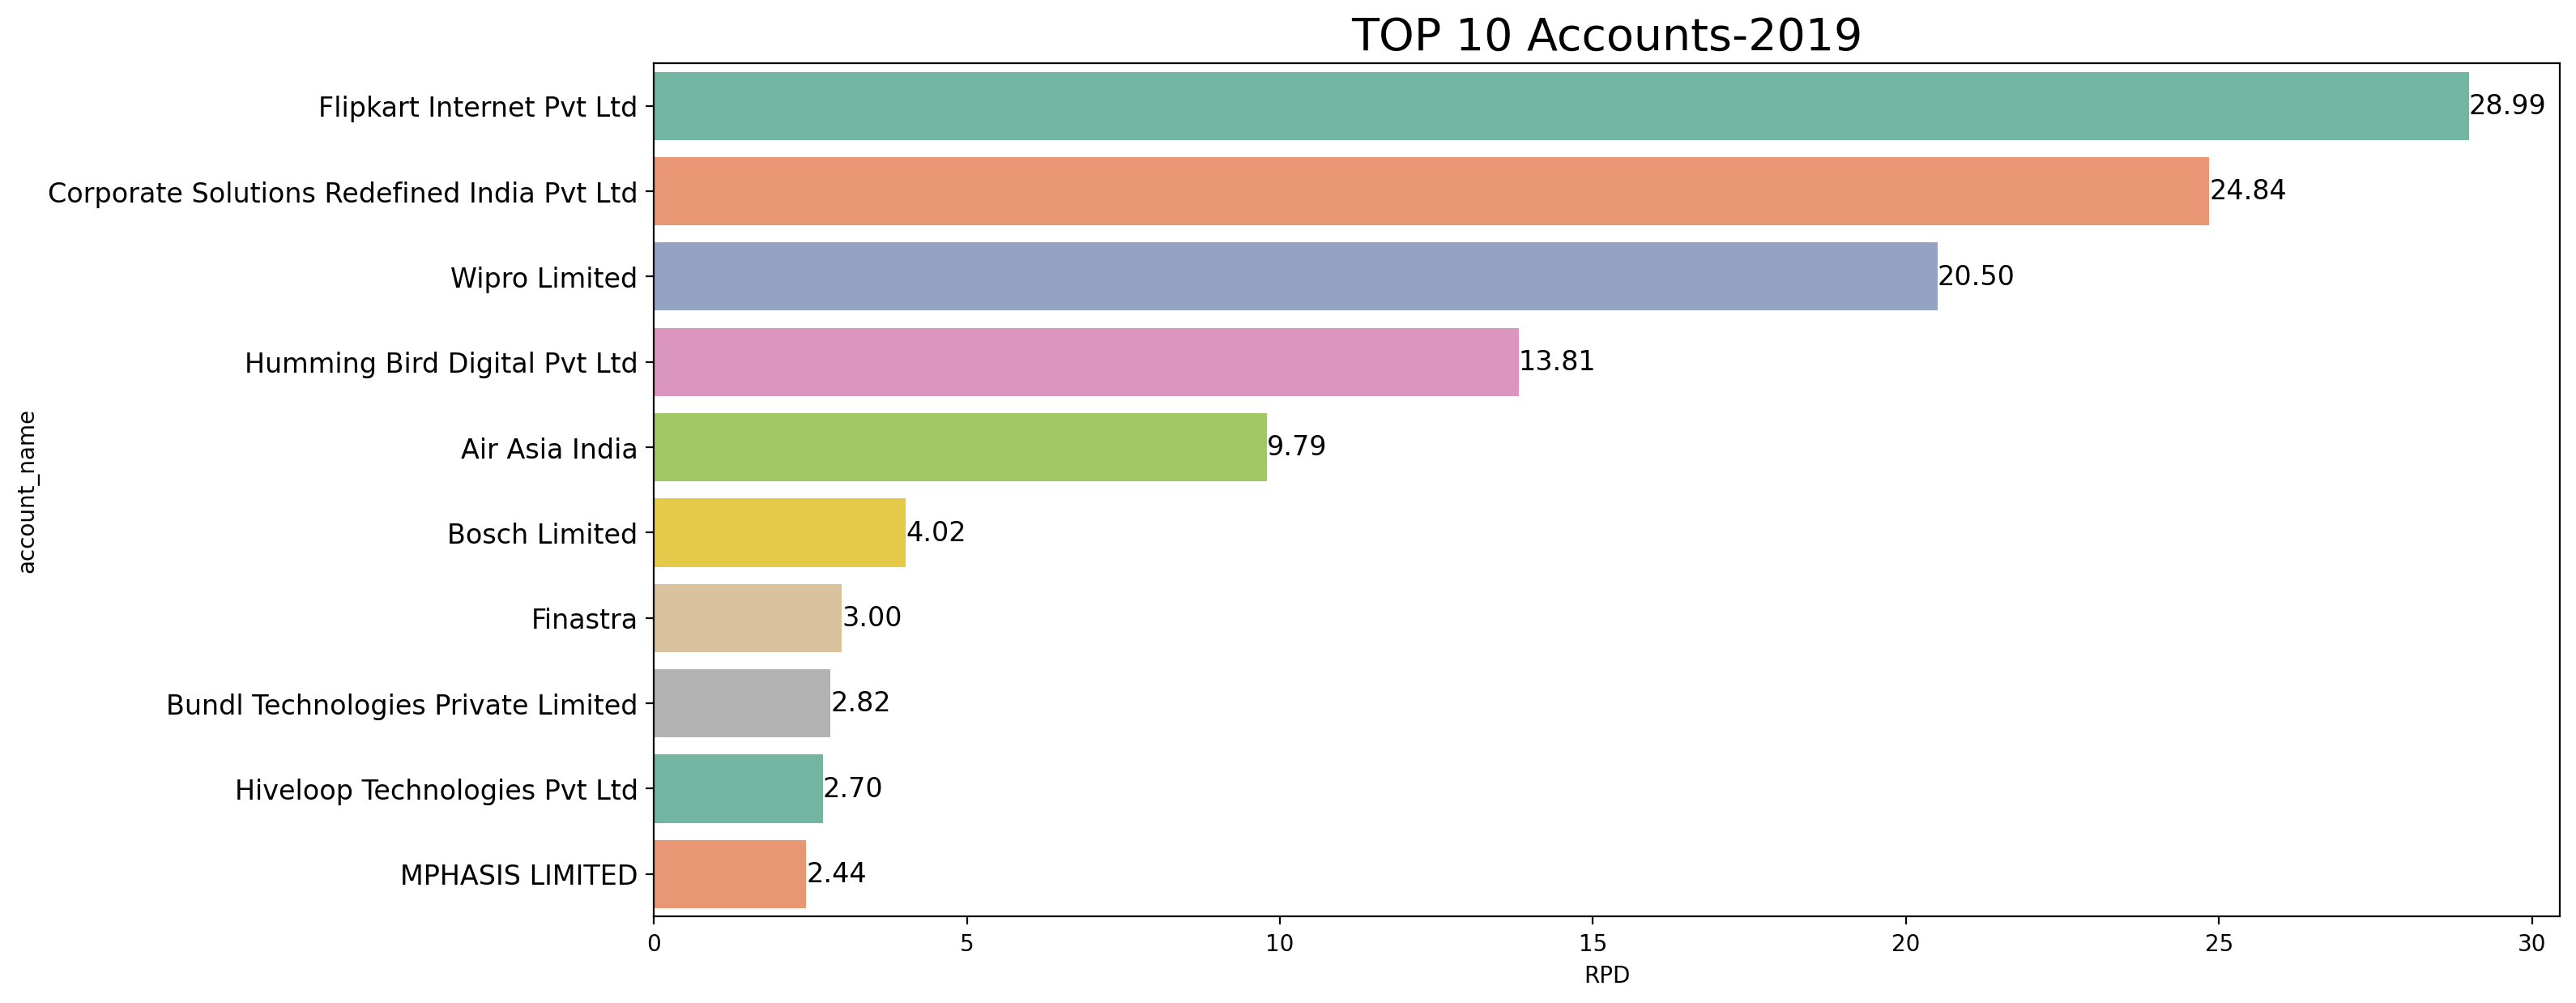

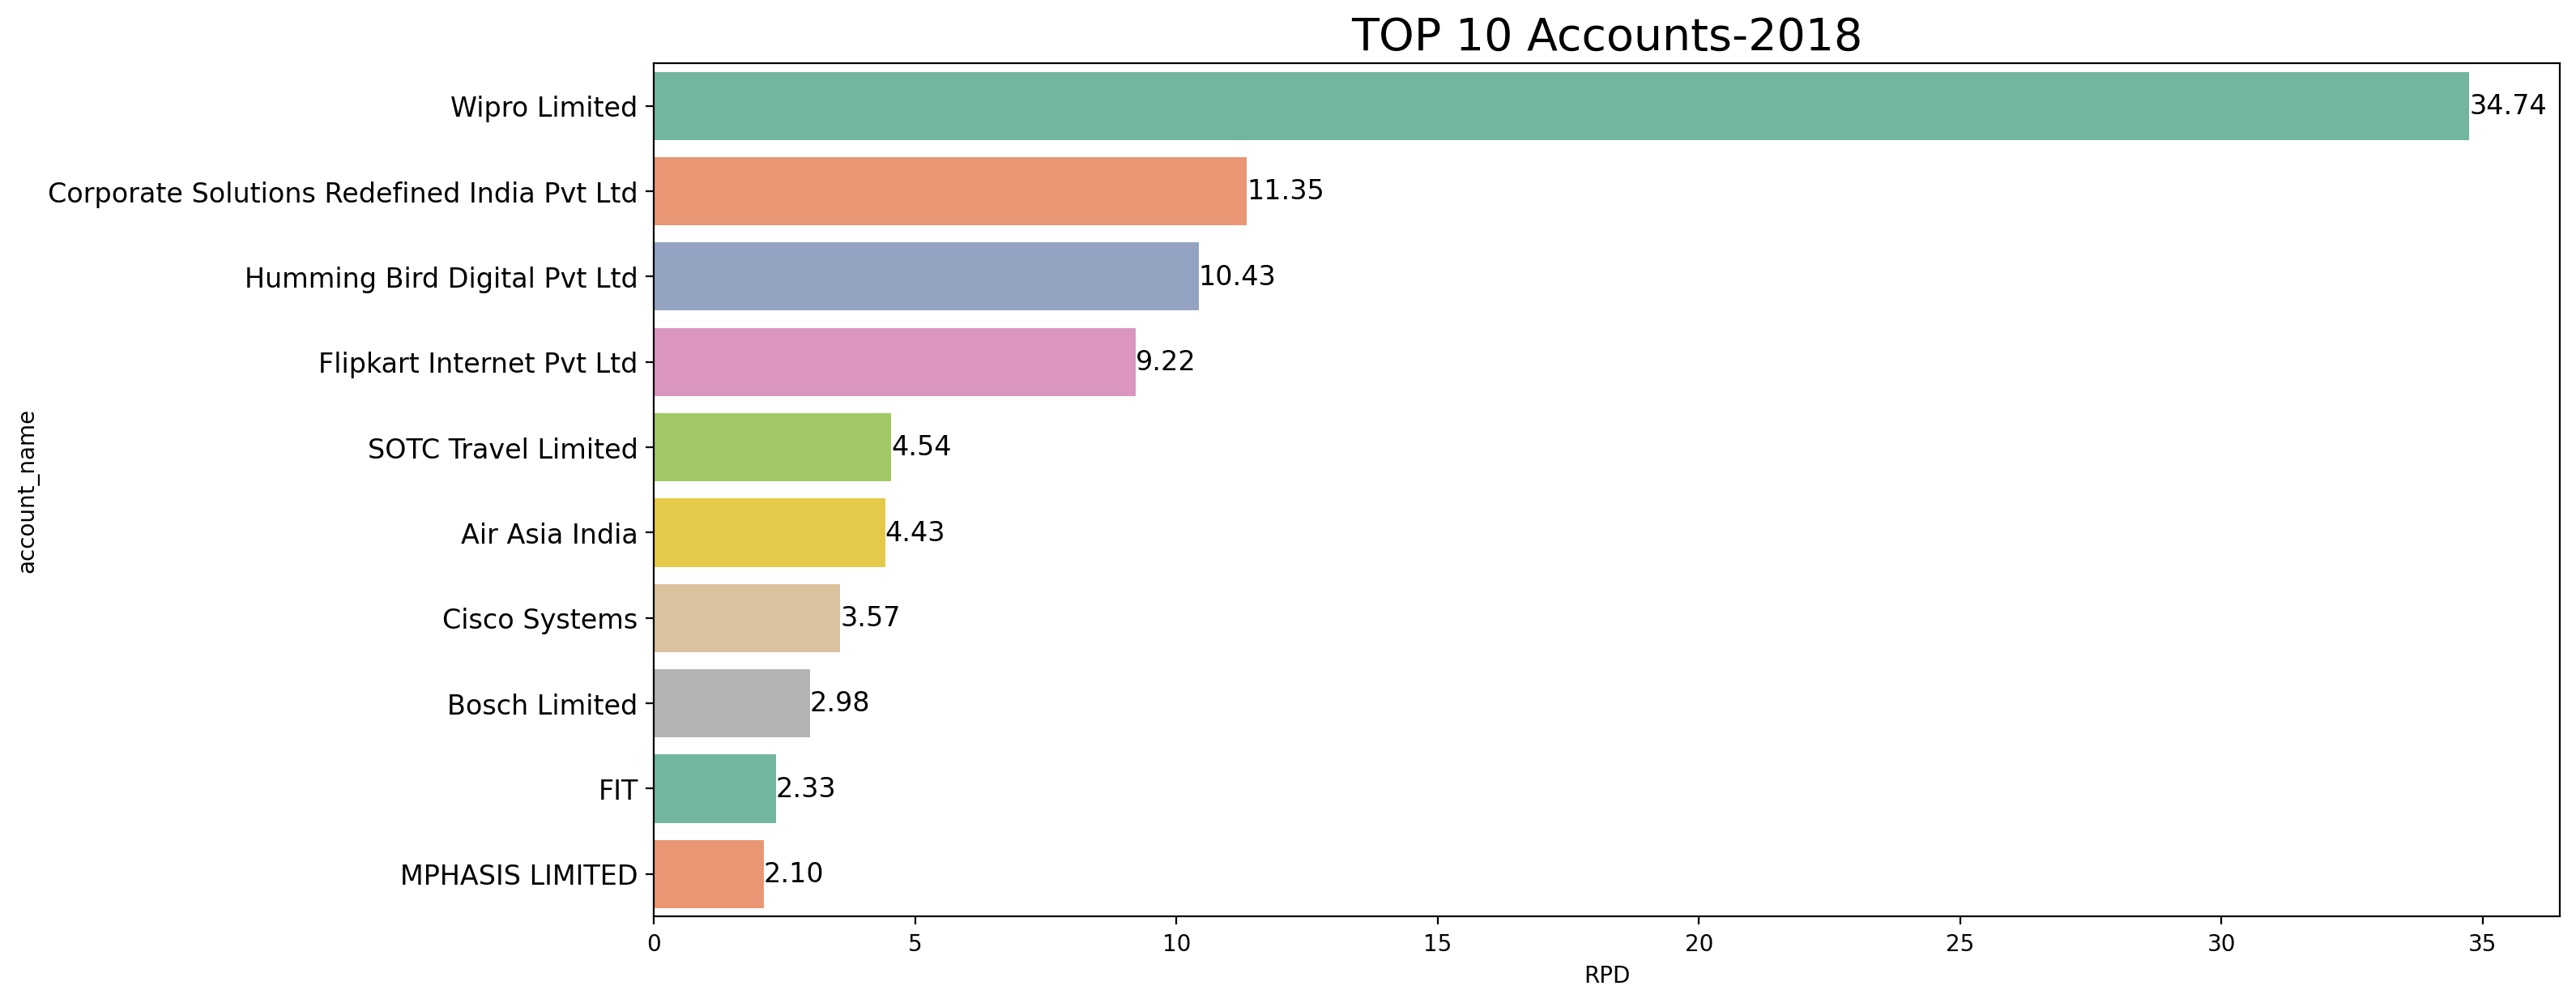

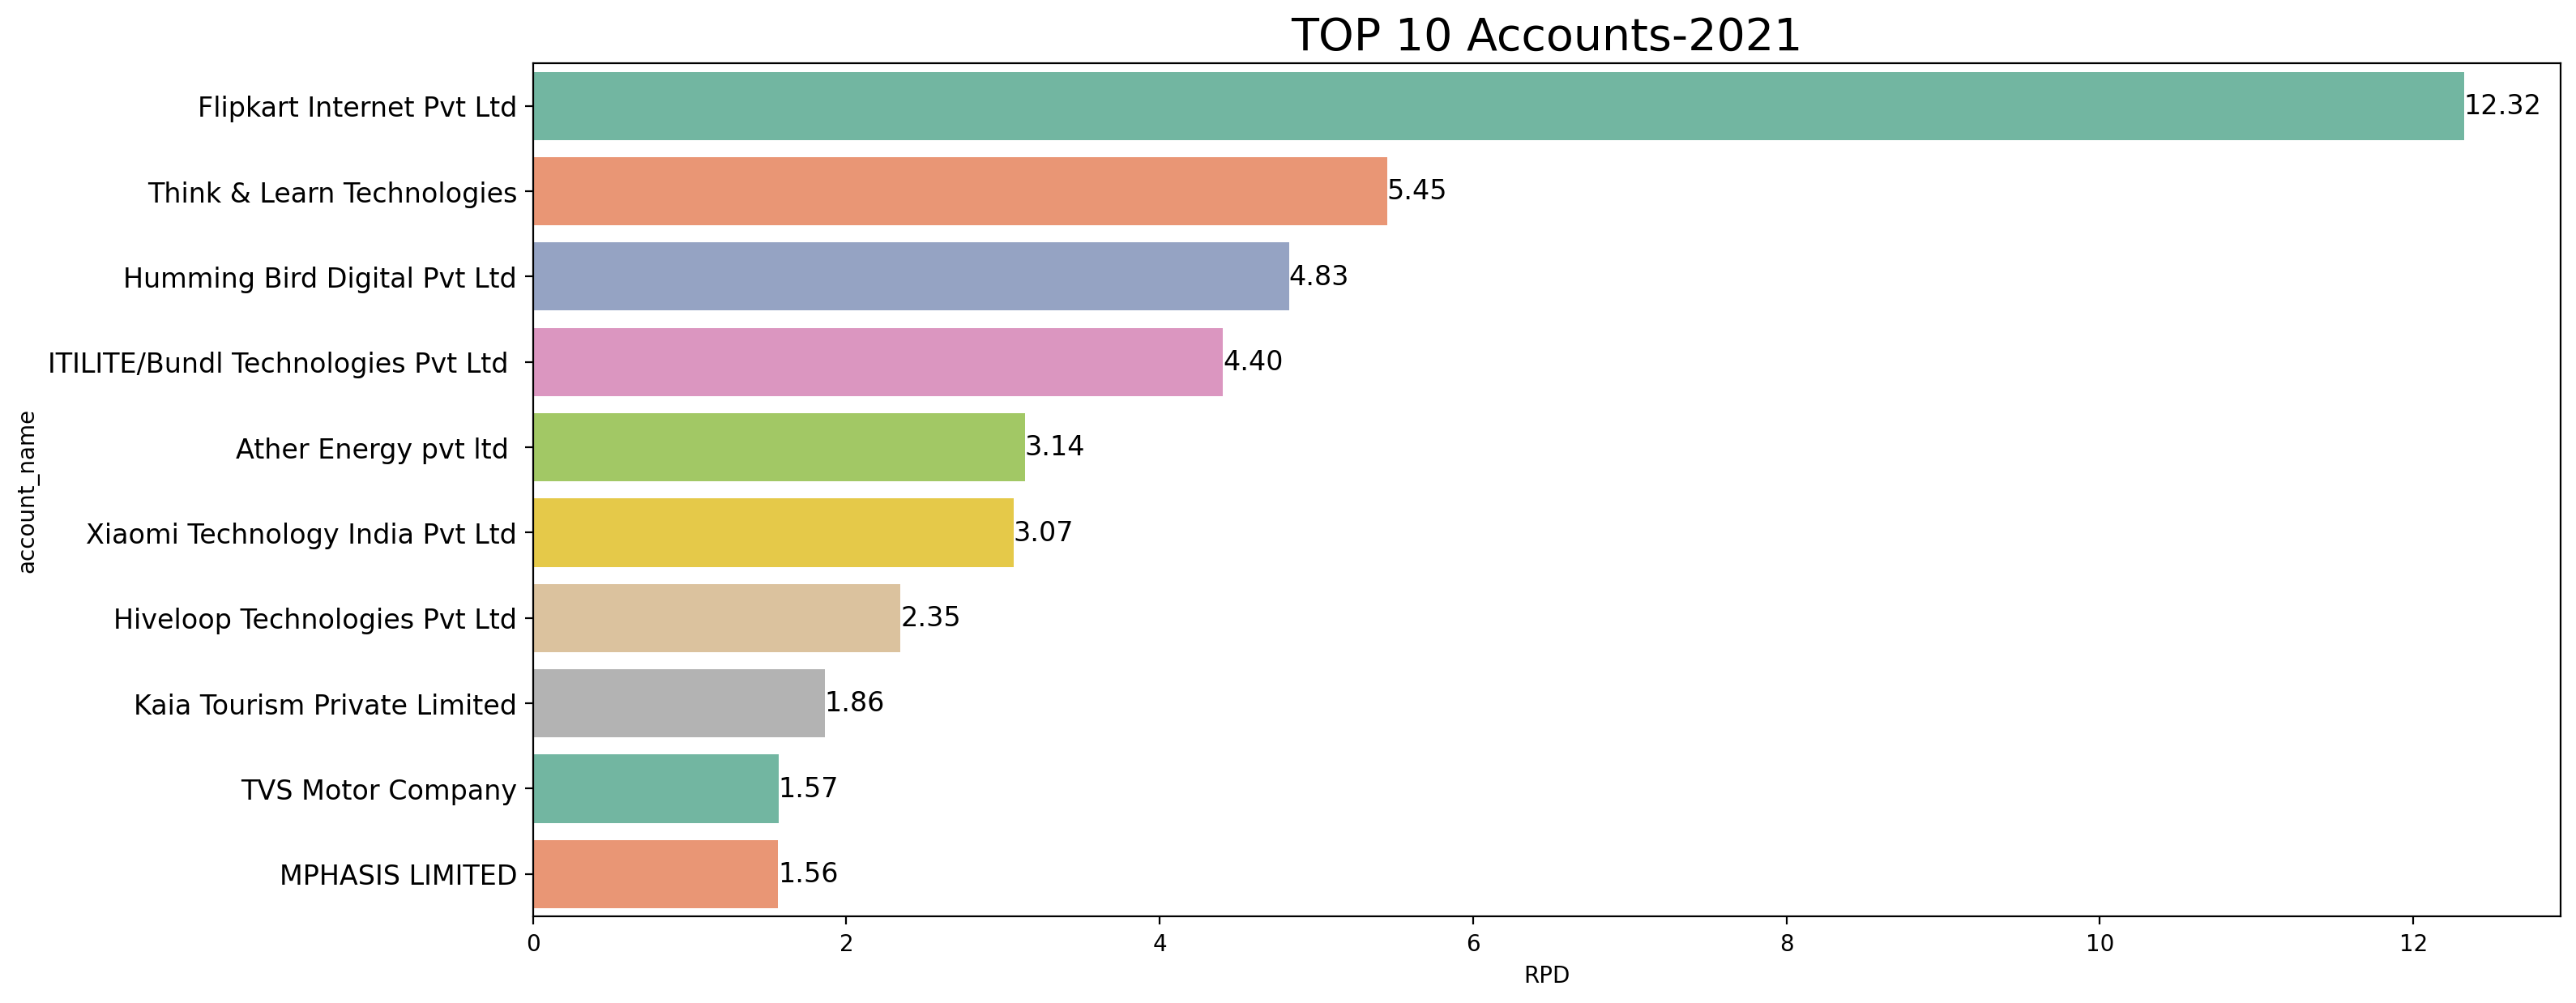

In [ ]:
for i in df['year'].unique():
    df1 = top_10_rpd[top_10_rpd['year']==i]

    figure,ax = plt.subplots(figsize=(16,6),dpi=(200))

    sns.barplot(ax=ax,data=df1,y='account_name',x='RPD',palette='Set2')

    ax.bar_label(ax.containers[0],fmt='%.2f',fontsize=12)
    ax.set_yticklabels(ax.get_yticklabels(),fontsize=12)
    plt.tight_layout()
    plt.title(f'TOP 10 Accounts-{i}',fontsize=20)

'Flipkart Internet Pvt Ltd', 'Humming Bird Digital Pvt Ltd', 'Think & Learn Technologies' are the consistent accounts contributing to the company.

**TOP 10 "account_name" yearwise based on total REVPD:**

In [ ]:
top_10_revpd = accounts.groupby('year').apply(lambda x: x.nlargest(10,'REVPD'))[['account_name','REVPD']].reset_index()

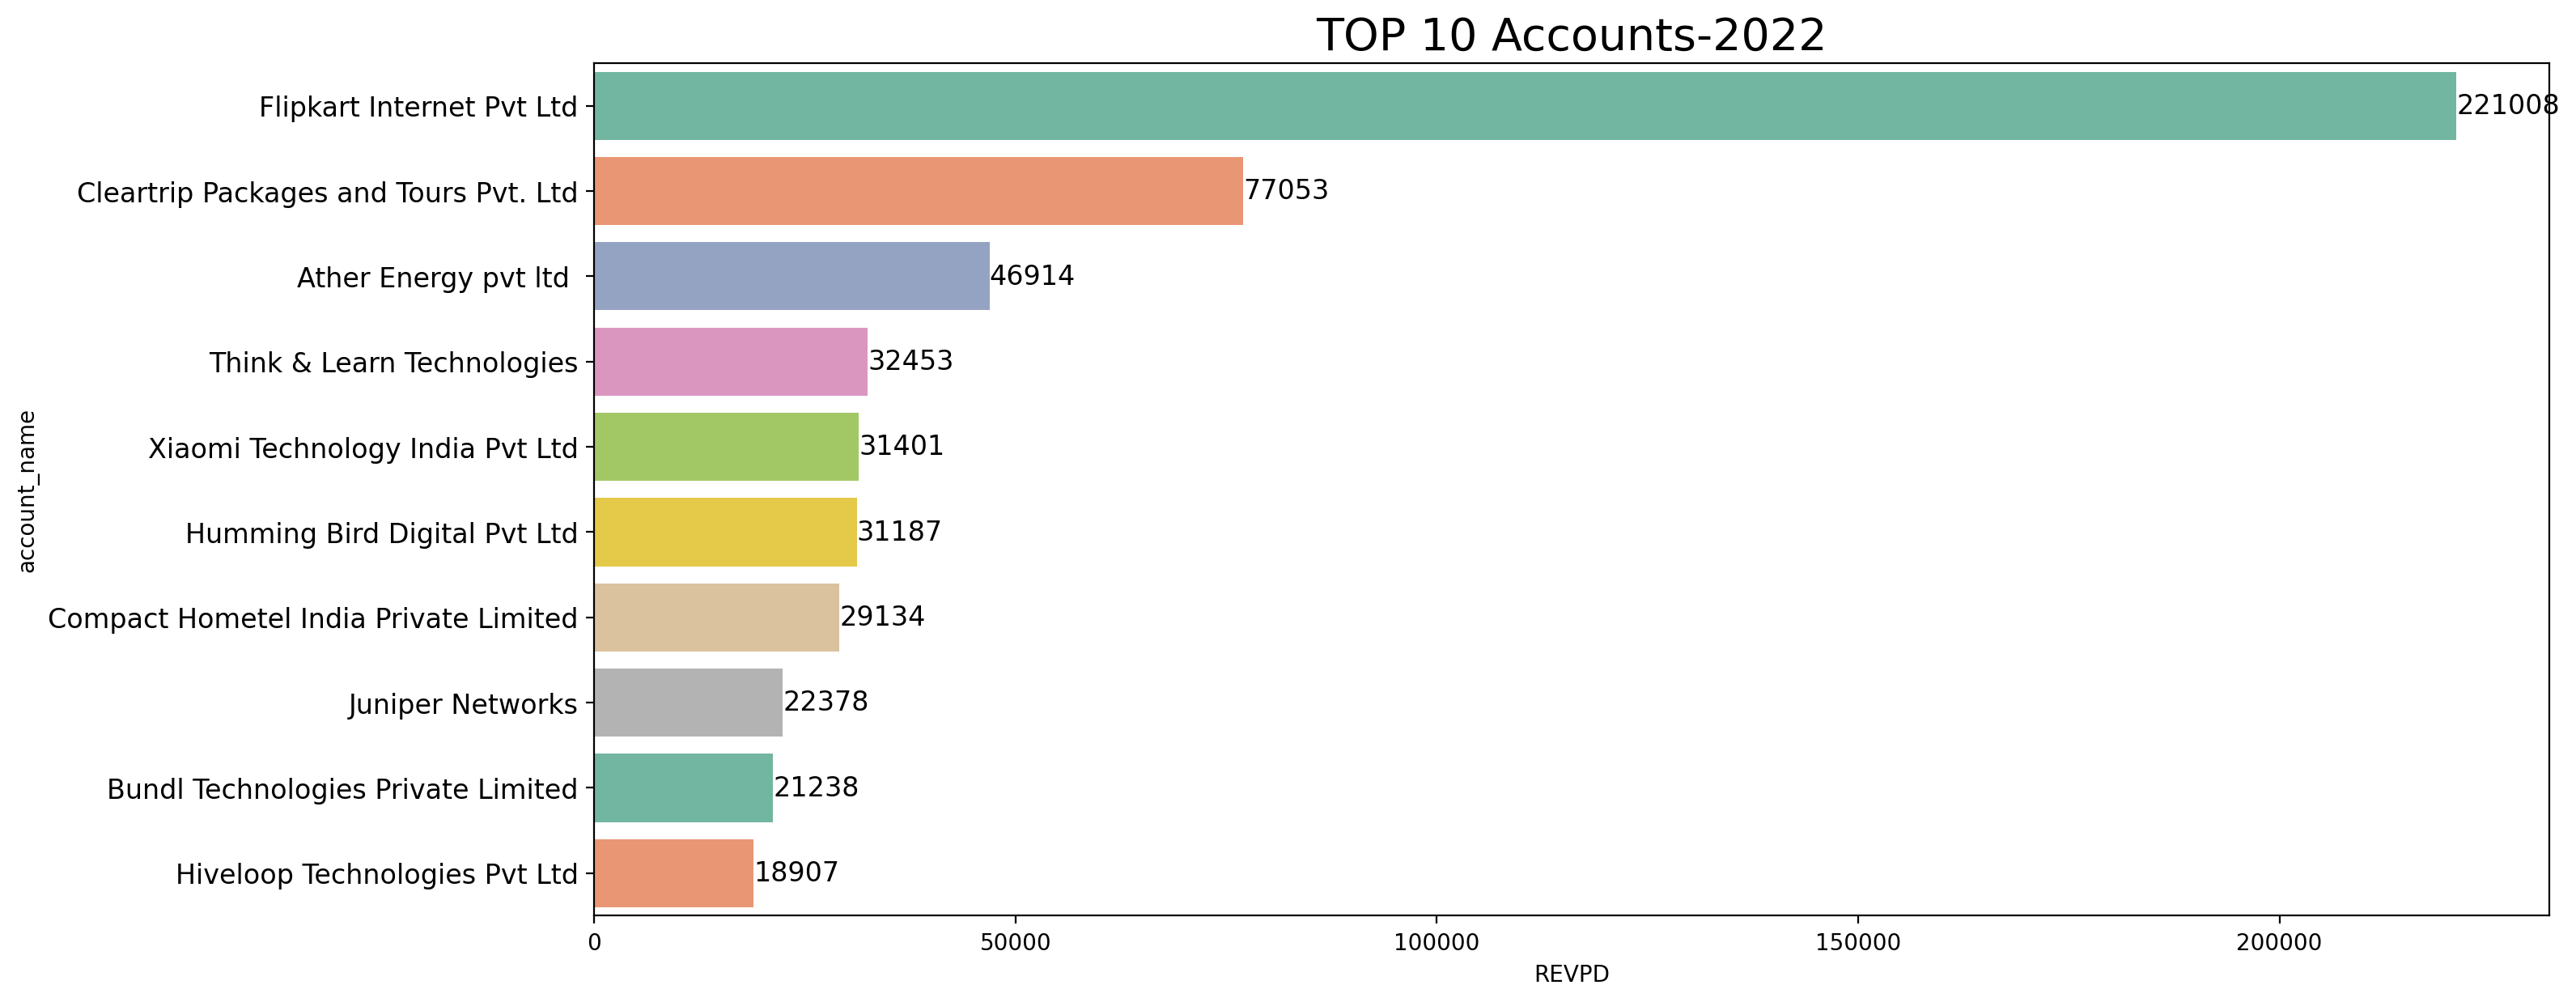

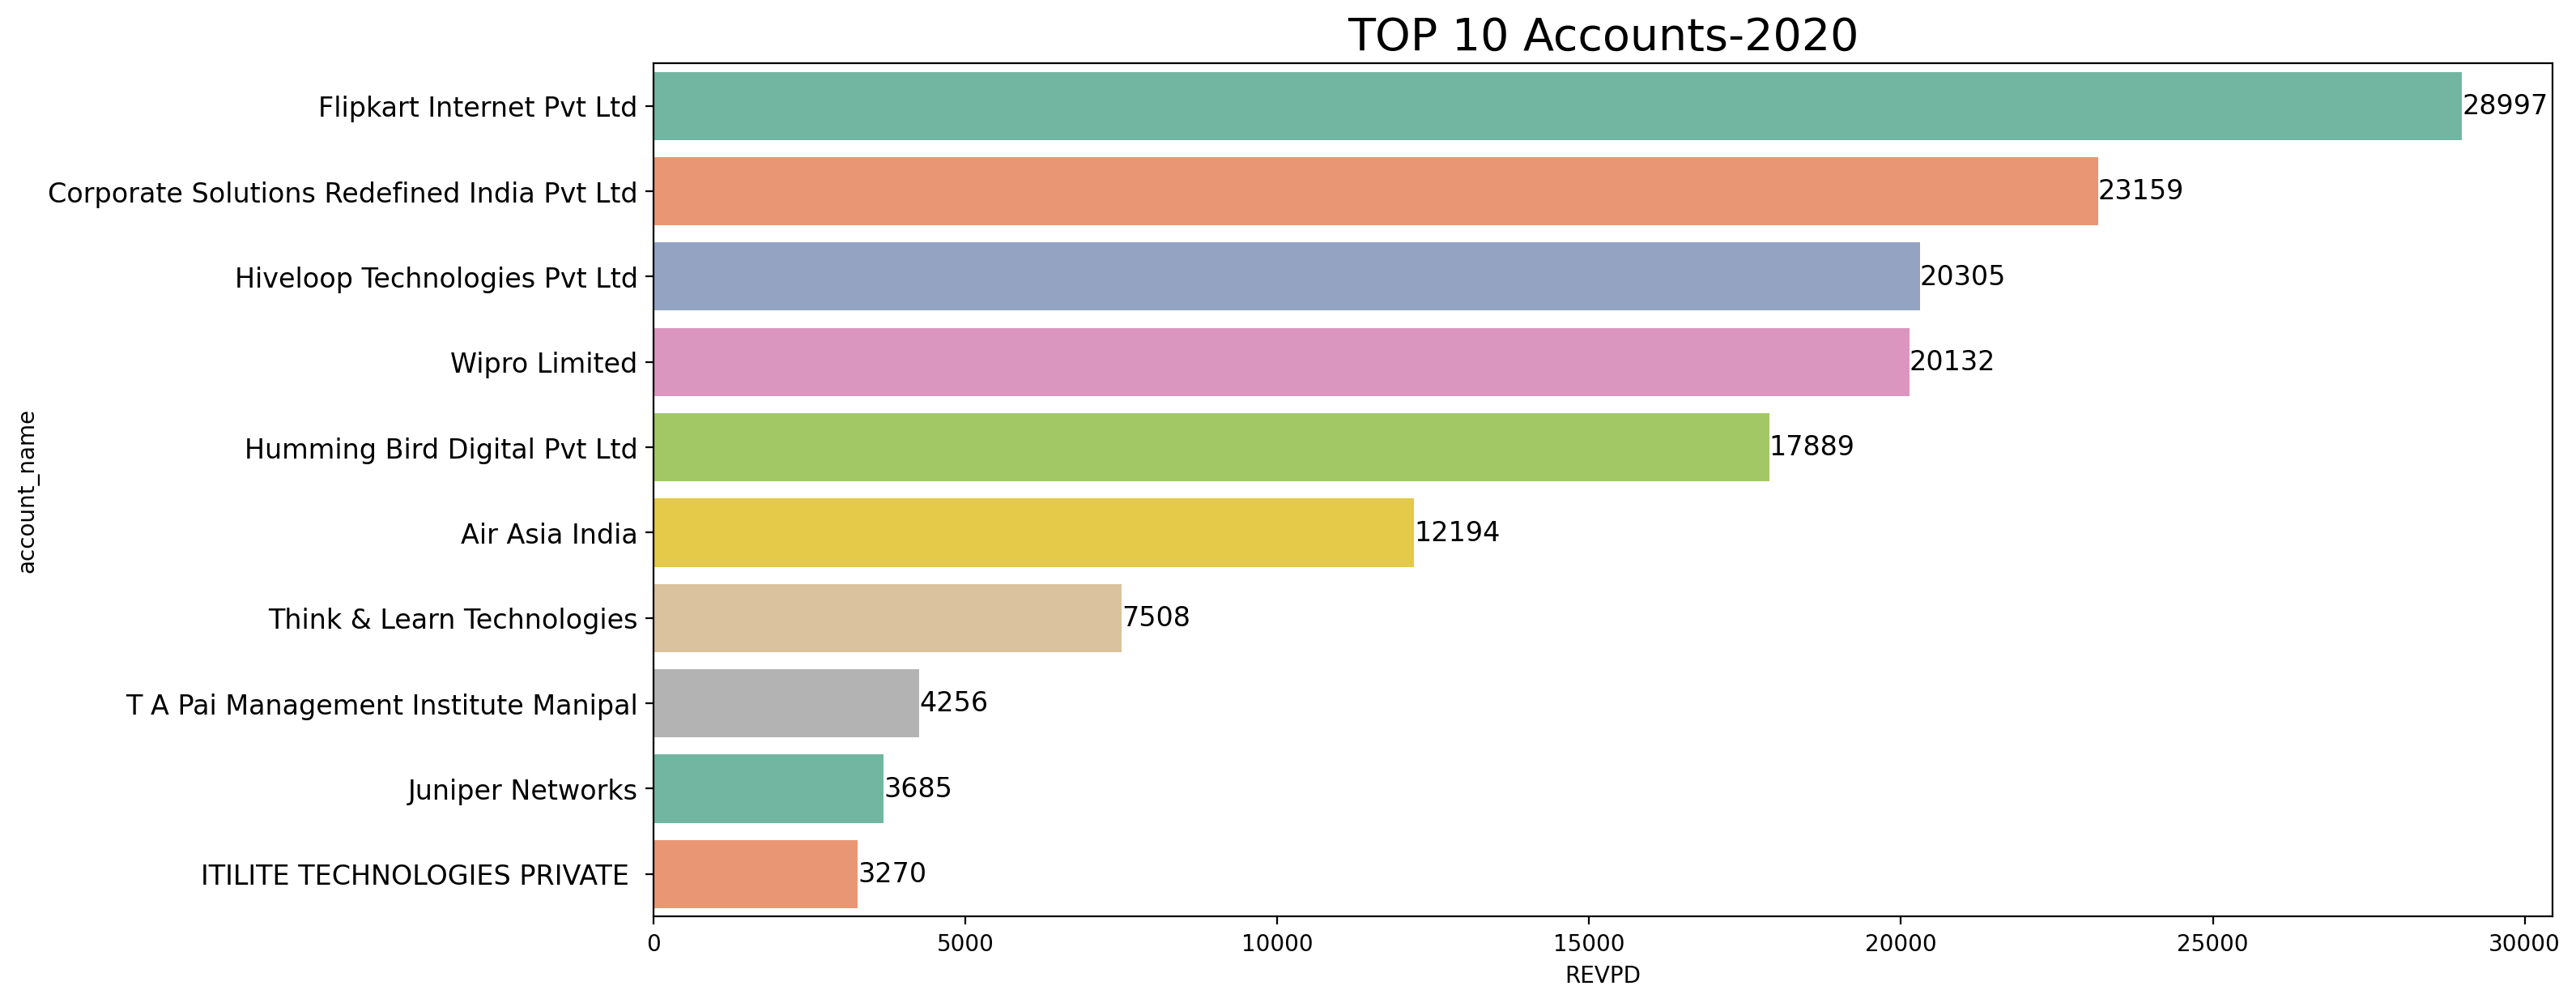

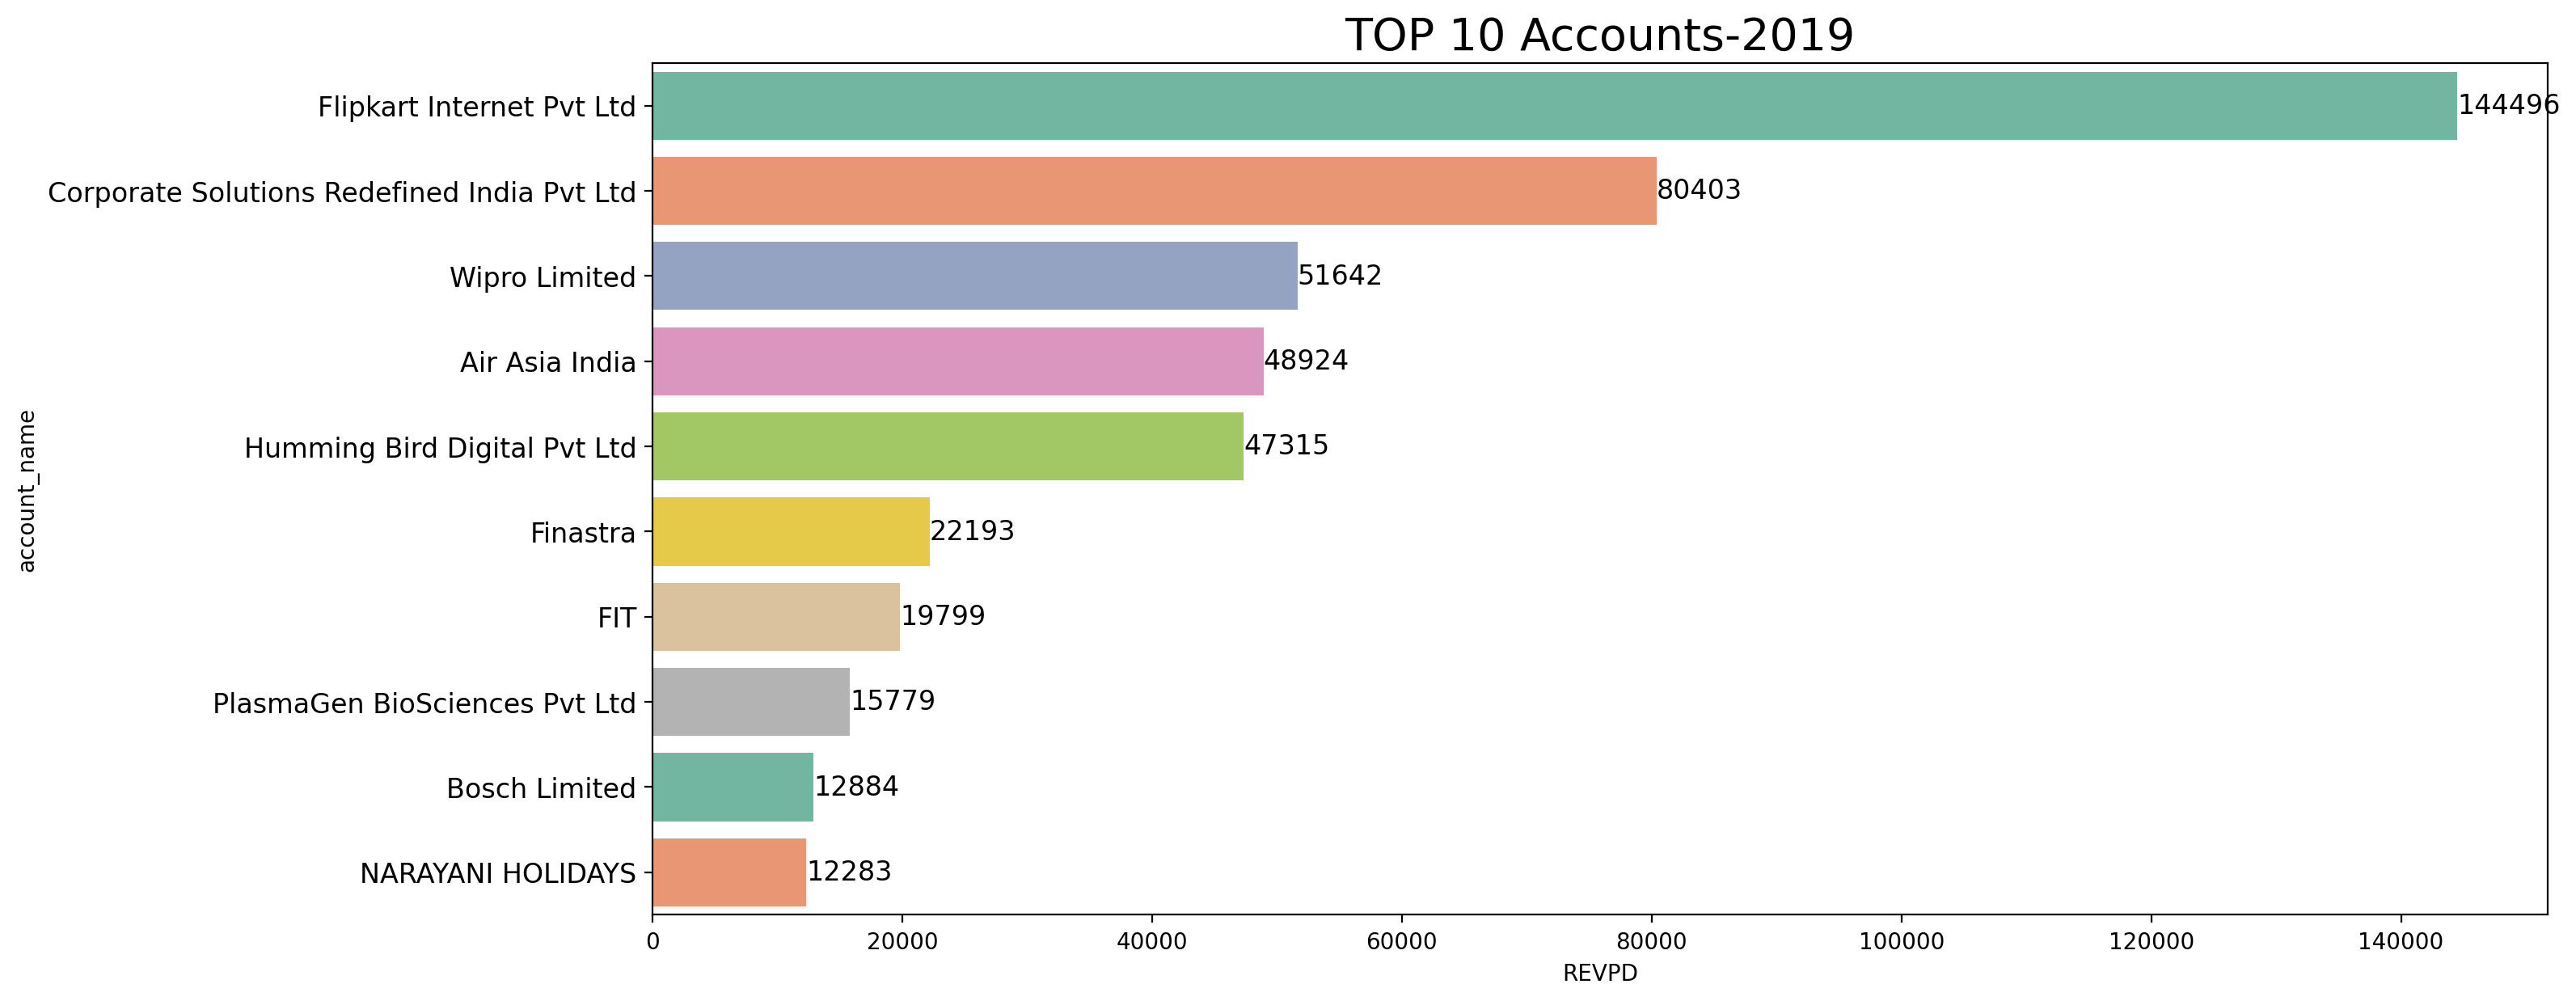

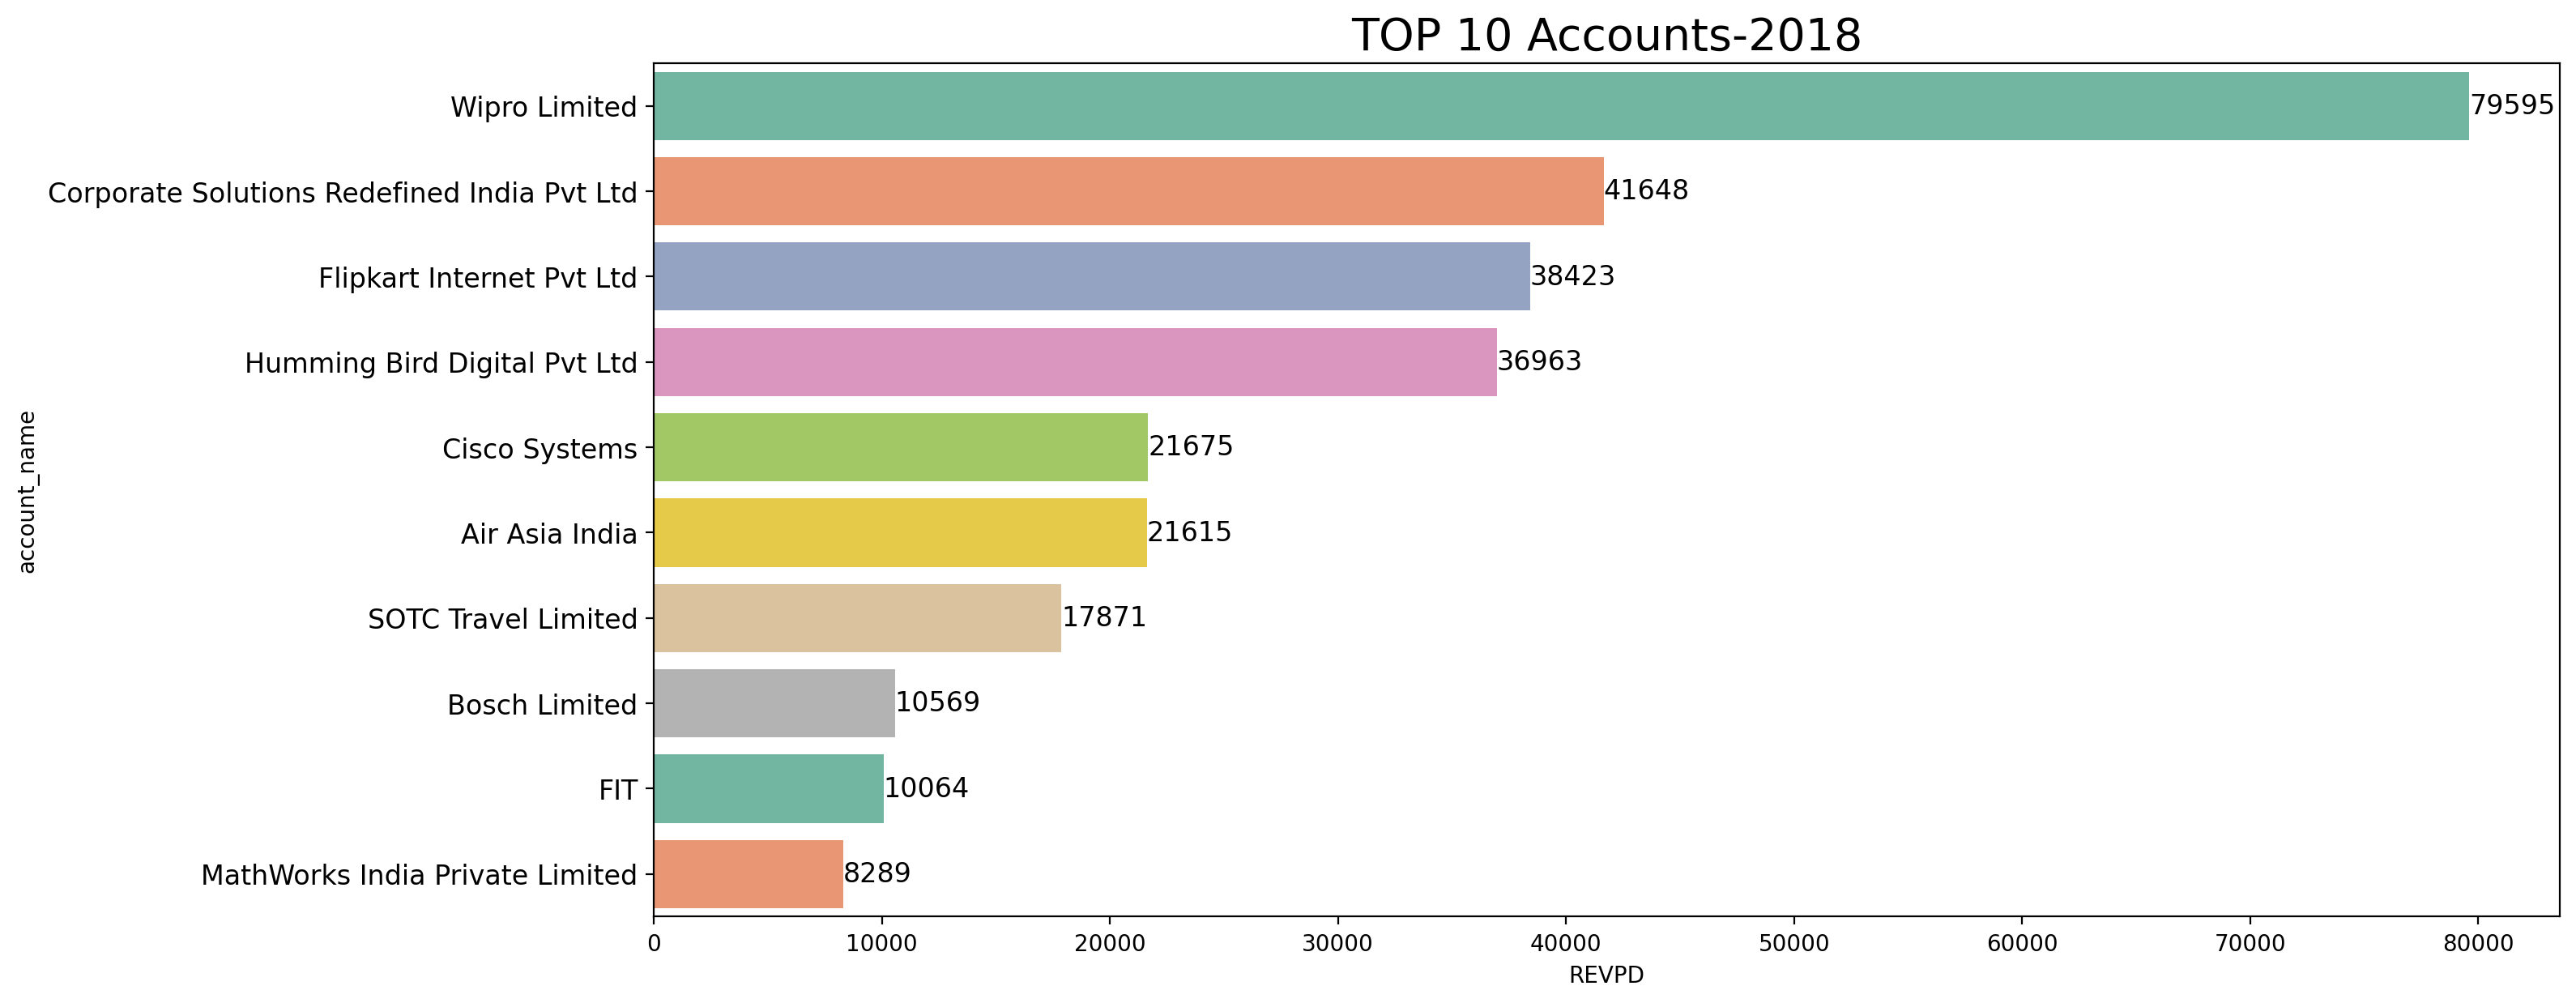

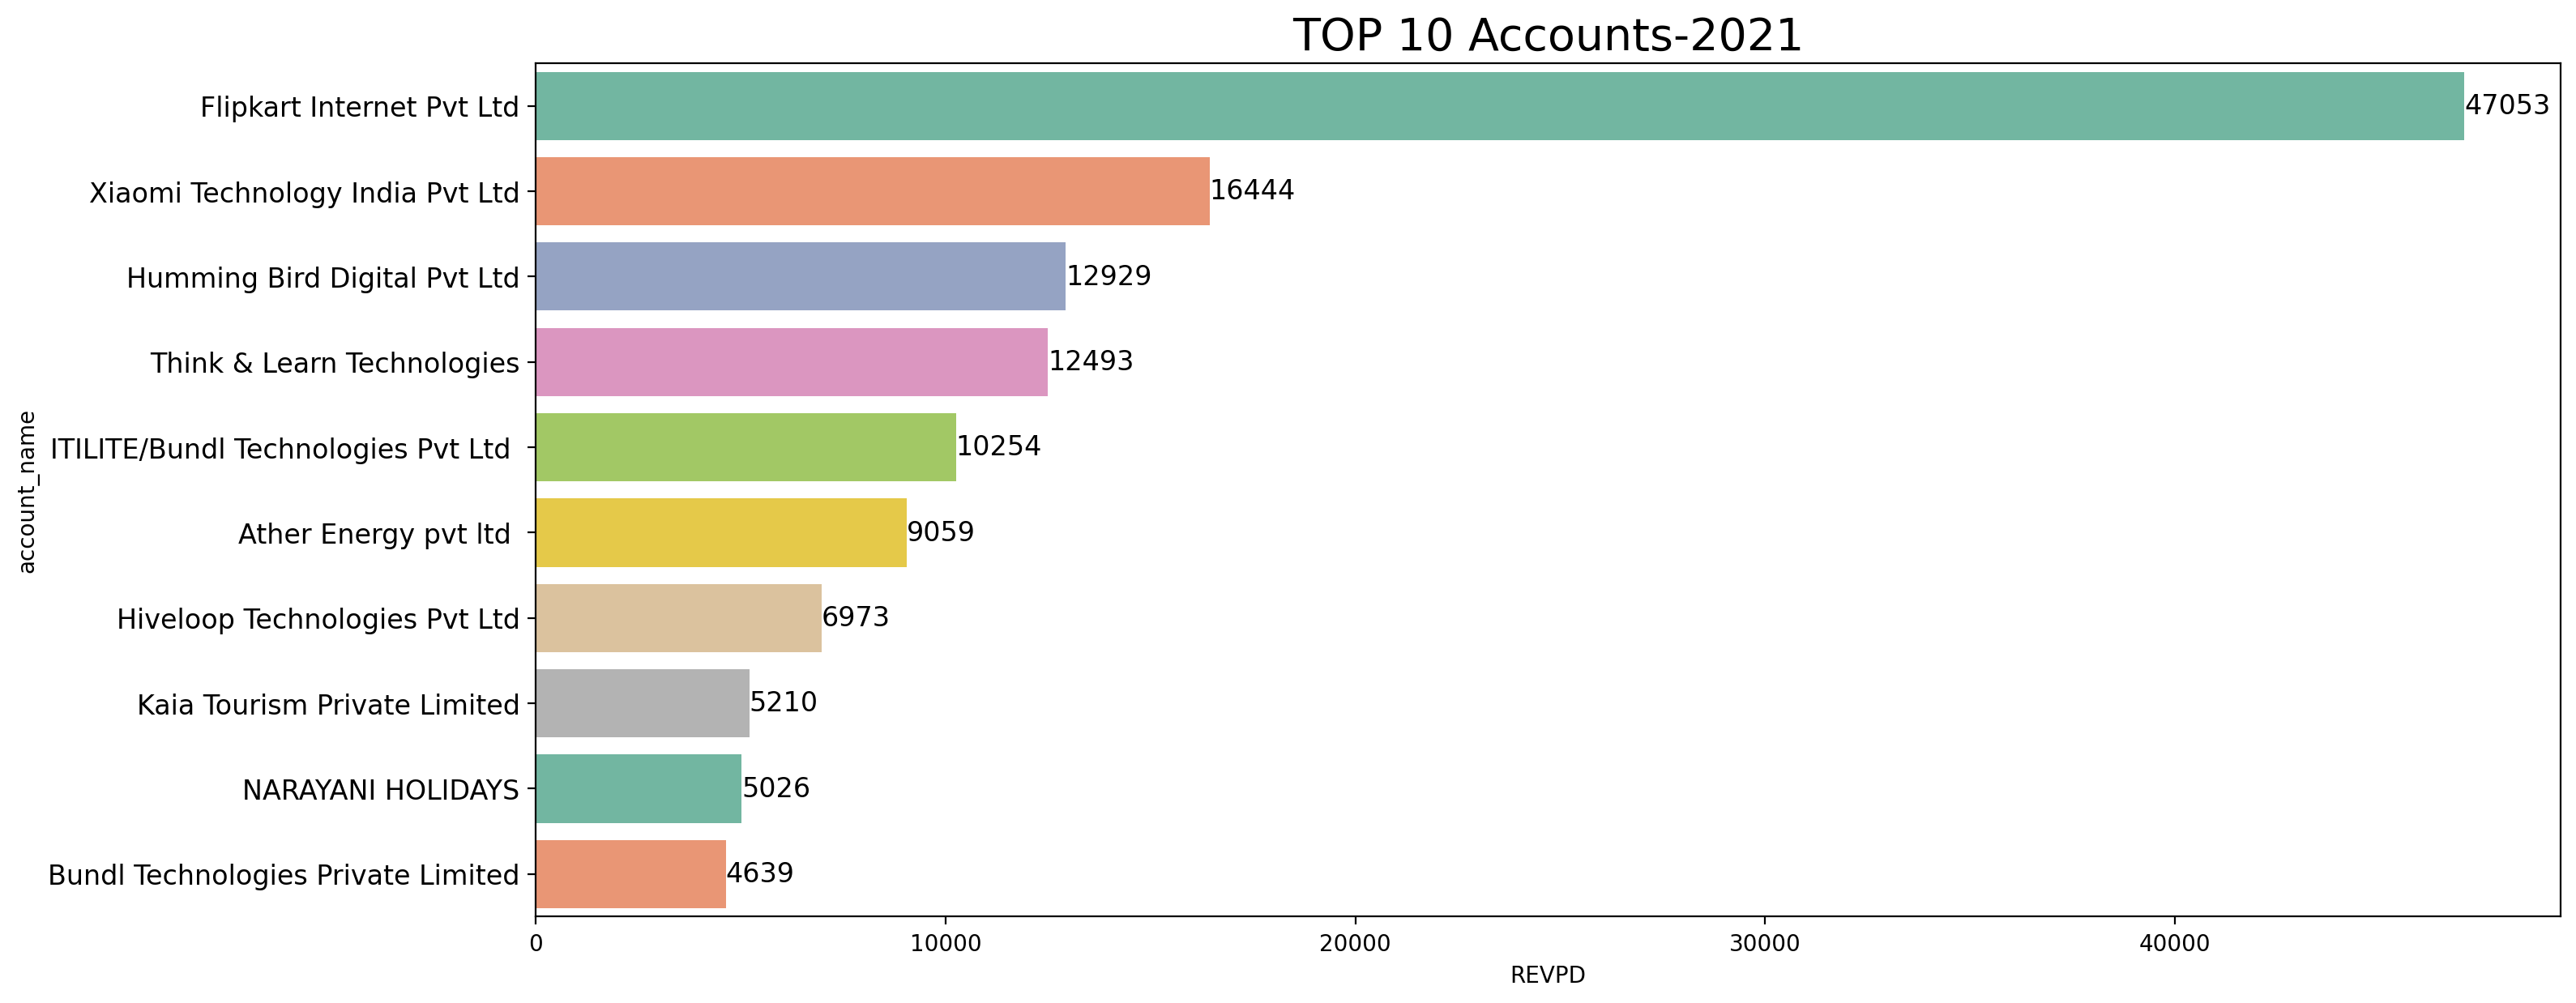

In [ ]:
for i in df['year'].unique():
    df1 = top_10_revpd[top_10_revpd['year']==i]

    plt.figure(figsize=(16,6),dpi=(200))

    ax = sns.barplot(data=df1,y='account_name',x='REVPD',palette='Set2')

    ax.bar_label(ax.containers[0],fmt='%.0f',fontsize=12)
    ax.set_yticklabels(ax.get_yticklabels(),fontsize=12)
    plt.tight_layout()
    plt.title(f'TOP 10 Accounts-{i}',fontsize=20)


In [ ]:
hotels = df.groupby(['year','hotel_name'])[['RPD','REVPD']].sum().reset_index()

**TOP 10 "Hotels" yearwise based on RPD**

In [ ]:
Top_10_rpd = hotels.groupby('year').apply(lambda x: x.nlargest(10,'RPD'))[['hotel_name','RPD']].reset_index()

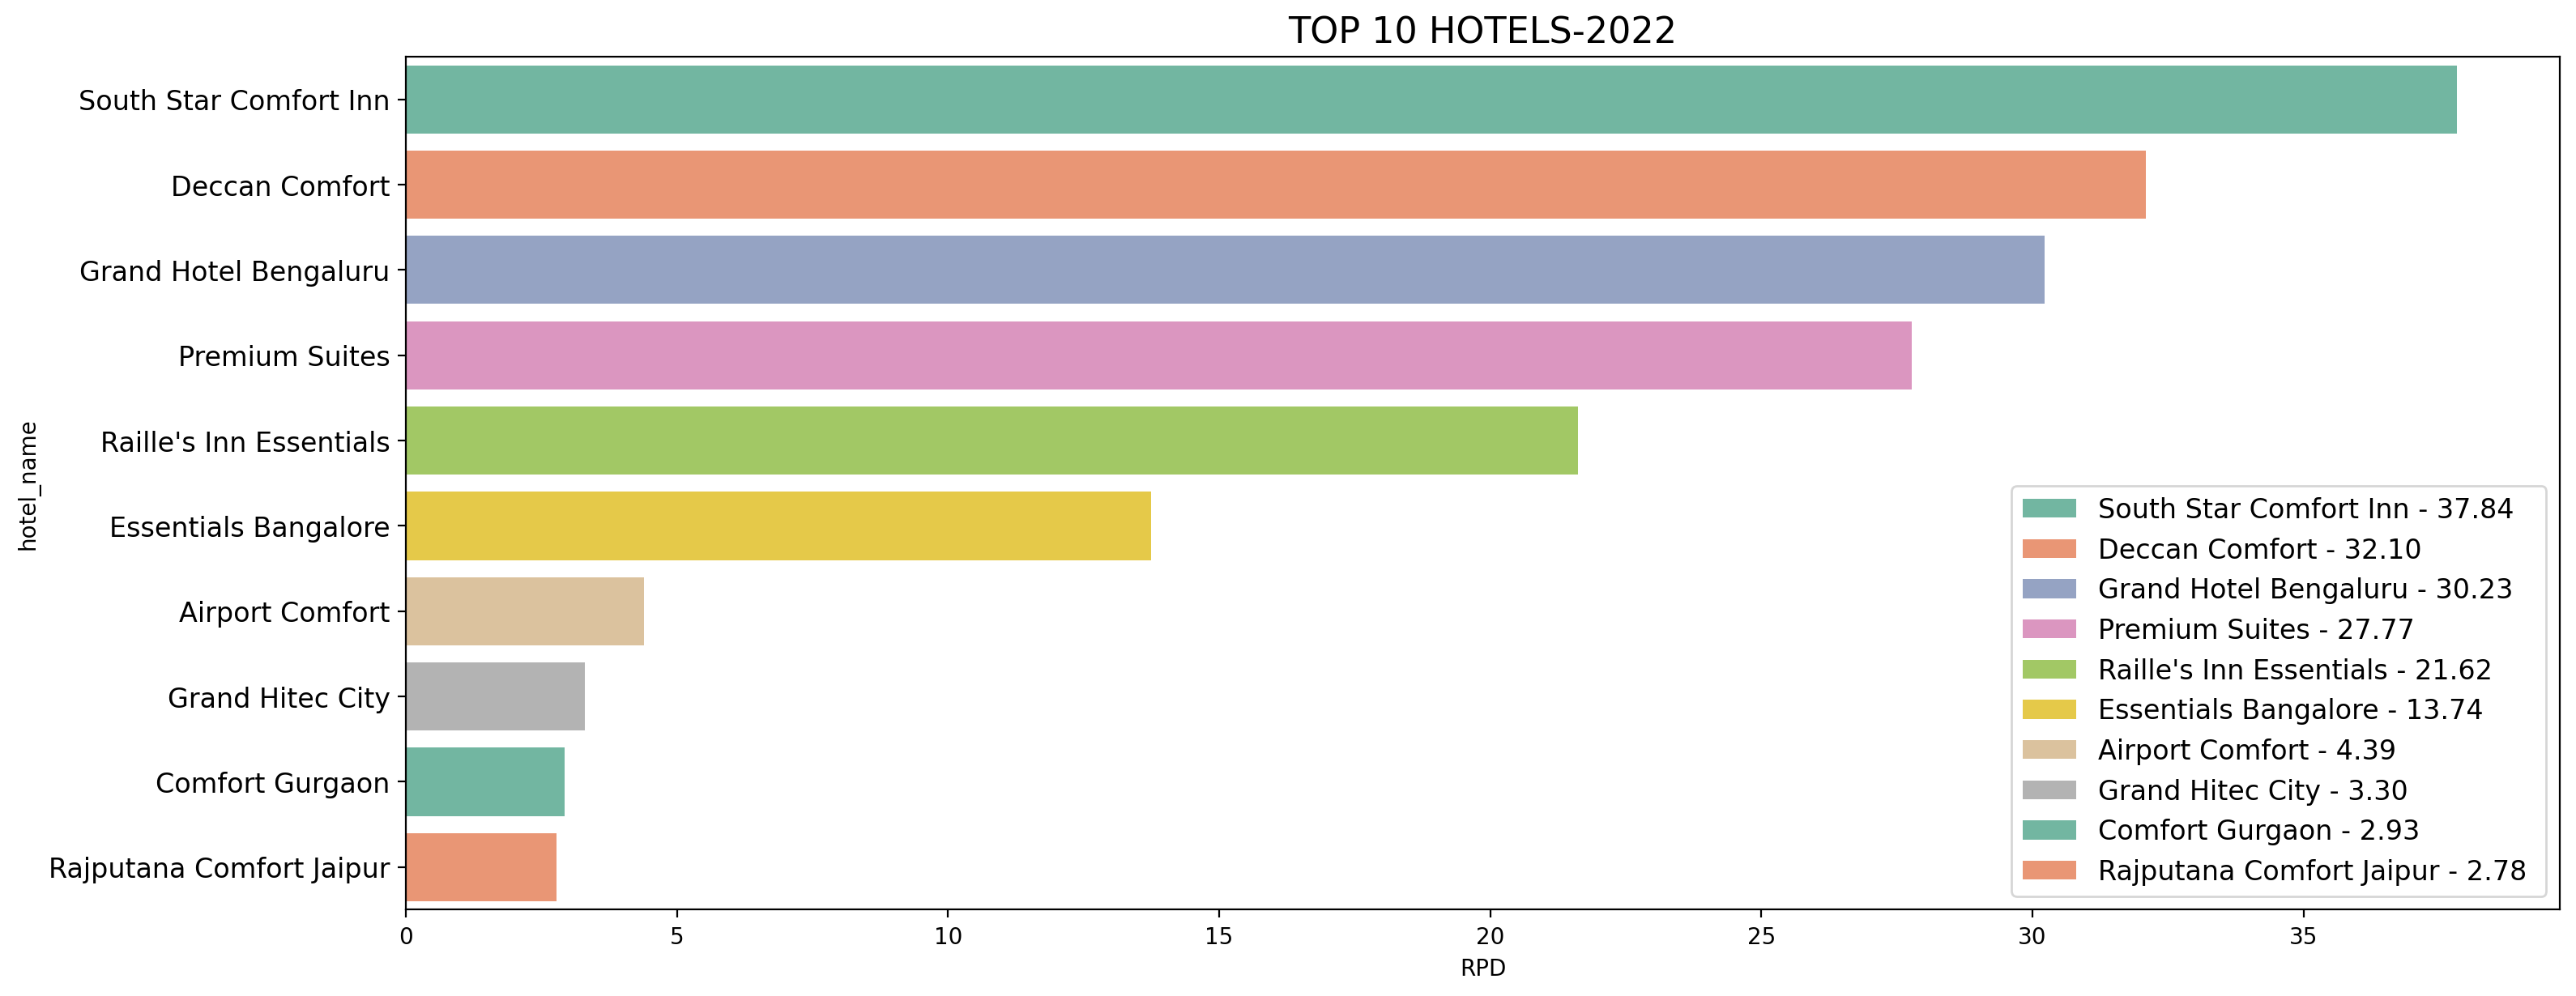

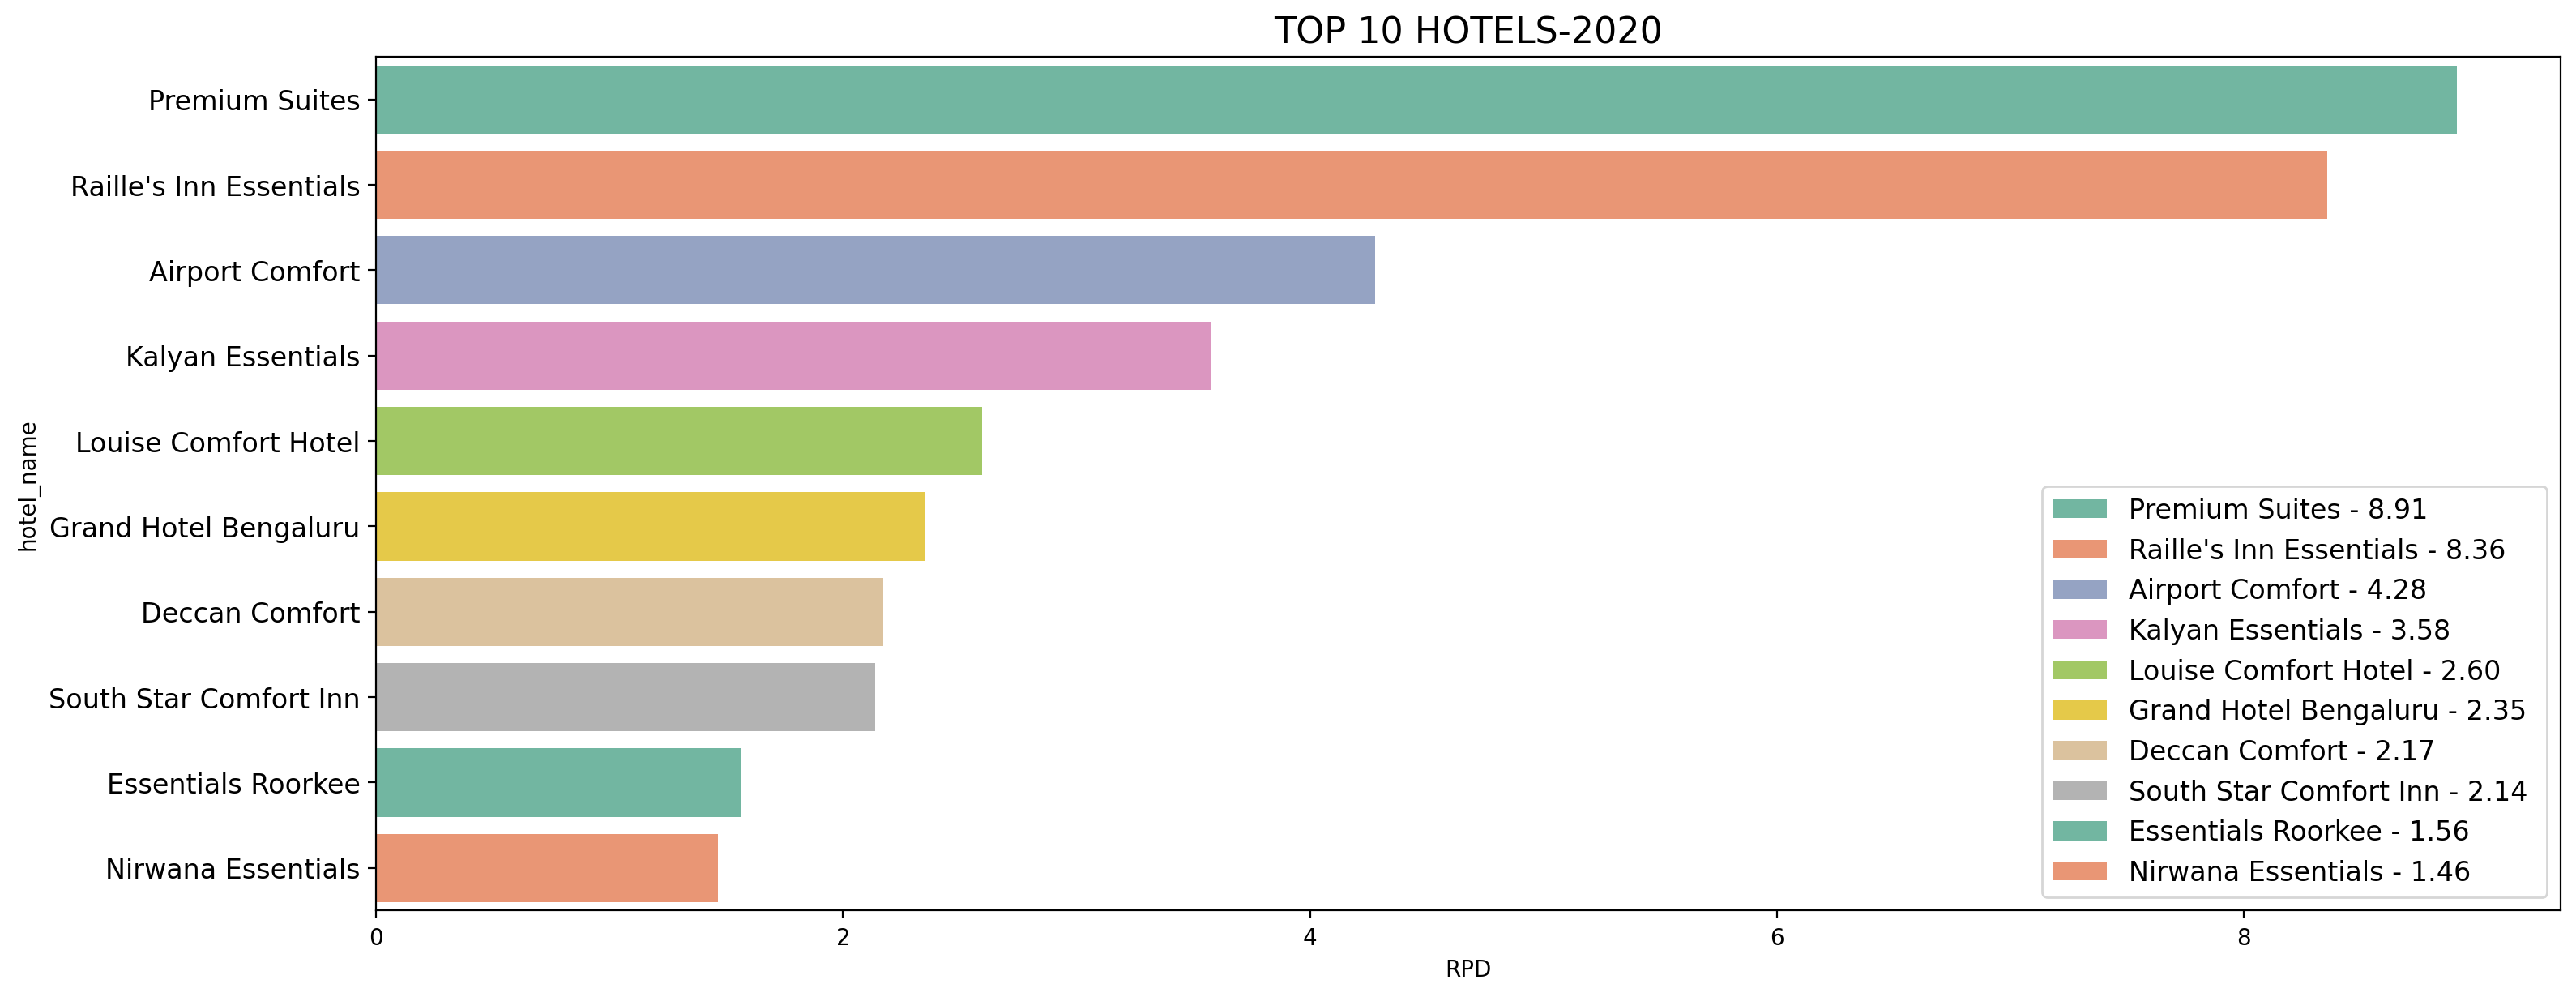

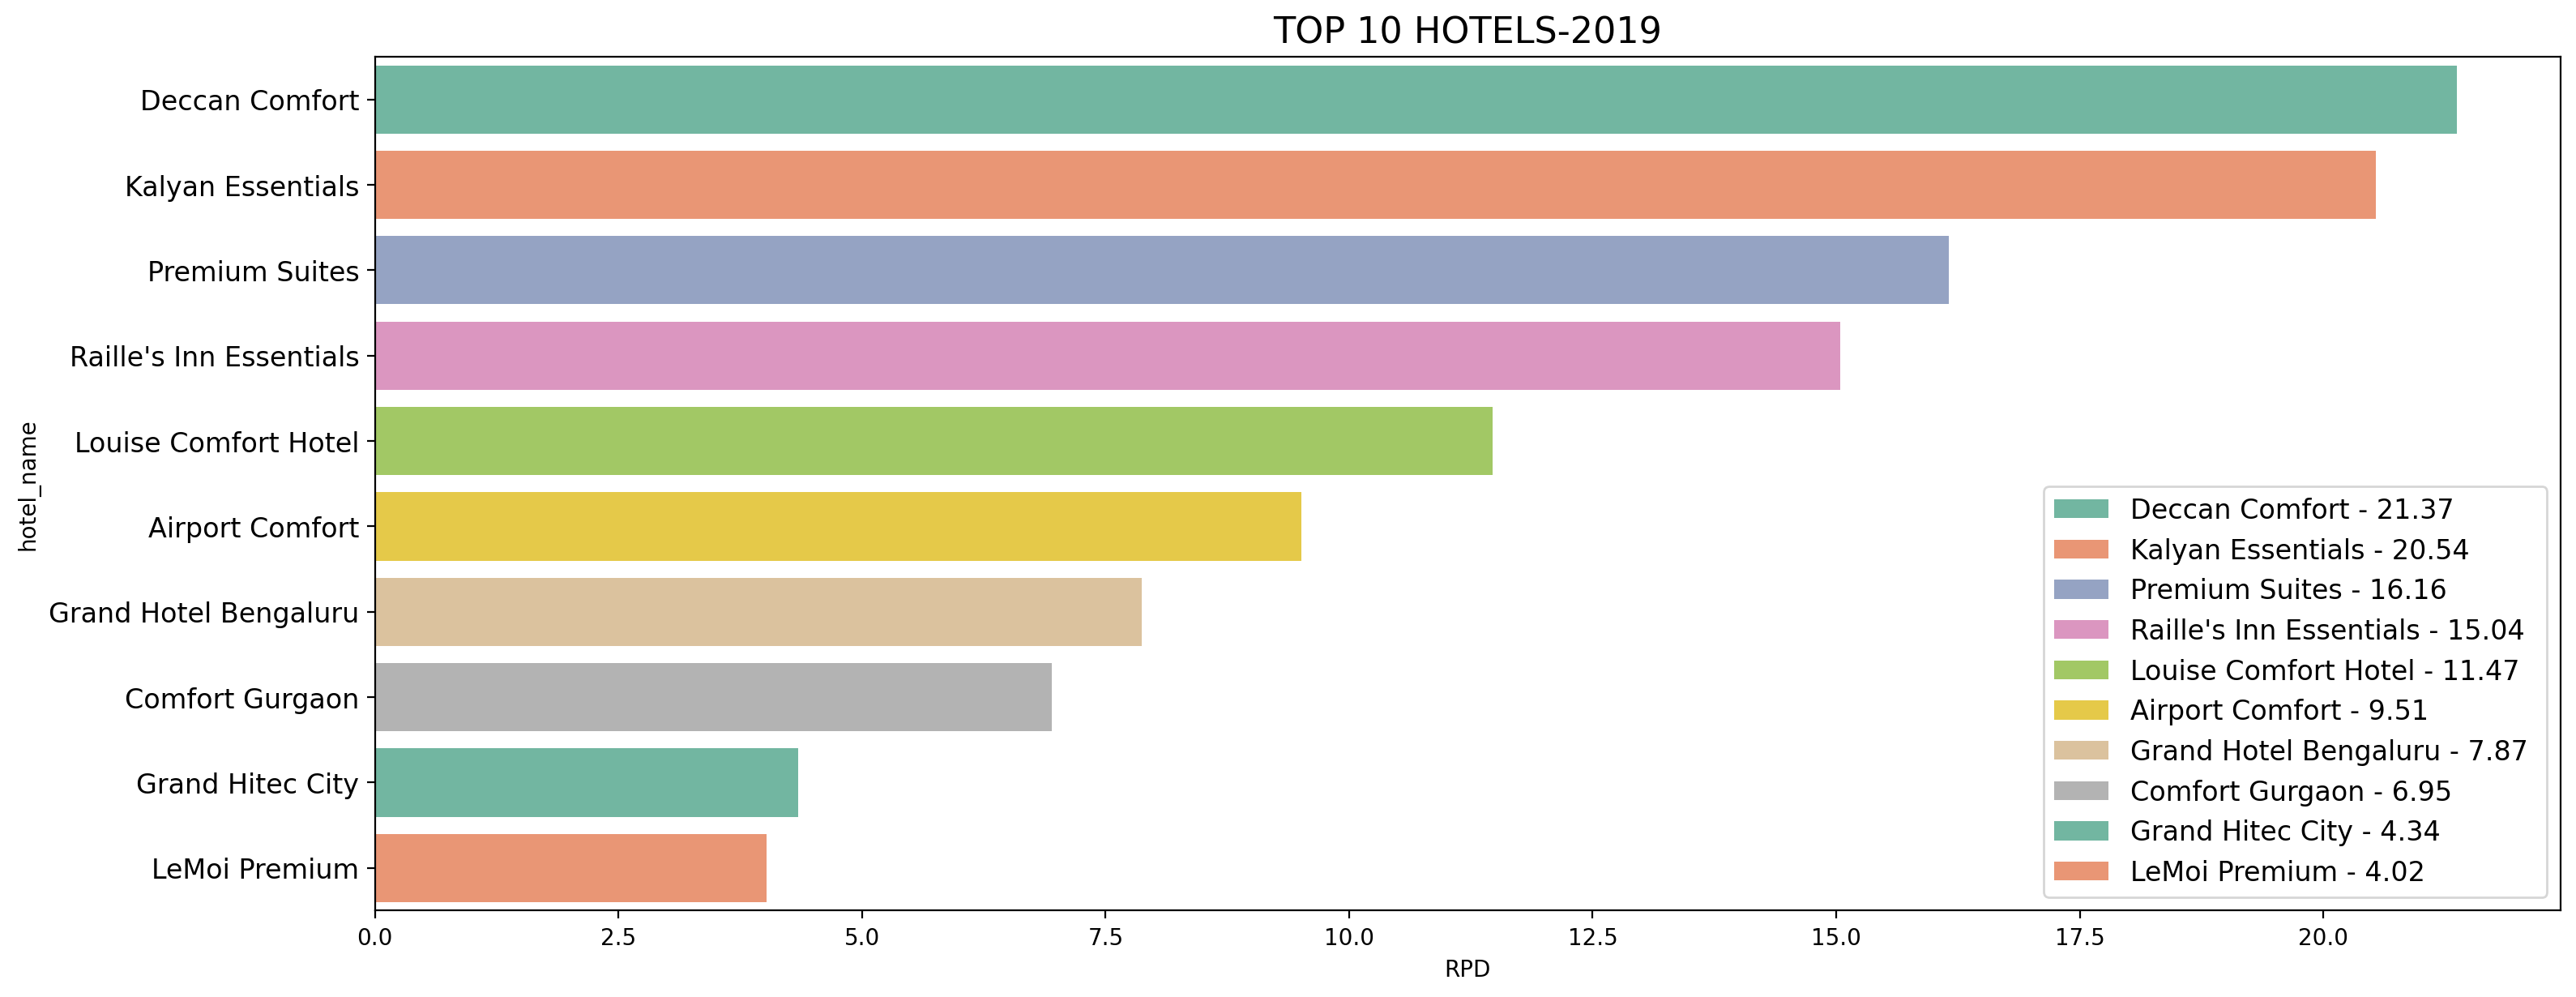

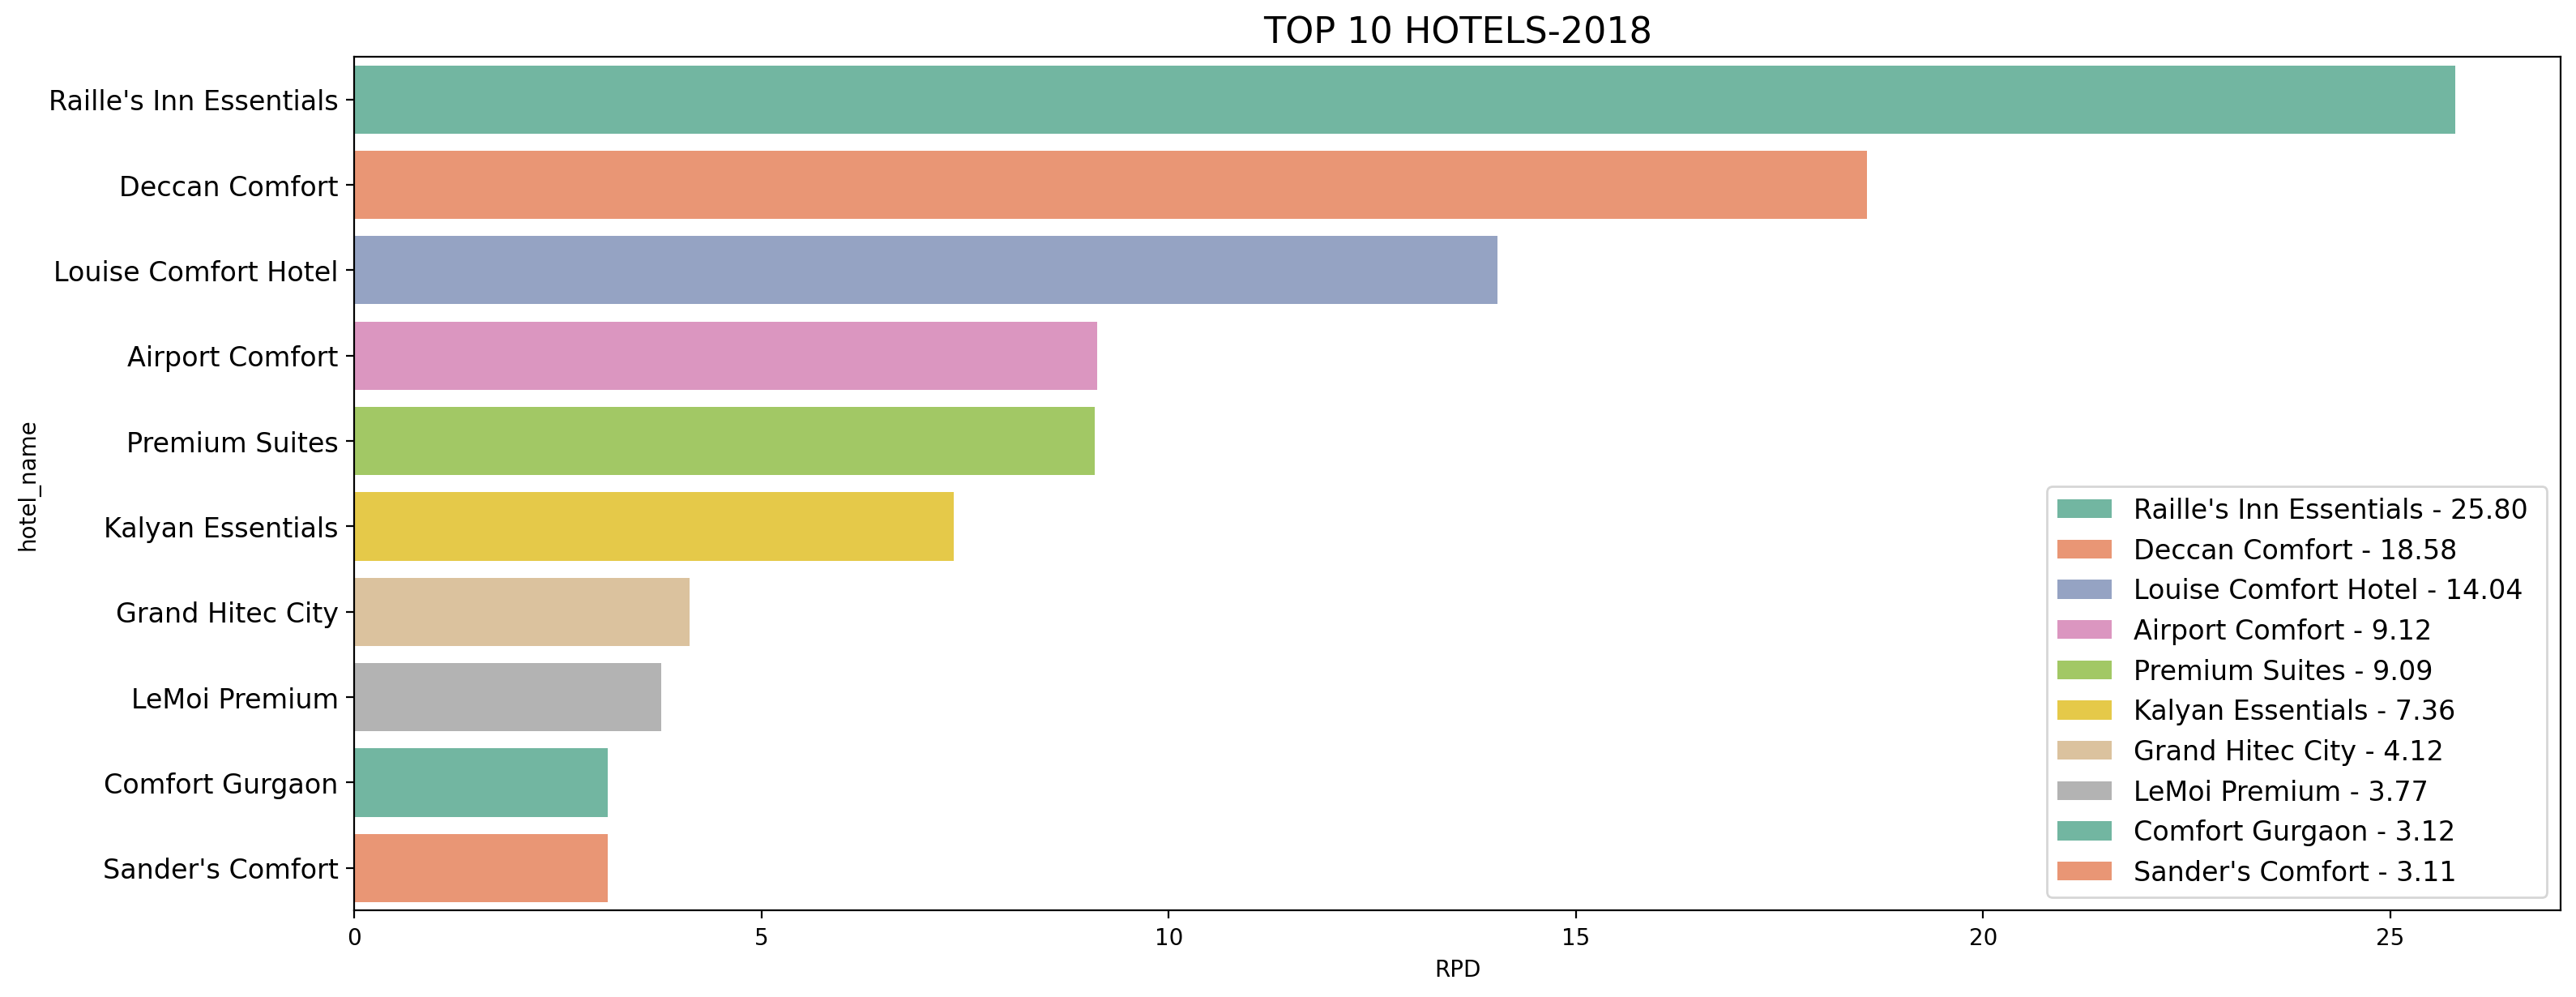

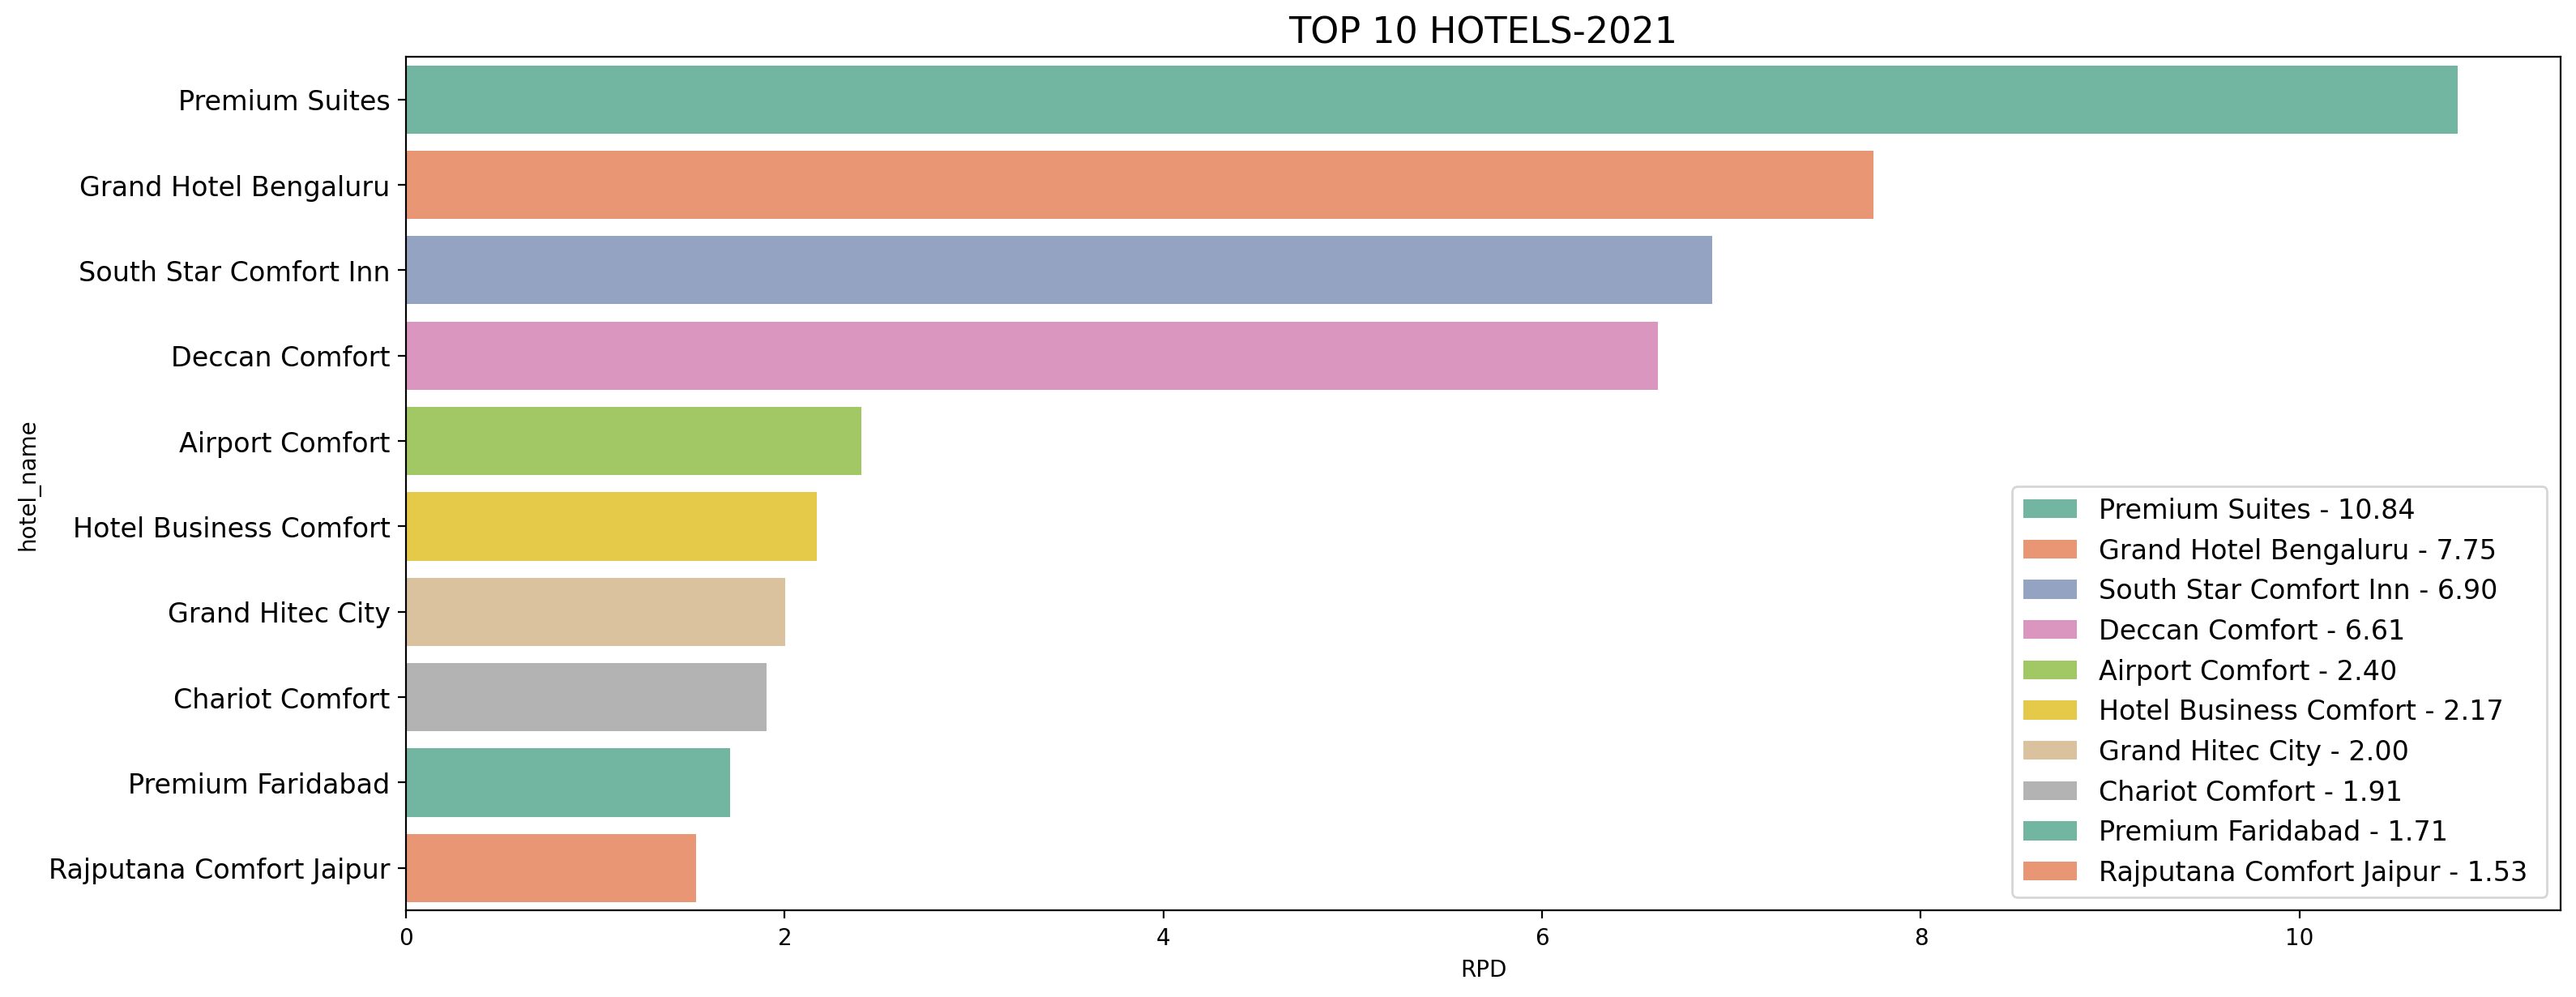

In [ ]:
for i in df['year'].unique():
    df1 = Top_10_rpd[Top_10_rpd['year']==i]

    plt.figure(figsize=(16,6),dpi=(200))

    rpd_label = ['{0} - {1:0.2f} '.format(i,j) for i,j in zip(df1['hotel_name'], df1['RPD'])]
    ax = sns.barplot(data=df1,y='hotel_name',x='RPD',hue=rpd_label,dodge=None,palette='Set2')

    ax.set_yticklabels(ax.get_yticklabels(),fontsize=12)
    ax.legend(loc='best',fontsize=12)
    plt.tight_layout()
    plt.title(f'TOP 10 HOTELS-{i}',fontsize=16)


'Deccan Comfort', 'Premium Suites', 'South Star Comfort Inn' are the top performing hotels from the past few years.

**TOP 10 "Hotels" yearwise based on REVPD**

In [ ]:
Top_10_revpd = hotels.groupby('year').apply(lambda x: x.nlargest(10,'REVPD'))[['hotel_name','REVPD']].reset_index()

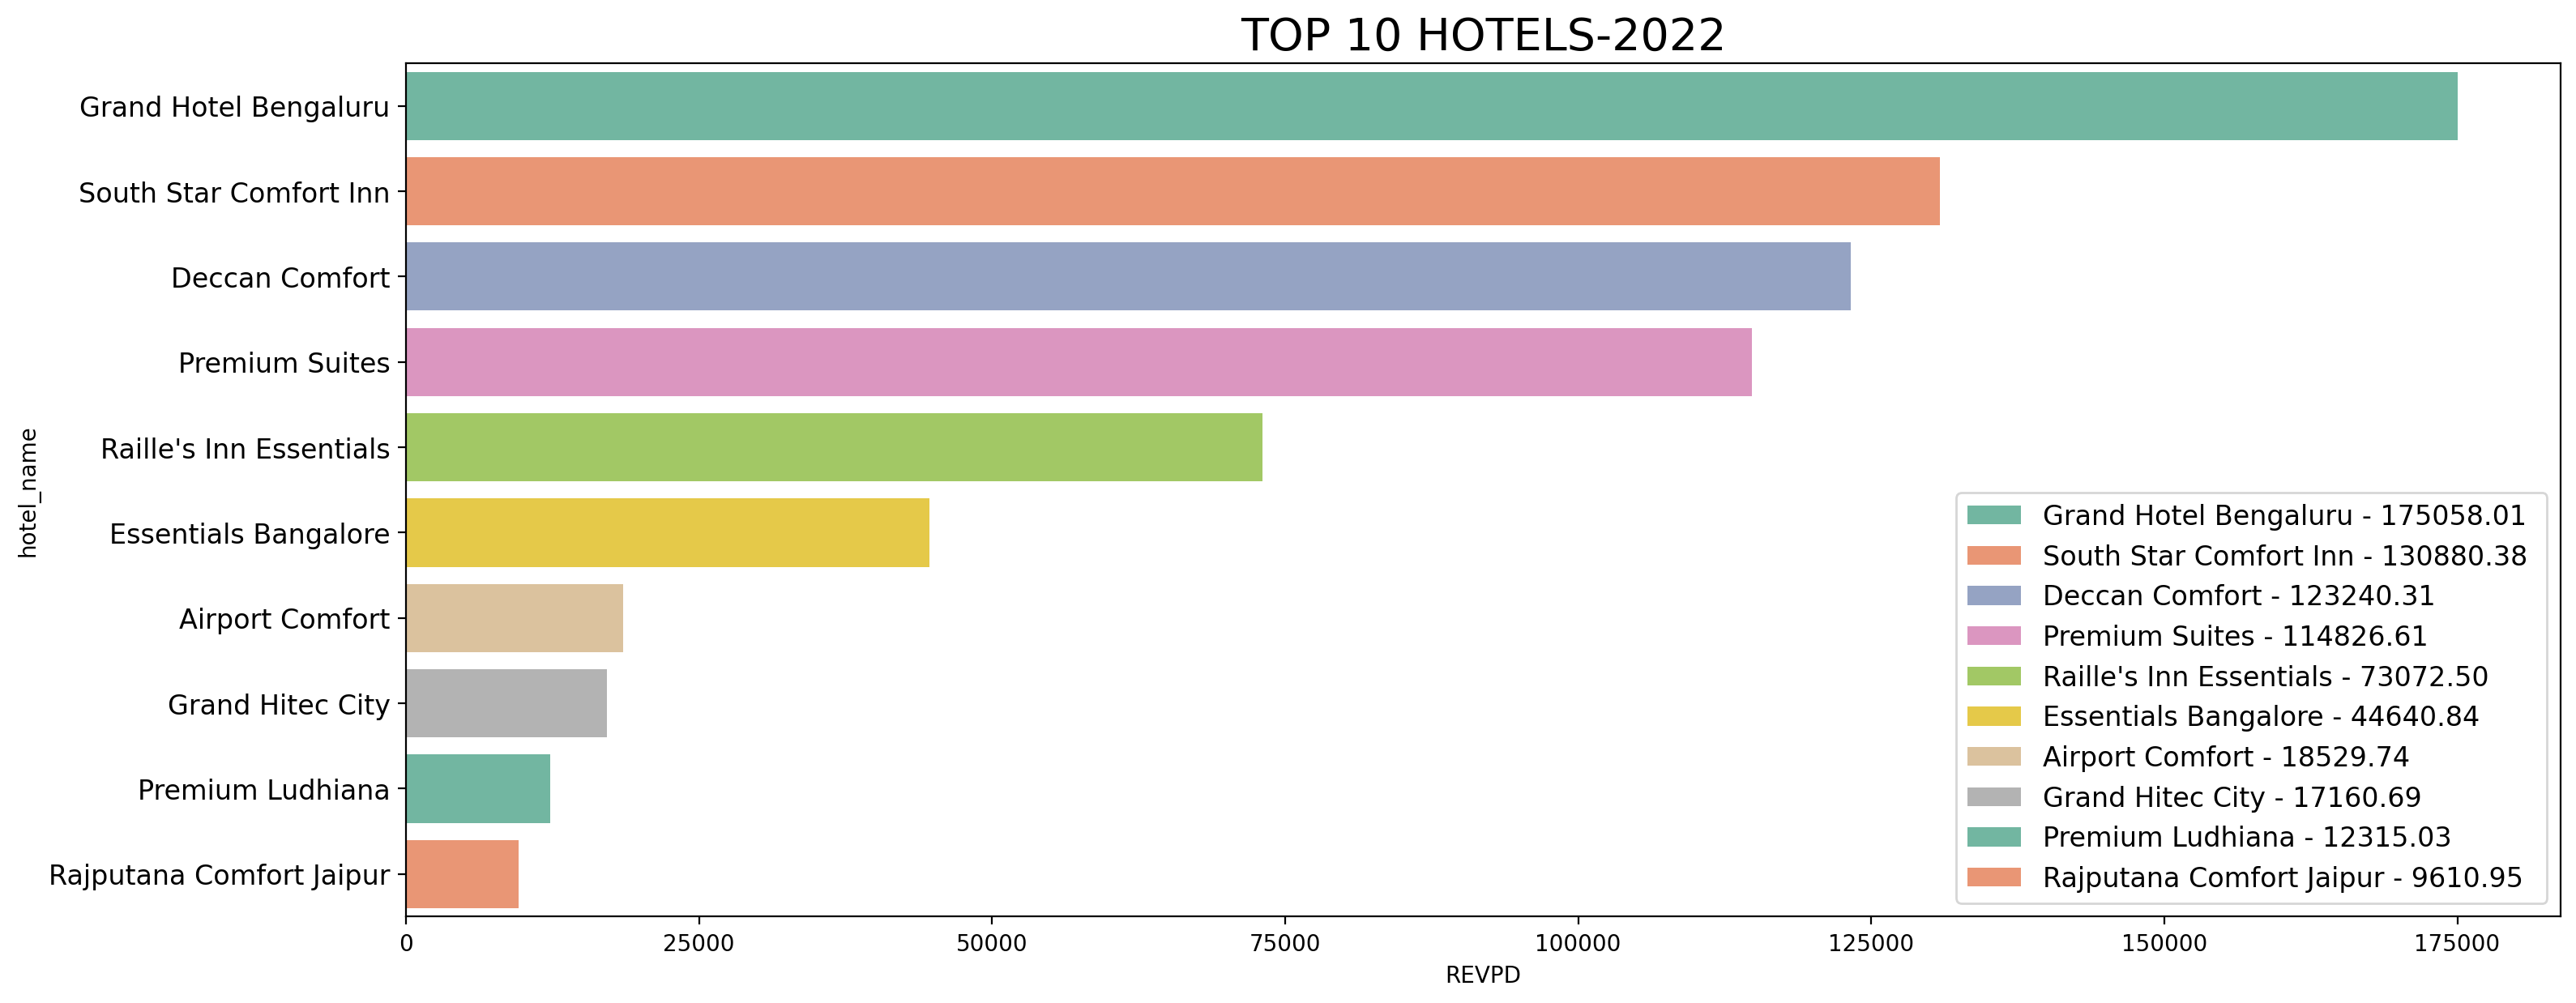

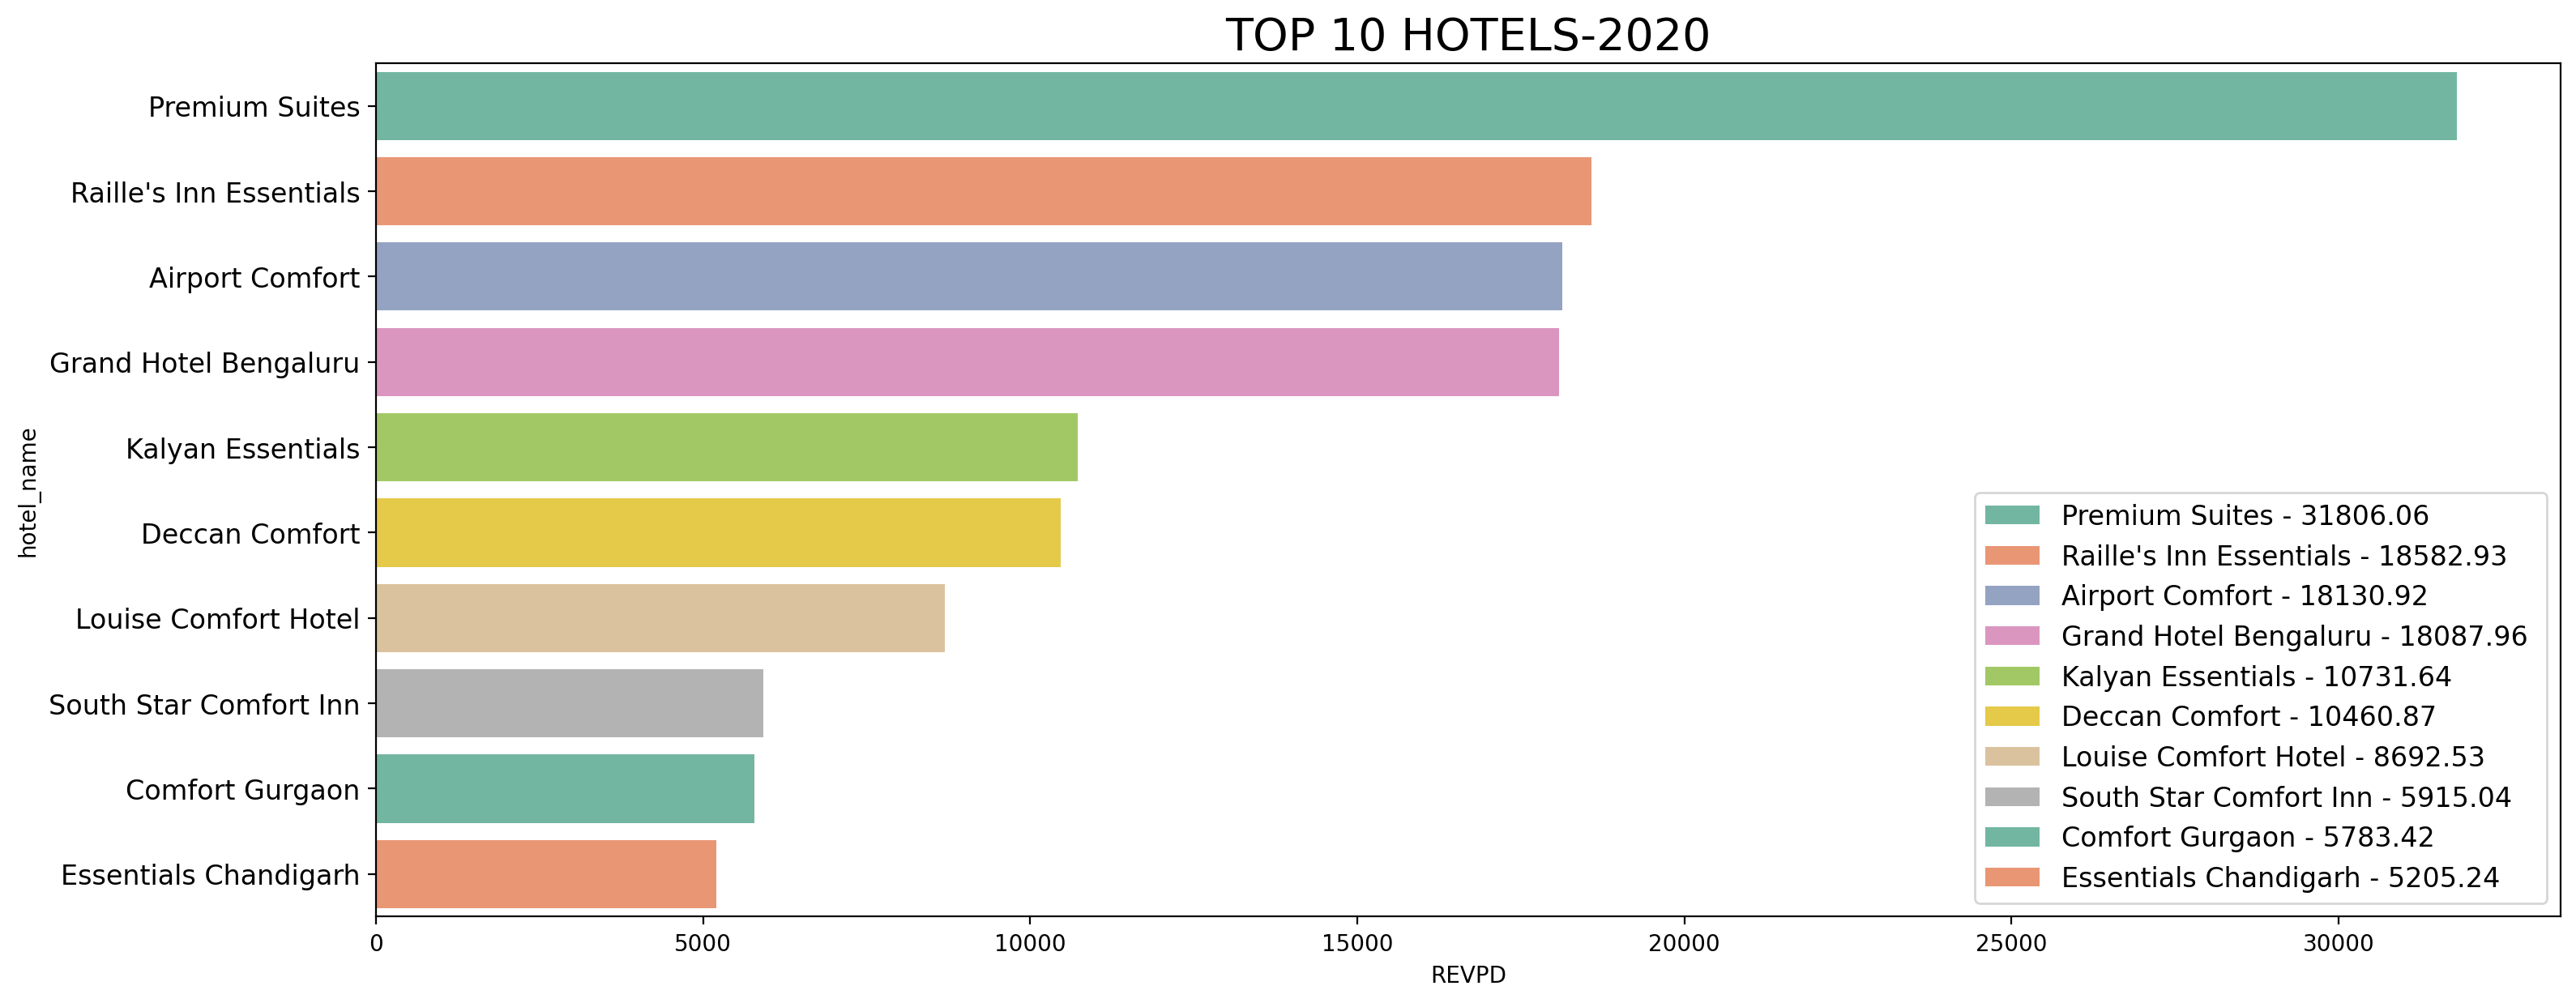

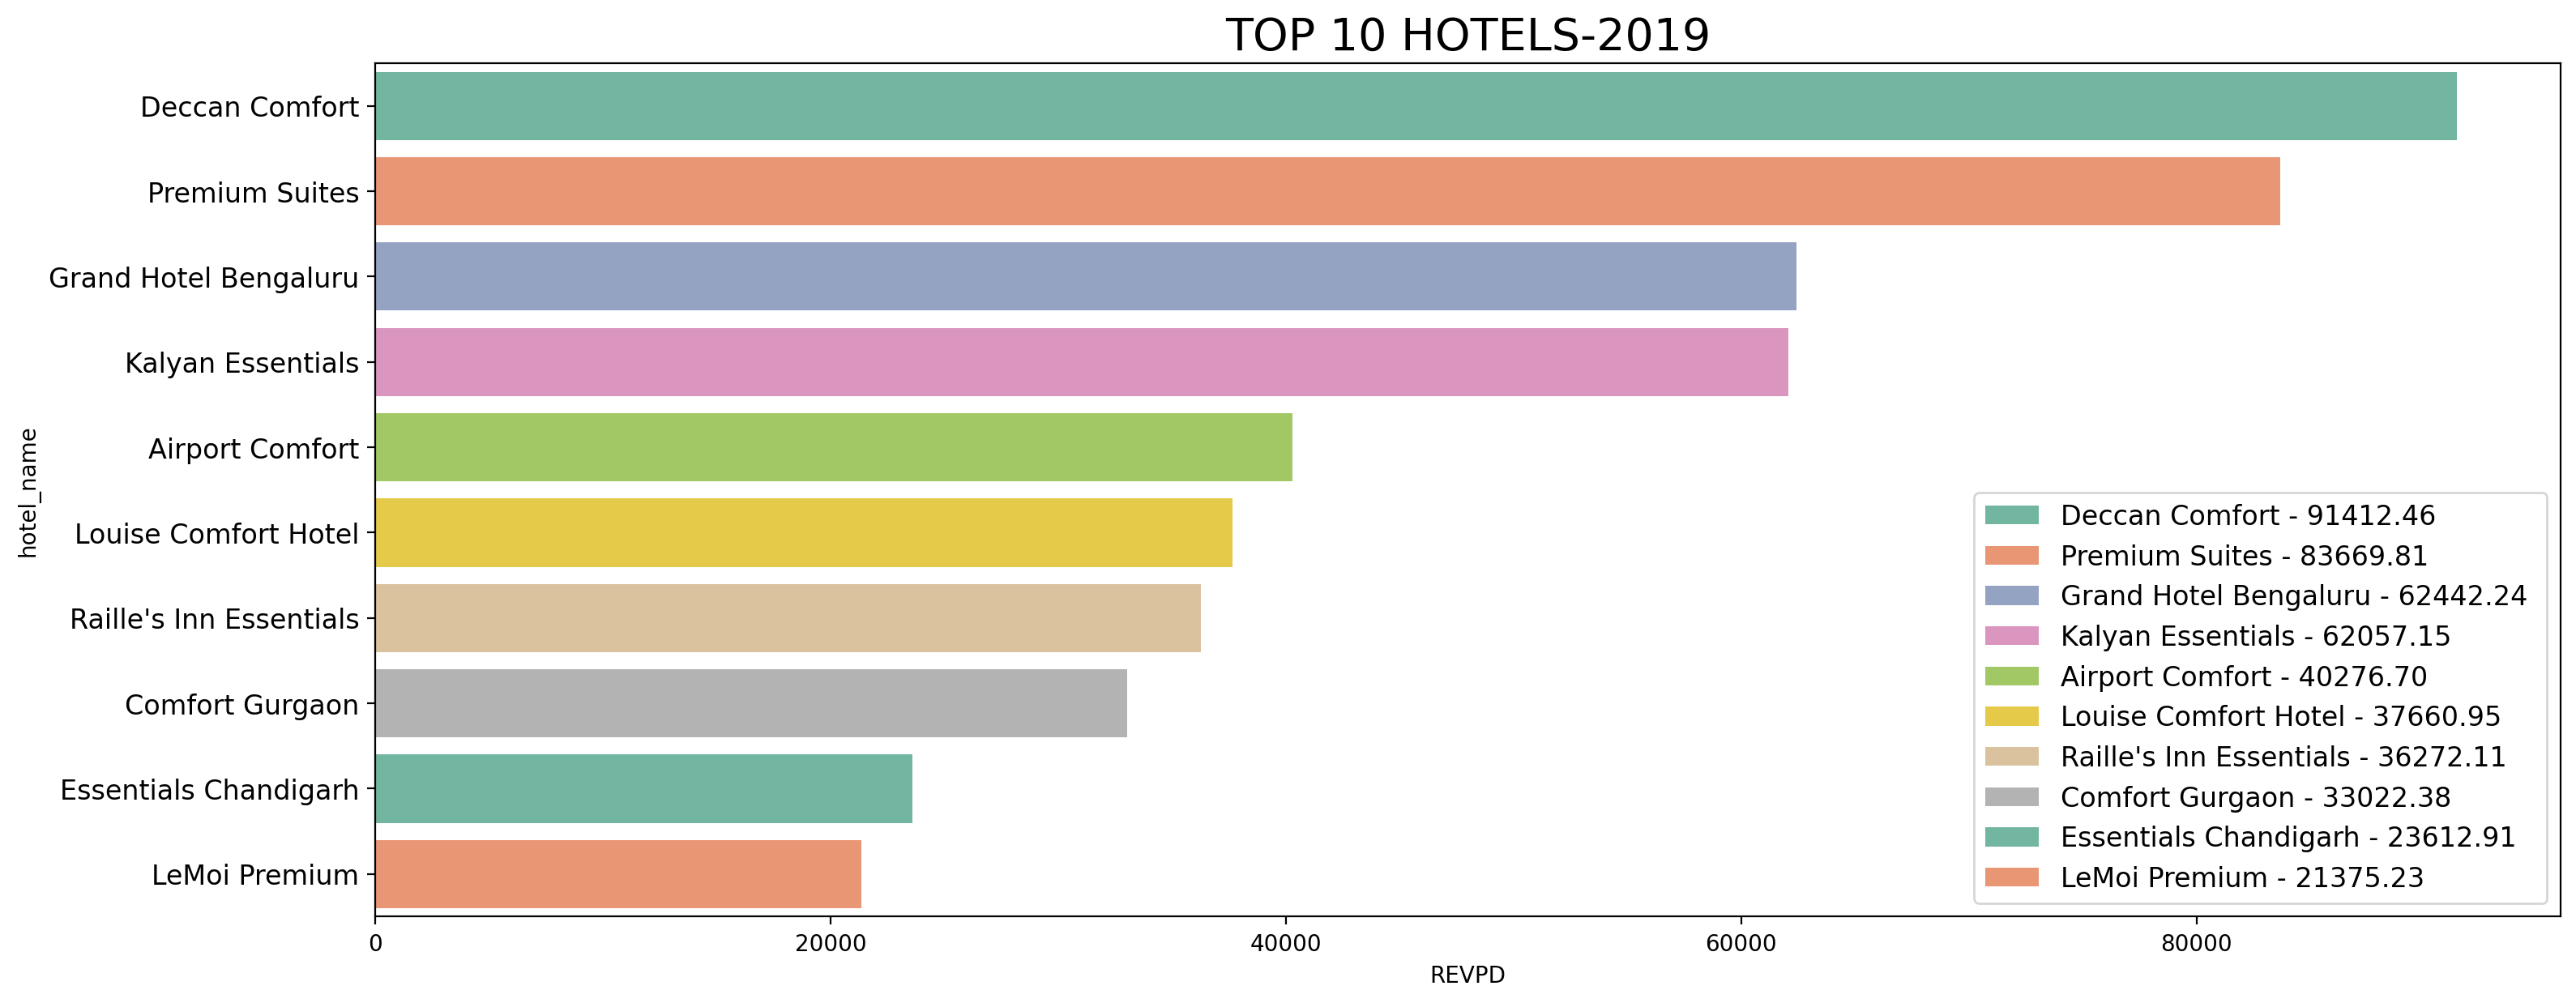

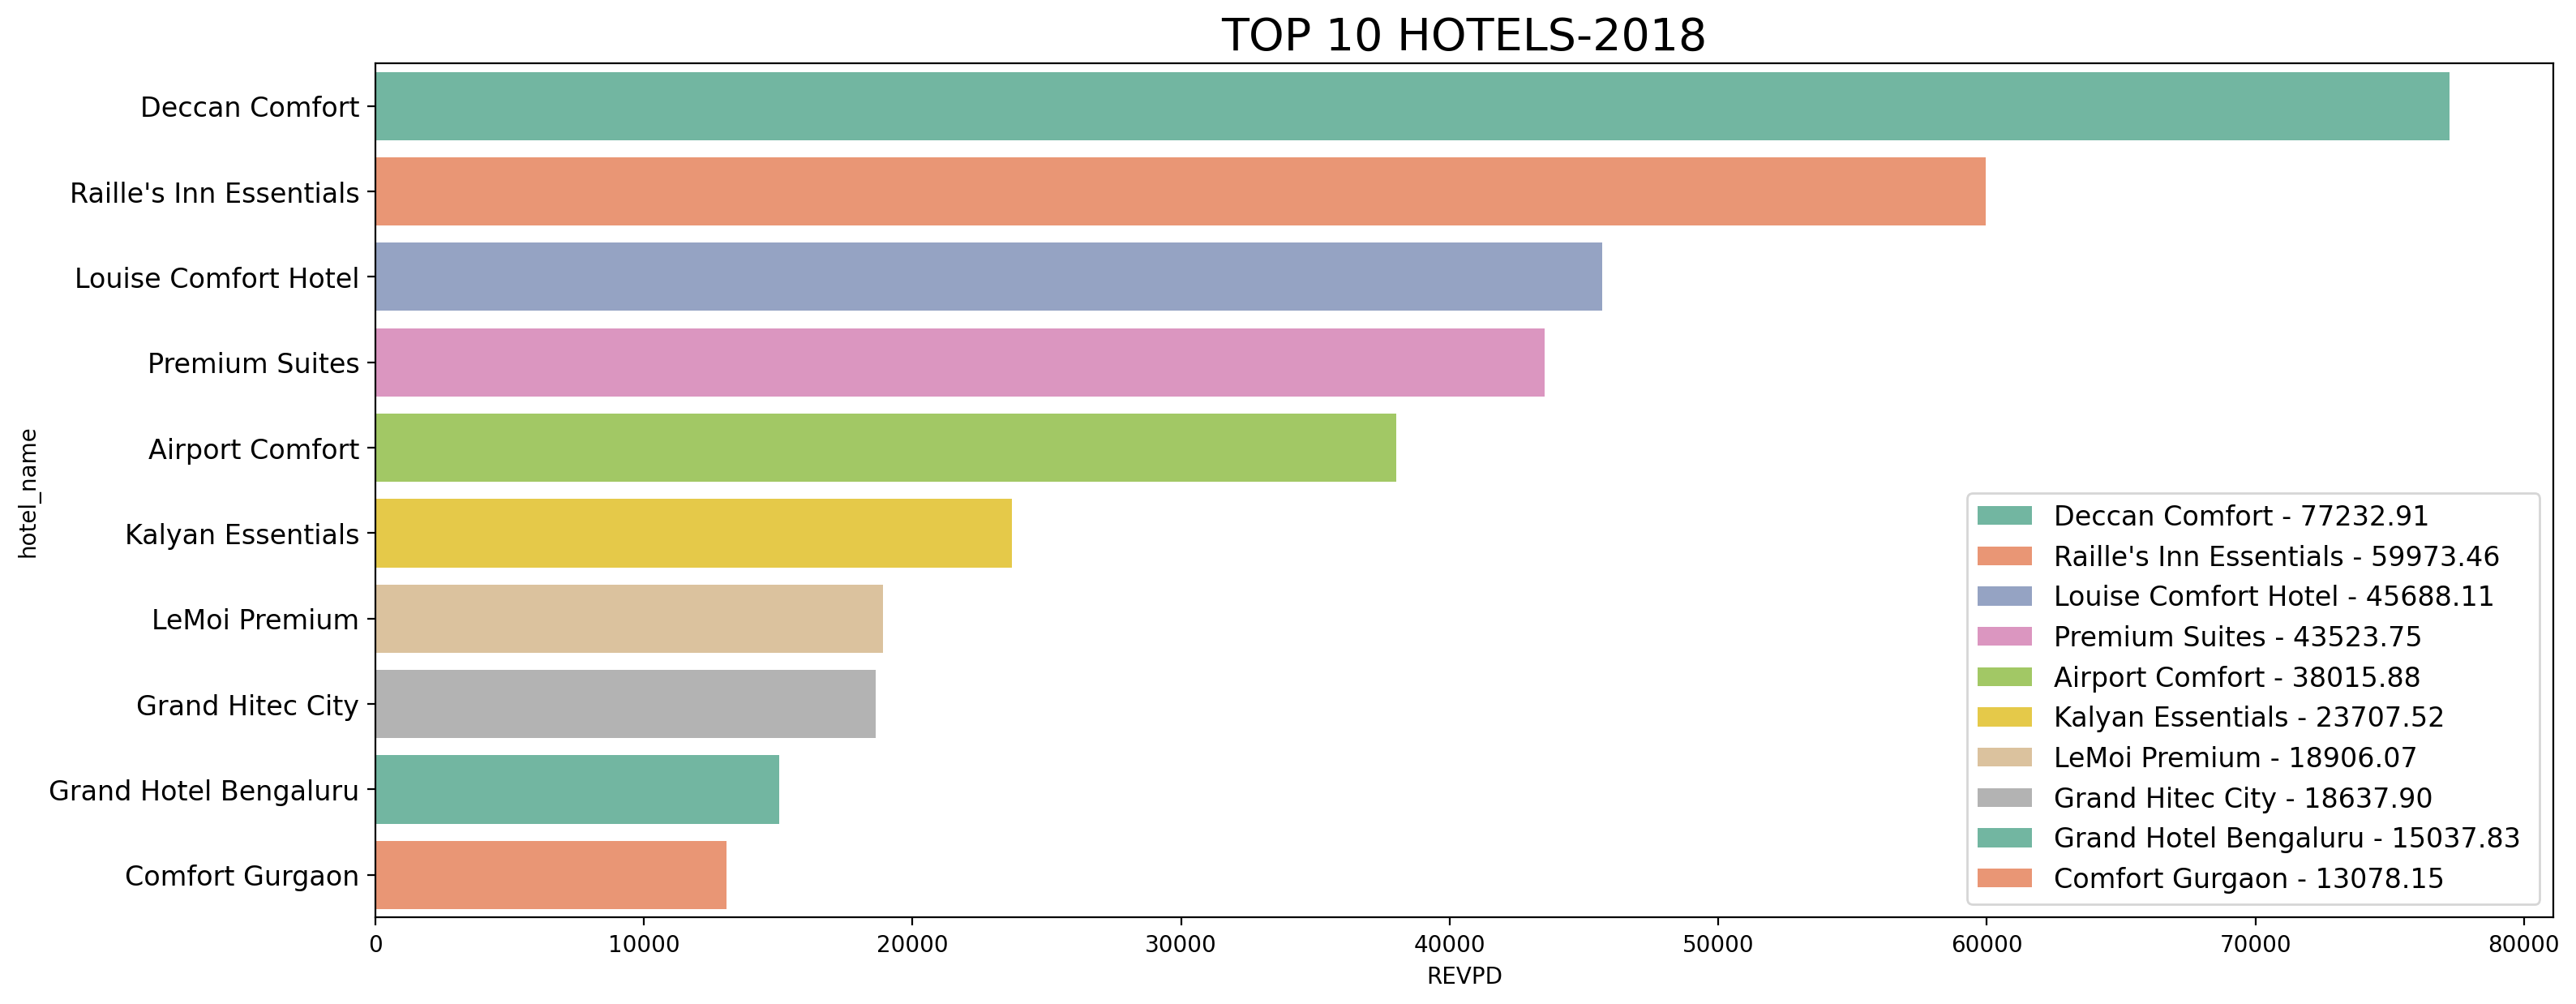

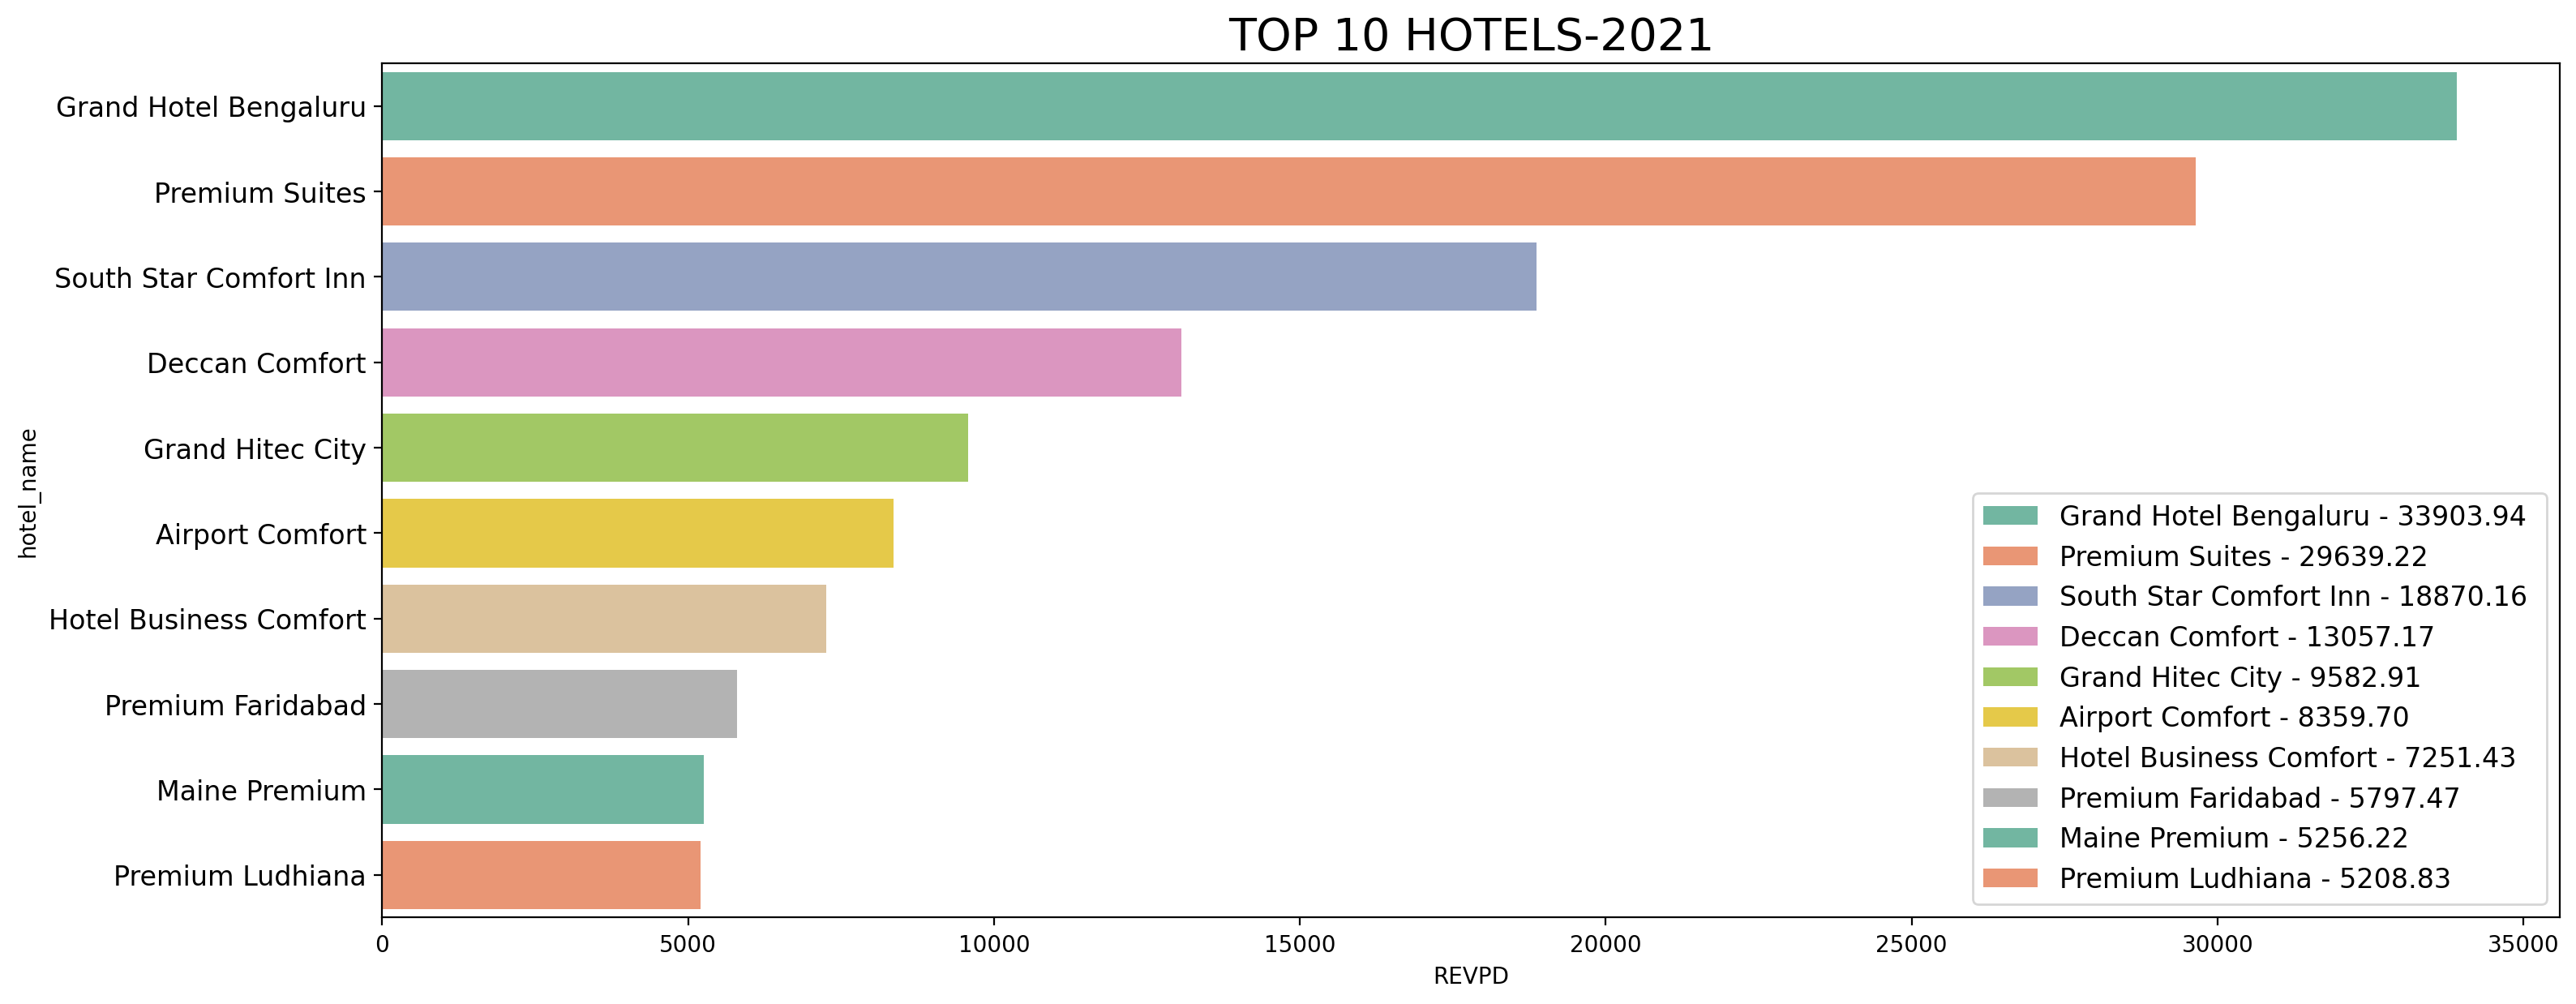

In [ ]:
for i in df['year'].unique():
    df1 = Top_10_revpd[Top_10_rpd['year']==i]

    plt.figure(figsize=(16,6),dpi=(200))

    revpd_label = ['{0} - {1:0.2f} '.format(i,j) for i,j in zip(df1['hotel_name'], df1['REVPD'])]
    ax = sns.barplot(data=df1,y='hotel_name',x='REVPD',hue=revpd_label,dodge=None,palette='Set2')

    ax.set_yticklabels(ax.get_yticklabels(),fontsize=12)
    ax.legend(loc='best',fontsize=12),
    plt.tight_layout()
    plt.title(f'TOP 10 HOTELS-{i}',fontsize=20)


# VALUABLE INSIGHTS

**Q1. Order of decreasing productivity--**

In [ ]:
df.groupby('year')['RPD'].sum().reset_index().sort_values('RPD',ascending=False)

year      RPD
4  2022  225.711
1  2019  176.192
0  2018  146.433
3  2021   70.816
2  2020   59.404

Highest Productivity is in 2022 and Least productive year was 2020 which was Covid dominated.

**Q2. ARR of this sales team--**

In [ ]:
ARR = round((df['room_revenue']/df['room_nights']).mean(),2)
ARR

3868.79

ARR of only this sales channel is 3868.79. The sales manager can counter the claims against him of underselling the hotels at cheaper rates.

**Q3. Top 3 hotels with highest degrowth % in 2022 as compared to 2019--**

In [ ]:
hotels = df.groupby(['year','hotel_name'])['RPD'].sum().reset_index()

hotels_2019 = hotels[hotels['year'] == 2019][['hotel_name','RPD']]
hotels_2022 = hotels[hotels['year'] == 2022][['hotel_name','RPD']]

hotels_degrowth = hotels_2019.merge(hotels_2022,on='hotel_name',suffixes=('_2019', '_2022'))
hotels_degrowth['degrowth %'] = 100 * (hotels_degrowth['RPD_2019'] - hotels_degrowth['RPD_2022']) / (hotels_degrowth['RPD_2019'])

In [ ]:
hotels_degrowth.nlargest(3,'degrowth %')

hotel_name  RPD_2019  RPD_2022  degrowth %
45  Queen's Palace Premium Hotel     0.431     0.005   98.839907
33            Natural Essentials     2.500     0.060   97.600000
54         Tanny's Comfort Hotel     1.583     0.149   90.587492

**Q4. Business sources that have degrown in 2022 as compared to 2019--**

In [ ]:
business_sources = df.groupby(['year','business_source'])['RPD'].sum().reset_index()

business_sources_2019 = business_sources[business_sources['year'] == 2019][['business_source','RPD']]
business_sources_2022 = business_sources[business_sources['year'] == 2022][['business_source','RPD']]

business_sources_degrowth = business_sources_2019.merge(business_sources_2022,on='business_source',suffixes=('_2019', '_2022'))
business_sources_degrowth['degrowth %'] = 100*(business_sources_degrowth['RPD_2019'] - business_sources_degrowth['RPD_2022'])/(business_sources_degrowth['RPD_2019'])

In [ ]:
business_sources_degrowth[business_sources_degrowth['degrowth %']>0]

business_source  RPD_2019  RPD_2022  degrowth %
1                     Social     2.098     0.802   61.773117
3  Travel Management Company    49.608    36.533   26.356636

**Q5. Leisure contribution of total travel agent business--**

In [ ]:
leisure_contri = df.groupby(['year','business_source','hotel_type'])[['RPD','REVPD']].sum().reset_index()
leisure_contri_2018 = leisure_contri[(leisure_contri['year']==2018) & (leisure_contri['business_source']=='Travel Agent')]
leisure_contri_2022 = leisure_contri[(leisure_contri['year']==2022) & (leisure_contri['business_source']=='Travel Agent')]

contri_in_2018 = 100*(leisure_contri_2018[leisure_contri_2018['hotel_type']=='Leisure']['RPD'].values)/(leisure_contri_2018['RPD'].sum())
print('Leisure contribution for travel agent in 2018 was {} percentage'.format(contri_in_2018))

contri_in_2022 = 100*(leisure_contri_2022[leisure_contri_2022['hotel_type']=='Leisure']['RPD'].values)/(leisure_contri_2022['RPD'].sum())
print('Leisure contribution for travel agent in 2022 was {} percentage'.format(contri_in_2022))

Leisure contribution for travel agent in 2018 was [40.46818417] percentage
Leisure contribution for travel agent in 2022 was [5.26315789] percentage


Leisure contribution for total travel agent business has dipped from 40.49% in 2018 to 5.26% in 2022.

**Q6. Top 2 sales person based on performance on luxury hotels--**

In [ ]:
sales_person = df.groupby(['hotel_category','sales_portfolio'])['RPD'].sum().reset_index()
Top_sales_person = sales_person[sales_person['hotel_category']=='Upper Upscale']

Top_sales_person.nlargest(2,'RPD')

hotel_category    sales_portfolio     RPD
12  Upper Upscale  Sales Portfolio 1  62.263
14  Upper Upscale  Sales Portfolio 3   2.711

**Q7. Top 2 accounts which used to support the office in past but have shown drastic degrowth over 2019--**

In [ ]:
support = df[df['hotel_type']=='Leisure'].groupby(['year','account_name','hotel_name'])['RPD'].sum().reset_index()
support_2018 = support[support['year']==2018][['account_name','hotel_name','RPD']]
support_2019 = support[support['year']==2019][['account_name','hotel_name','RPD']]

support_best = pd.merge(support_2018,support_2019,left_on=['account_name','hotel_name'],right_on=['account_name','hotel_name'],suffixes=('_2018','_2019'))
support_best['degrowth %'] = 100*(support_best['RPD_2018'] - support_best['RPD_2019'])/support_best['RPD_2018']

support_best.nlargest(2,'degrowth %')

account_name         hotel_name  RPD_2018  RPD_2019  degrowth %
0   Air Asia India    Chariot Comfort     0.356     0.008   97.752809
81         VIA.COM  Premium Hotel Goa     0.534     0.016   97.003745

**Year with maximum RPD**

In [ ]:
df.groupby('year')['RPD'].sum().reset_index().nlargest(1,'RPD')

year      RPD
4  2022  225.711

**Maximum productive Sales person of 2022**

In [ ]:
df[df['year']==2022].groupby('sales_portfolio')['RPD'].sum().reset_index().nlargest(1,'RPD')

sales_portfolio      RPD
0  Sales Portfolio 1  142.939

**Absolute difference between mean of total productivity of year 2018 and 2022**

In [ ]:
df1 = df.groupby('year')['RPD'].mean().reset_index().set_index('year')
productivity_difference = round(abs(df1.loc[2018]['RPD']-df1.loc[2022]['RPD']),2)
productivity_difference

0.01

**Source mix**

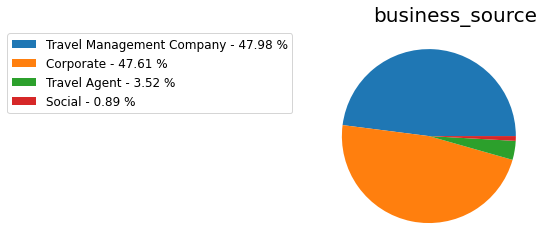

In [ ]:
plt.figure(figsize=(12,4))
df1 = pd.DataFrame(df['business_source'].value_counts().reset_index())
percent = 100*df1['business_source']/df1['business_source'].sum()
labels = ['{0} - {1:0.2f} %'.format(i,j) for i,j in zip(df1['index'], percent)]

plt.pie(data=df1,x='business_source',radius=1)

plt.legend(labels, loc='best', bbox_to_anchor=(-0.1, 1.),fontsize=12)
plt.title('business_source',loc='right',fontsize=20)
plt.show()

**ZONES**

In [ ]:
zones = df.groupby(['year','zone'])['RPD'].sum().reset_index()
zones_2019 = zones[zones['year']==2019][['zone','RPD']]
zones_2021 = zones[zones['year']==2021][['zone','RPD']]
zones_2022 = zones[zones['year']==2022][['zone','RPD']]

zones_degrowth = zones_2021.merge(zones_2022,on='zone',suffixes=('_2021', '_2022'))
zones_degrowth['degrowth %'] = 100*(zones_degrowth['RPD_2021'] - zones_degrowth['RPD_2022'])/zones_degrowth['RPD_2021']

new_zones_degrowth = zones_2019.merge(zones_2022,on='zone',suffixes=('_2019', '_2022'))
new_zones_degrowth['degrowth %'] = 100*(new_zones_degrowth['RPD_2019'] - new_zones_degrowth['RPD_2022'])/new_zones_degrowth['RPD_2019']

**Zone with maximum degrowth over last one year--**

In [ ]:
zones_degrowth.nlargest(1,'degrowth %')

zone  RPD_2021  RPD_2022  degrowth %
0  East     3.276     3.351   -2.289377

**Zone with second highest growth--**

In [ ]:
zones_degrowth.nsmallest(2,'degrowth %')

zone  RPD_2021  RPD_2022  degrowth %
2  South    41.793   176.057 -321.259541
1  North    21.173    38.832  -83.403391

**Zone with most degrowth compared to pre pandamic--**

In [ ]:
new_zones_degrowth.nlargest(1,'degrowth %')

zone  RPD_2019  RPD_2022  degrowth %
3  West    25.573     7.471   70.785594

**Zone with maximum growth as compared to pre pandemic--**

In [ ]:
new_zones_degrowth.nsmallest(1,'degrowth %')

zone  RPD_2019  RPD_2022  degrowth %
2  South    103.31   176.057  -70.416223

**City with maximum number of bookings--**

In [ ]:
df['city'].value_counts().reset_index().max()

index    Zirakpur
city         9226
dtype: object

**Category with highest average room revenue--**

In [ ]:
df.groupby('hotel_category')['room_revenue'].mean().reset_index().nlargest(1,'room_revenue')

hotel_category  room_revenue
2  Upper Upscale  41755.179804

**Month with maximum number of bookings in 2022--**

In [ ]:
df[df['year']==2022]['month'].value_counts()

March        1459
July         1370
May          1363
June         1343
April        1213
February      774
January       421
August          0
September       0
October         0
November        0
December        0
Name: month, dtype: int64

In [ ]:
np.median([12,12,13,14,15,11,10,12,12,15,17,18,12,12,14])

12.0

In [ ]:
import statistics as st
st.mode([12,12,13,14,15,11,10,12,12,15,17,18,12,12,14])

12

**# Advantage of the median: The median is less affected by outliers and skewed data than the mean, and is usually the preferred measure of central tendency when the distribution is not symmetrical.**